preprocessing:
- check features and targets for outliers
- tested removing outliers using IQR

In [6]:
# setup
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# add project root
sys.path.append("/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/src")

from config.constants import GIT_DIRECTORY

# set parameters
task_name = "cookieTheft"
save_dir = os.path.join(GIT_DIRECTORY, f"results/plots/feature_score_distributions/{task_name}")

# load features and targets
features = pd.read_csv(os.path.join(GIT_DIRECTORY, f"results/features/{task_name}.csv"))
targets = pd.read_csv(os.path.join(GIT_DIRECTORY, "data/language_scores_all_subjects.csv"))

df = pd.merge(features, targets, on="Subject_ID")
print(f"original size: {len(df)}")
print(df.head())

original size: 995
   Subject_ID  n_words       ttr  mattr_10  mattr_20  mattr_30  mattr_40  \
0          41      115  0.556522  0.949057  0.872917  0.808527  0.768421   
1          43      147  0.585034  0.950725  0.910547  0.863559  0.814815   
2          44      173  0.560694  0.939024  0.870455  0.818519  0.773881   
3          46      117  0.675214  0.977778  0.939286  0.920833  0.902564   
4          49      128  0.625000  0.957143  0.893119  0.833670  0.792697   

   mattr_50  filler_word_ratio  average_word_length  ...  \
0  0.720303           0.078261             3.443478  ...   
1  0.769388           0.061224             3.959184  ...   
2  0.741935           0.046243             3.965318  ...   
3  0.878529           0.025641             3.914530  ...   
4  0.763291           0.007812             4.046875  ...   

   eGeMAPS_loudnessPeaksPerSec  eGeMAPS_VoicedSegmentsPerSec  \
0                     2.035583                      1.604621   
1                     2.618127     

In [7]:
# set font for all plots
plt.rcParams['font.family'] = 'Arial'

def plot_distributions(df, columns, id_column="Subject_ID"):
    for col in columns:
        plt.figure(figsize=(12,4))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")

        safe_colname = col.replace("/", "_")
        save_path = os.path.join(save_dir, f"{safe_colname}_distribution.png")
        plt.savefig(save_path, dpi=300)

        plt.tight_layout()
        plt.show()
        plt.close()
        print(f"saved to {save_path}")

        # detect outliers based on IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            print(f"outliers in '{col}': ")
            print(outliers[[id_column, col]])
            print()


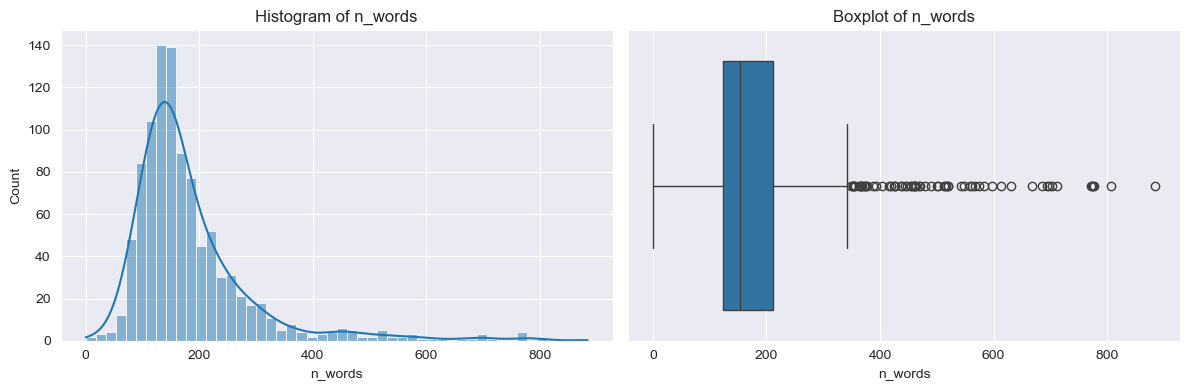

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/n_words_distribution.png
outliers in 'n_words': 
     Subject_ID  n_words
5            50      489
13           86      403
36          122      353
48          137      562
58          149      426
..          ...      ...
951        1313      519
954        1316      470
960        1324      387
967        1332      502
994        1370      463

[67 rows x 2 columns]



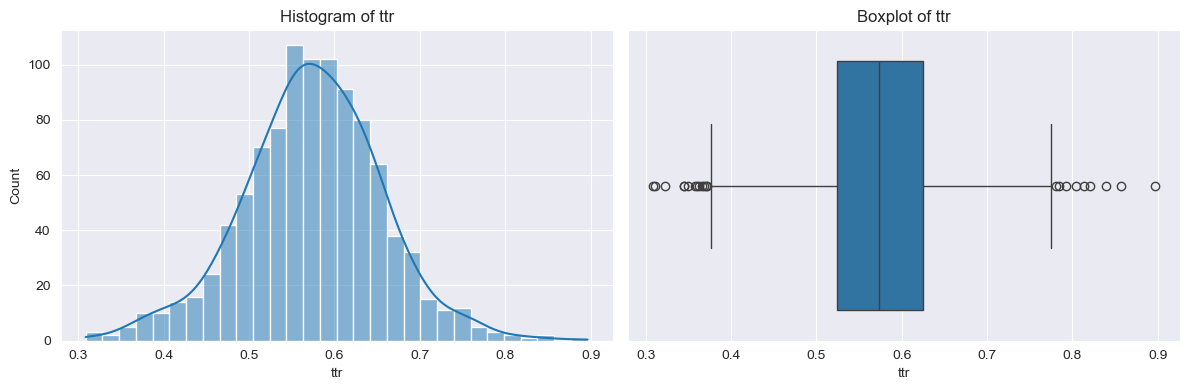

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/ttr_distribution.png
outliers in 'ttr': 
     Subject_ID       ttr
16           90  0.784810
341         523  0.357881
364         554  0.368946
366         558  0.363112
526         758  0.360417
551         784  0.370821
578         822  0.345029
655         921  0.803922
688         966  0.349227
723        1011  0.310830
779        1079  0.857143
790        1095  0.838710
799        1105  0.896552
807        1117  0.813953
847        1175  0.322398
874        1209  0.345070
880        1216  0.820896
898        1239  0.365591
939        1295  0.371429
944        1304  0.308550
966        1331  0.792453
973        1344  0.780488



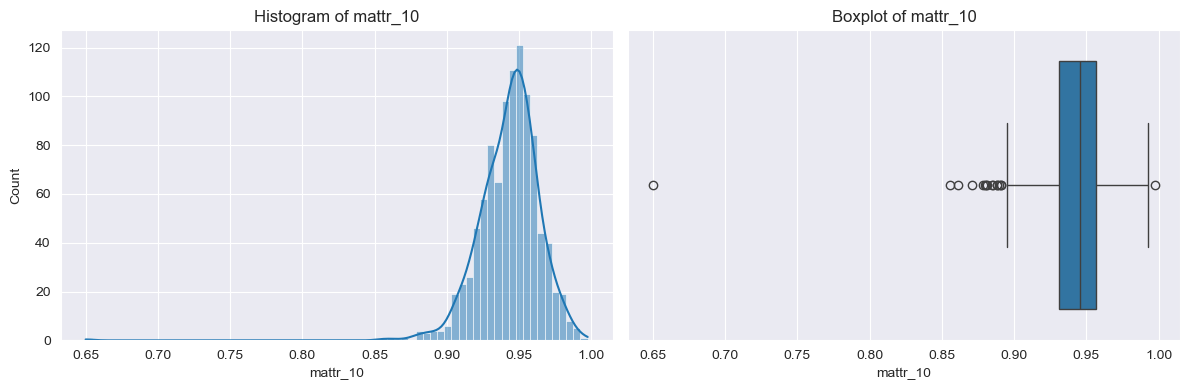

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/mattr_10_distribution.png
outliers in 'mattr_10': 
     Subject_ID  mattr_10
9            61  0.997468
17           91  0.885366
53          142  0.884699
205         355  0.879888
247         402  0.861458
280         446  0.880435
309         484  0.650000
317         493  0.890968
523         755  0.888489
551         784  0.890938
643         908  0.889908
656         922  0.855556
813        1125  0.878667
867        1201  0.881197
918        1267  0.871053
941        1298  0.887879



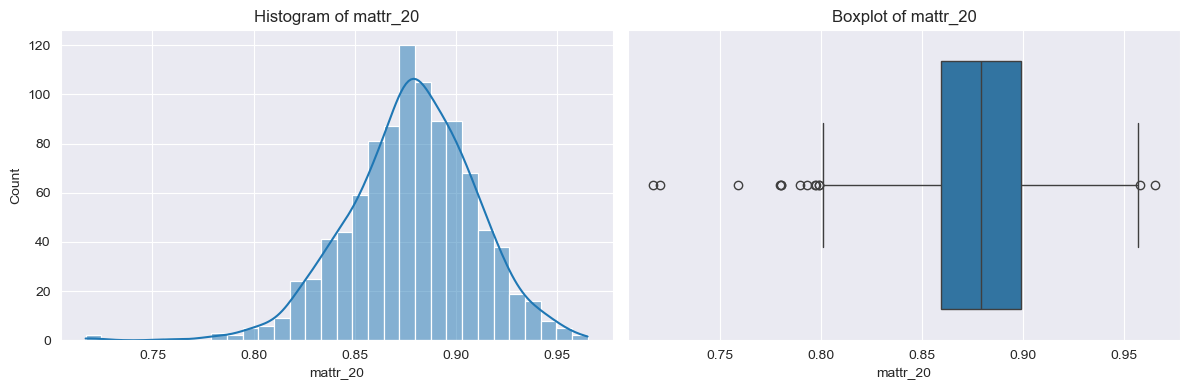

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/mattr_20_distribution.png
outliers in 'mattr_20': 
     Subject_ID  mattr_20
9            61  0.965217
34          119  0.957787
52          141  0.779834
76          176  0.789764
90          198  0.793243
247         402  0.799176
505         732  0.796970
577         821  0.799167
656         922  0.716935
770        1065  0.797396
813        1125  0.759231
867        1201  0.780374
918        1267  0.720455
941        1298  0.780435



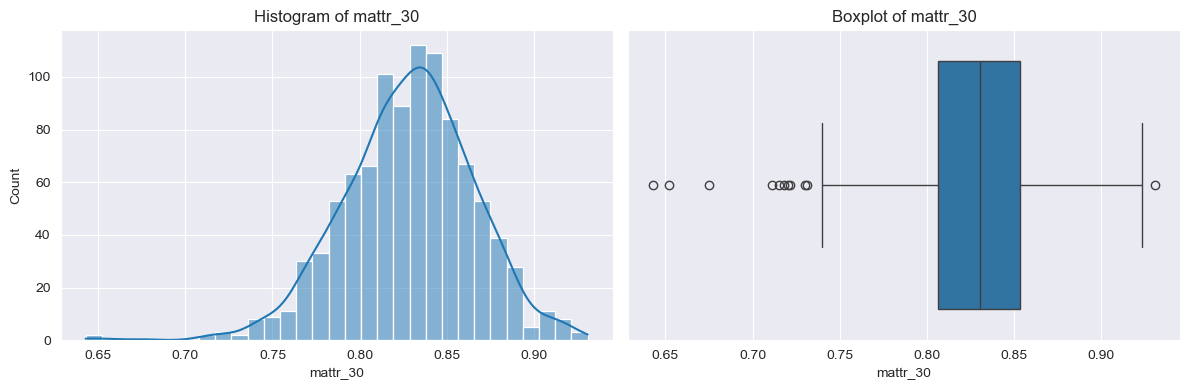

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/mattr_30_distribution.png
outliers in 'mattr_30': 
     Subject_ID  mattr_30
52          141  0.720078
76          176  0.715100
90          198  0.711111
505         732  0.729963
577         821  0.721212
656         922  0.651923
761        1055  0.930712
770        1065  0.717829
813        1125  0.675152
867        1201  0.731271
918        1267  0.642857



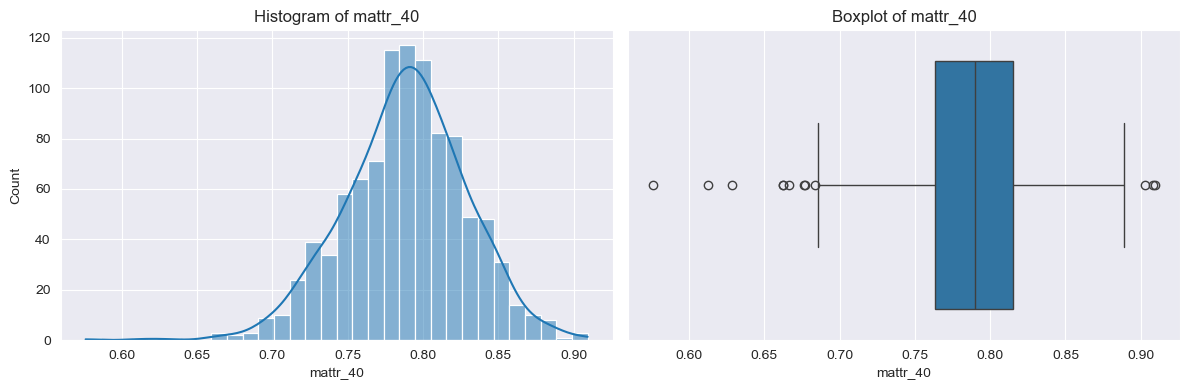

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/mattr_40_distribution.png
outliers in 'mattr_40': 
     Subject_ID  mattr_40
3            46  0.902564
52          141  0.676242
76          176  0.677103
90          198  0.666176
389         588  0.909375
505         732  0.683544
577         821  0.662750
656         922  0.612500
761        1055  0.908228
770        1065  0.662500
813        1125  0.628889
918        1267  0.576087



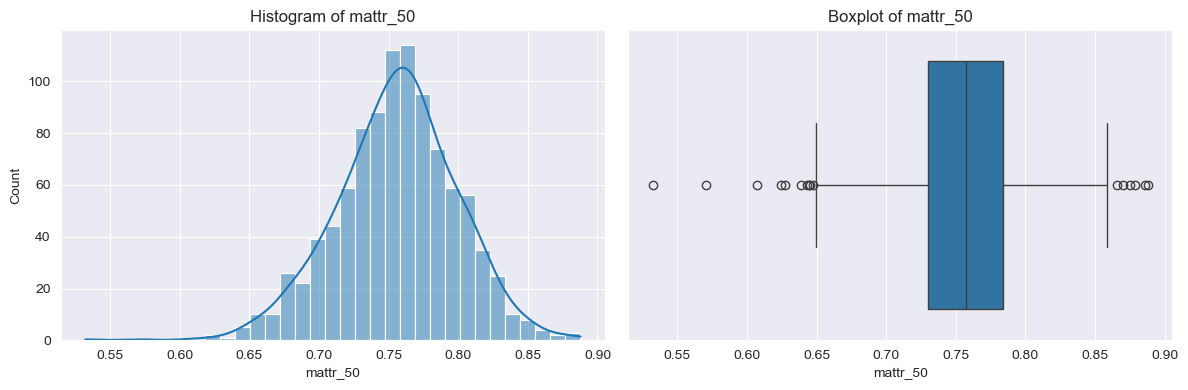

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/mattr_50_distribution.png
outliers in 'mattr_50': 
     Subject_ID  mattr_50
3            46  0.878529
16           90  0.870000
17           91  0.644286
52          141  0.638940
90          198  0.642857
188         330  0.875439
389         588  0.886000
505         732  0.645217
577         821  0.627556
656         922  0.570625
761        1055  0.887826
770        1065  0.624242
772        1069  0.865833
813        1125  0.607429
918        1267  0.532222
969        1336  0.647525



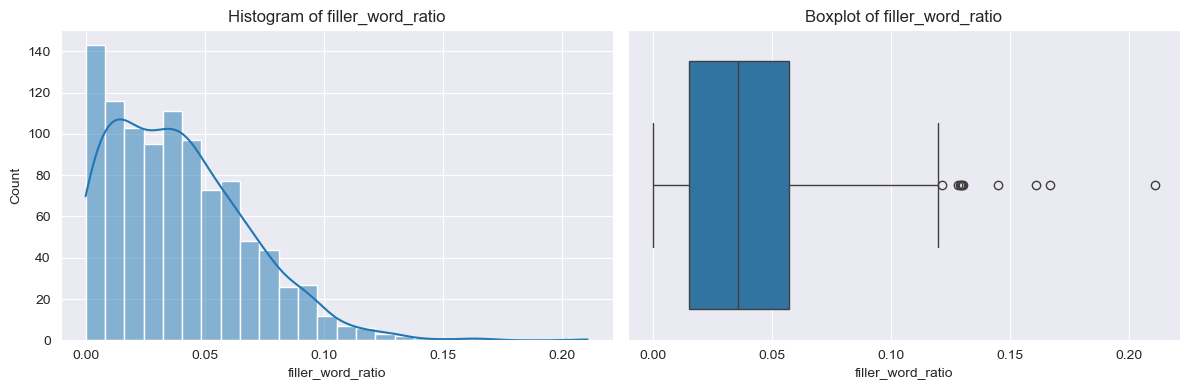

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/filler_word_ratio_distribution.png
outliers in 'filler_word_ratio': 
     Subject_ID  filler_word_ratio
6            54           0.130435
56          146           0.161074
140         263           0.128205
258         419           0.129032
280         446           0.210884
330         506           0.121294
427         633           0.166667
571         811           0.145161
577         821           0.129496
899        1240           0.129808



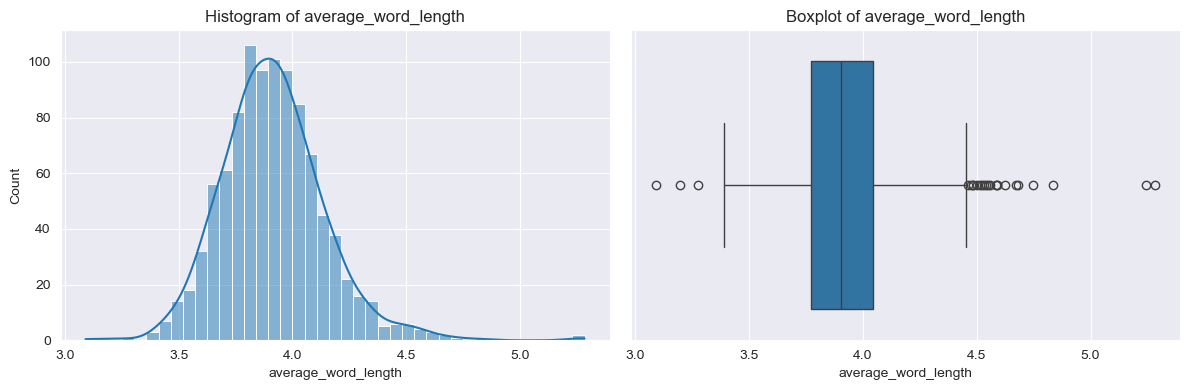

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/average_word_length_distribution.png
outliers in 'average_word_length': 
     Subject_ID  average_word_length
35          120             4.481818
56          146             3.275168
90          198             3.196429
93          201             4.475177
182         324             4.559441
299         471             4.583333
309         484             3.090909
351         537             4.522727
368         560             4.836957
469         682             4.482759
514         743             4.513699
527         760             4.625000
573         814             4.530973
596         844             4.590000
637         899             4.590909
741        1029             4.680608
799        1105             5.241379
807        1117             4.674419
830        1148             4.500000
864        1198             4.550000
887        1225          

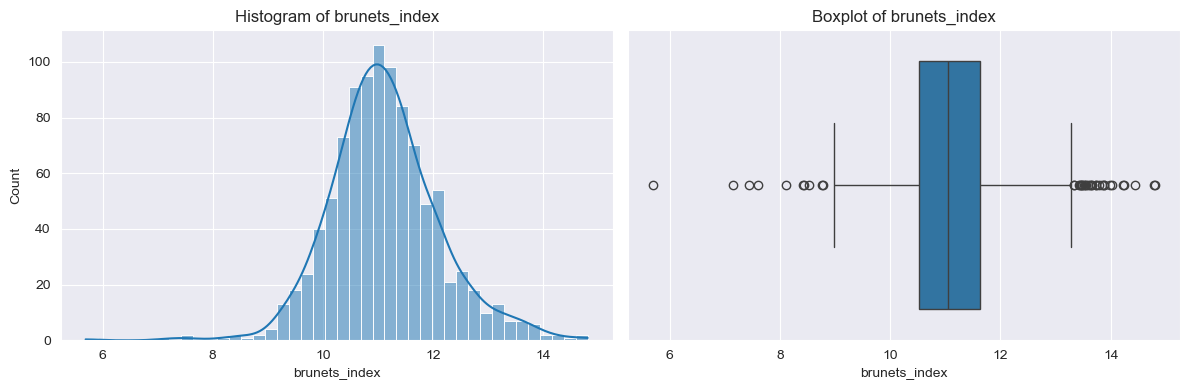

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/brunets_index_distribution.png
outliers in 'brunets_index': 
     Subject_ID  brunets_index
64          157       8.780555
125         242      13.484826
209         359      13.621460
309         484       5.693688
341         523      13.870358
364         554      13.736243
366         558      13.836455
391         590      13.479004
409         612      13.538224
424         629      13.665109
465         678      13.428408
526         758      13.985136
528         761      13.522294
551         784      13.784071
553         787      13.440412
578         822      14.244456
579         824      13.332529
655         921       8.419215
677         951      13.651130
688         966      14.017369
712        1000      13.544815
723        1011      14.802015
762        1056      13.342875
779        1079       7.602038
790        1095       7.433426
799     

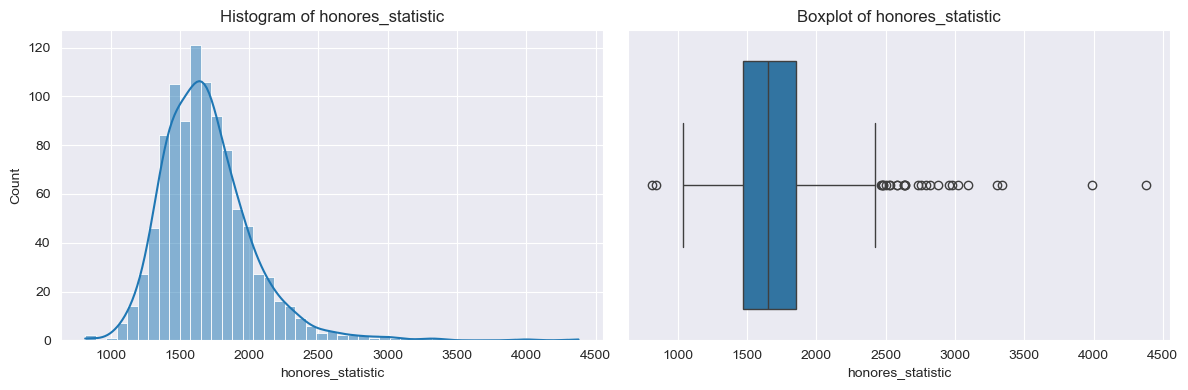

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/honores_statistic_distribution.png
outliers in 'honores_statistic': 
     Subject_ID  honores_statistic
16           90        2462.779699
64          157        2817.746184
93          201        2523.867544
121         234        2474.295304
164         294        2501.891643
198         344        2633.929080
228         379        2580.635487
263         425        2483.097841
309         484         839.263345
318         494        2583.899116
321         497        2532.953497
346         532        2639.778826
368         560        2637.710003
527         760        3018.729459
656         922         816.111986
699         982        3093.765125
761        1055        3339.479237
790        1095        2976.122244
799        1105        4377.484579
816        1131        3992.527760
823        1139        2790.917042
834        1155        2479.707023
8

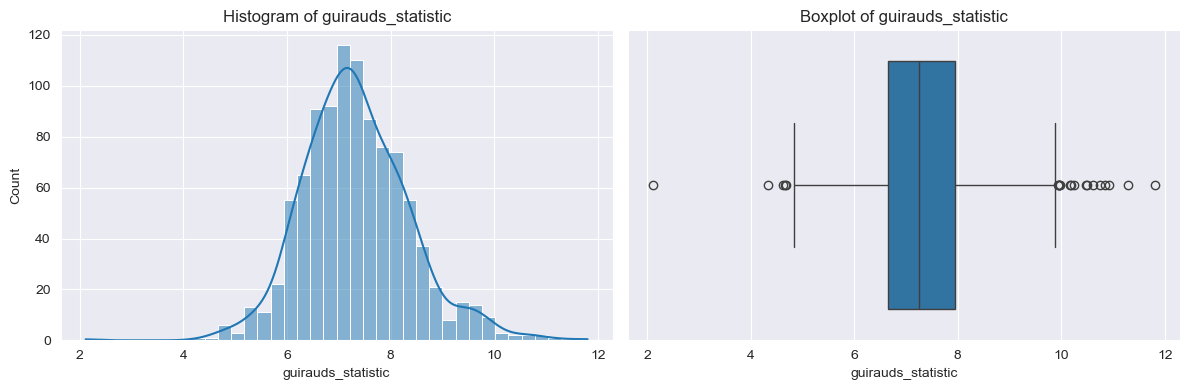

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/guirauds_statistic_distribution.png
outliers in 'guirauds_statistic': 
     Subject_ID  guirauds_statistic
90          198            4.677072
109         218           10.184315
117         229           10.246033
125         242           10.617282
276         441           10.493162
288         459           10.736458
309         484            2.110579
341         523            9.956559
398         598           10.174533
531         764           10.833022
535         768           10.478189
536         769           11.286479
579         824           10.920002
606         856            9.941989
656         922            4.333333
699         982            9.980620
733        1021            9.958706
790        1095            4.669738
896        1237            9.953215
941        1298            4.629100
994        1370           11.804381



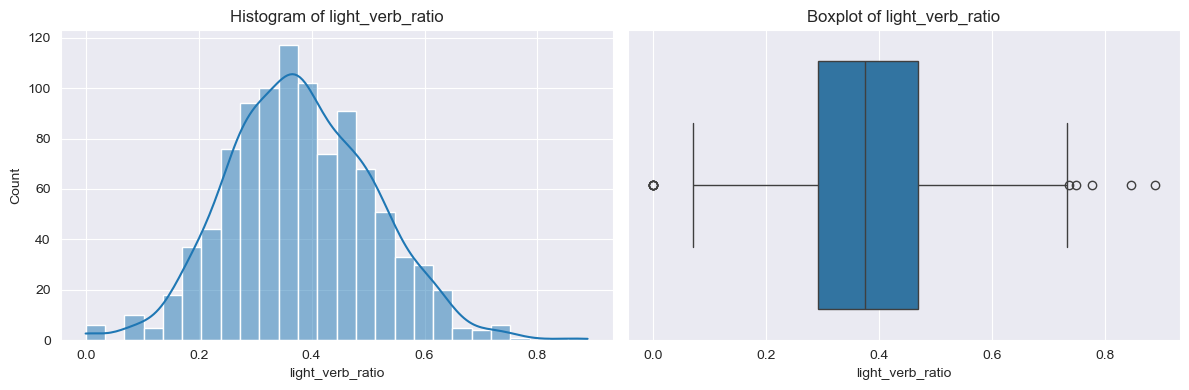

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/light_verb_ratio_distribution.png
outliers in 'light_verb_ratio': 
     Subject_ID  light_verb_ratio
140         263          0.000000
244         399          0.736842
309         484          0.000000
490         710          0.750000
616         871          0.000000
696         975          0.777778
828        1146          0.846154
907        1249          0.000000
914        1257          0.888889
945        1305          0.000000
966        1331          0.000000



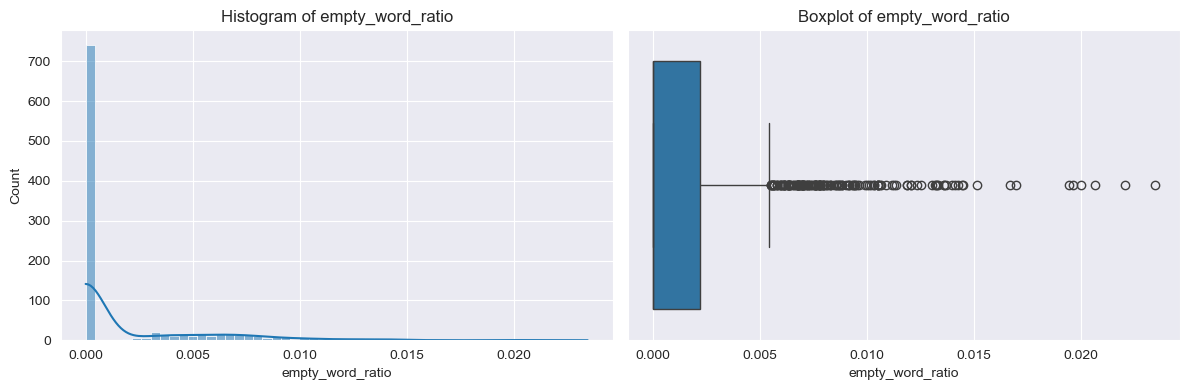

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/empty_word_ratio_distribution.png
outliers in 'empty_word_ratio': 
     Subject_ID  empty_word_ratio
1            43          0.006803
5            50          0.006135
6            54          0.008696
11           84          0.006329
41          129          0.006135
..          ...               ...
977        1349          0.009434
982        1355          0.006757
985        1358          0.012048
986        1359          0.006944
990        1365          0.013245

[156 rows x 2 columns]



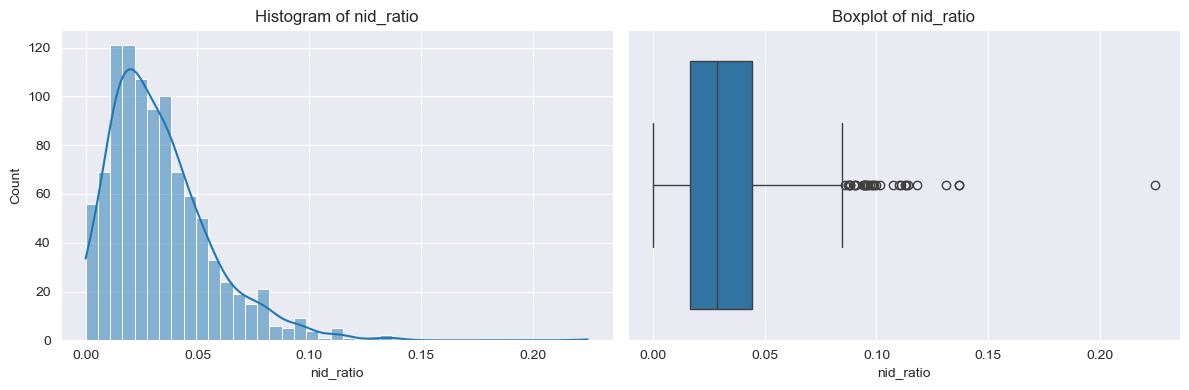

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/nid_ratio_distribution.png
outliers in 'nid_ratio': 
     Subject_ID  nid_ratio
6            54   0.095652
17           91   0.109890
56          146   0.107383
175         312   0.131148
178         318   0.090323
255         415   0.090909
280         446   0.224490
332         508   0.098655
406         609   0.118280
427         633   0.100000
443         653   0.093750
451         663   0.087500
473         689   0.097087
552         786   0.136691
554         788   0.114286
556         790   0.111111
571         811   0.112903
596         844   0.090000
604         854   0.095238
609         859   0.099010
705         989   0.136752
709         997   0.088050
720        1008   0.088235
763        1057   0.097902
802        1112   0.086124
835        1160   0.094340
853        1185   0.087121
899        1240   0.096154
903        1245   0.101351
912        1

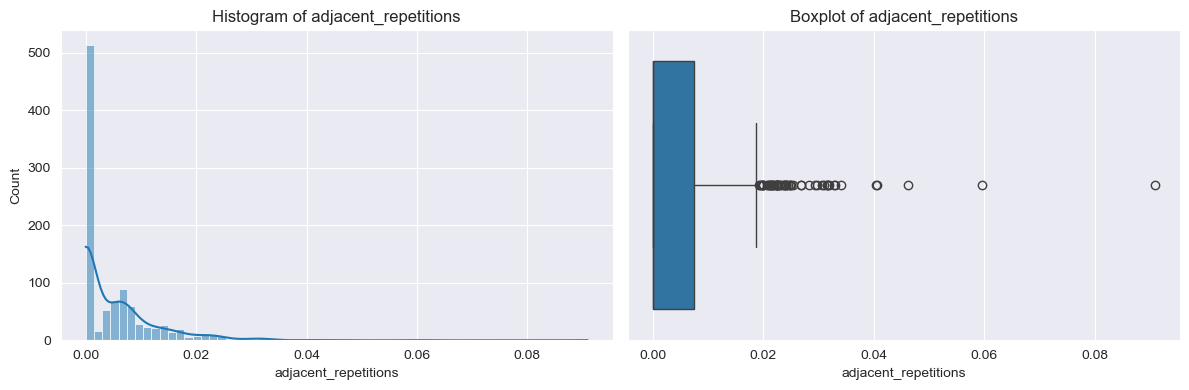

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/adjacent_repetitions_distribution.png
outliers in 'adjacent_repetitions': 
     Subject_ID  adjacent_repetitions
5            50              0.032720
13           86              0.029777
17           91              0.032967
43          132              0.022436
53          142              0.020833
100         208              0.031579
114         225              0.031068
121         234              0.040404
131         250              0.020000
153         278              0.023729
180         321              0.025000
205         355              0.031915
216         366              0.031746
227         378              0.021277
247         402              0.024876
273         437              0.021739
280         446              0.034014
305         479              0.024752
309         484              0.090909
310         485              0.022727
31

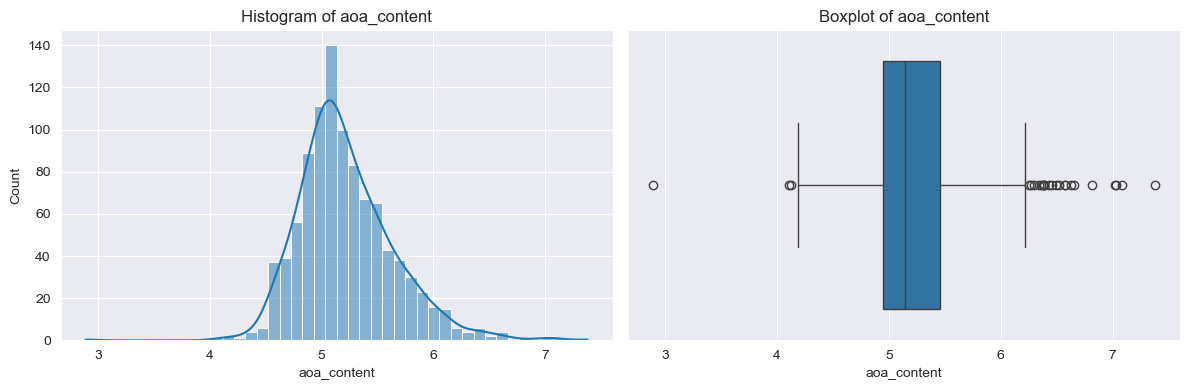

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/aoa_content_distribution.png
outliers in 'aoa_content': 
     Subject_ID  aoa_content
32          112     6.385365
35          120     6.816357
38          124     6.460315
61          152     6.524898
64          157     6.435000
72          172     6.355853
80          184     6.252961
88          196     6.381338
159         289     4.127166
219         369     6.343306
299         471     7.027554
309         484     2.890000
351         537     6.626013
368         560     7.378493
443         653     7.024489
451         663     4.105115
458         670     6.490325
466         679     6.387689
527         760     6.386178
741        1029     6.299506
864        1198     6.573004
865        1199     6.577935
870        1204     6.653907
887        1225     7.087609
919        1268     6.274881



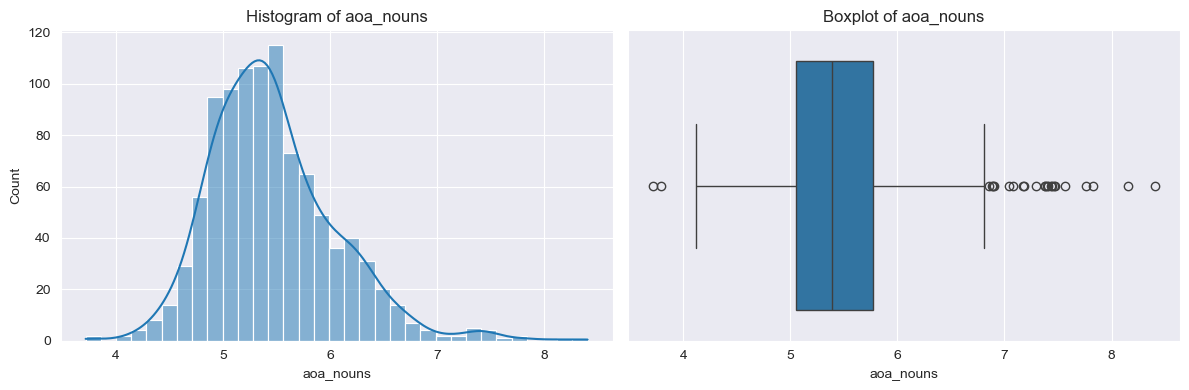

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/aoa_nouns_distribution.png
outliers in 'aoa_nouns': 
     Subject_ID  aoa_nouns
30          110   6.885006
32          112   6.890000
35          120   7.566818
61          152   7.433391
64          157   8.150000
72          172   6.855000
75          175   7.177120
110         219   7.763420
299         471   7.826957
322         498   7.179149
368         560   8.405201
443         653   7.406008
458         670   7.445898
466         679   7.395496
529         762   7.377727
656         922   3.715000
711         999   7.045658
721        1009   7.291831
744        1036   3.790833
864        1198   7.470476
871        1205   7.075455
887        1225   7.375436
894        1234   7.462956
896        1237   6.906460



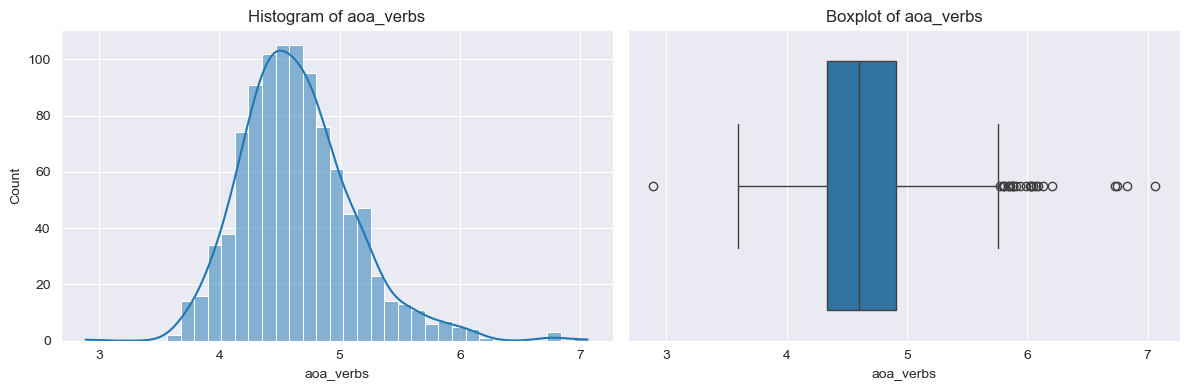

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/aoa_verbs_distribution.png
outliers in 'aoa_verbs': 
     Subject_ID  aoa_verbs
35          120   5.883846
38          124   5.797692
46          135   5.772185
80          184   6.032222
203         349   5.935804
236         389   5.882222
277         443   6.091538
309         484   2.890000
351         537   6.202632
368         560   5.805385
418         623   5.843684
443         653   6.743750
488         707   5.846000
741        1029   6.028571
796        1101   5.810000
814        1128   6.829231
823        1139   6.047000
833        1152   6.075385
854        1186   5.993158
864        1198   5.852727
865        1199   7.060000
870        1204   6.026417
880        1216   6.129167
887        1225   6.729231
919        1268   5.907037
926        1280   5.878000



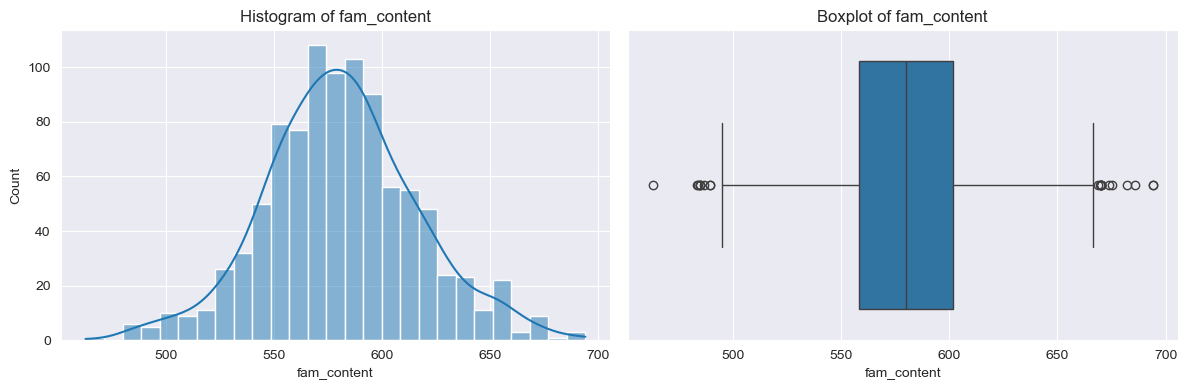

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/fam_content_distribution.png
outliers in 'fam_content': 
     Subject_ID  fam_content
135         257   668.666667
163         293   670.000000
168         300   670.000000
169         301   682.000000
298         470   694.000000
376         575   489.250000
385         584   483.500000
421         626   670.000000
469         682   484.800000
489         709   686.000000
529         762   485.000000
554         788   675.000000
630         891   670.000000
633         894   694.000000
730        1018   486.500000
842        1168   489.666667
848        1176   669.666667
856        1189   670.000000
884        1220   674.000000
901        1242   463.000000
977        1349   485.000000
988        1362   484.000000



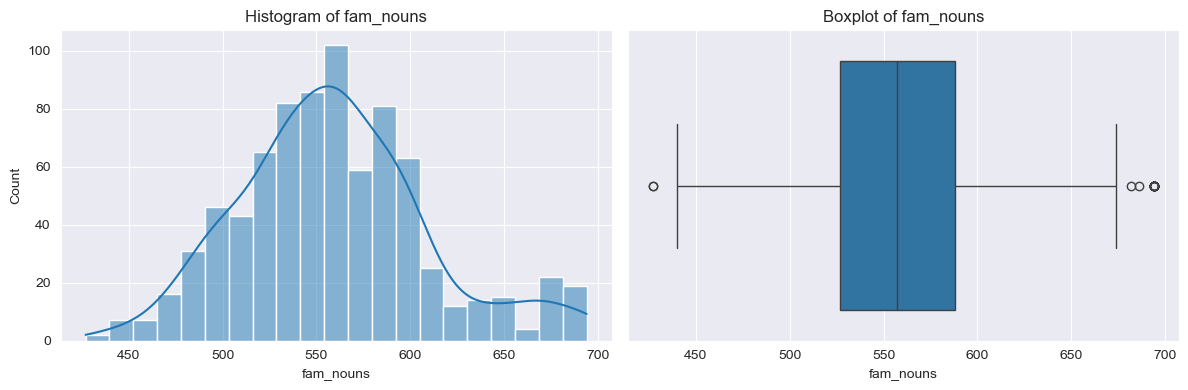

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/fam_nouns_distribution.png
outliers in 'fam_nouns': 
     Subject_ID  fam_nouns
122         237      694.0
128         247      694.0
135         257      694.0
169         301      682.0
196         342      427.0
236         389      694.0
298         470      694.0
336         514      694.0
489         709      686.0
552         786      694.0
554         788      694.0
573         814      694.0
633         894      694.0
681         956      694.0
828        1146      694.0
834        1155      694.0
848        1176      694.0
863        1196      694.0
918        1267      694.0
968        1334      694.0
981        1354      427.0



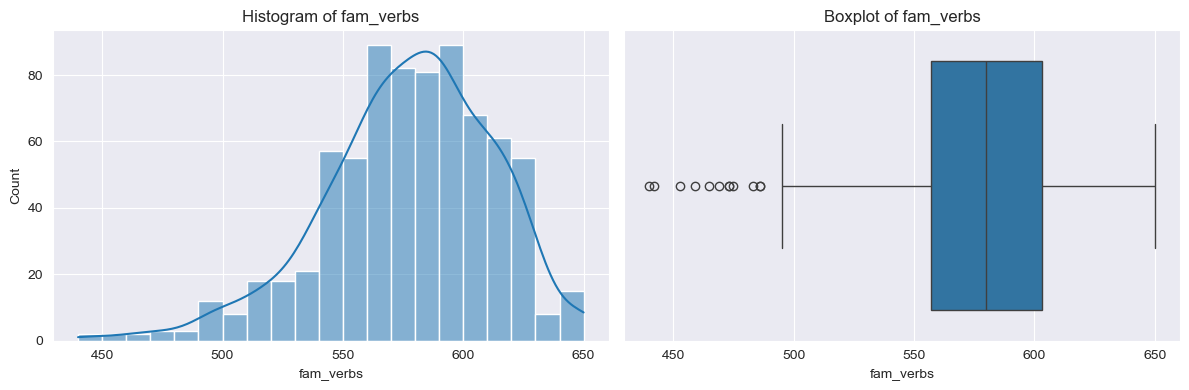

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/fam_verbs_distribution.png
outliers in 'fam_verbs': 
     Subject_ID  fam_verbs
182         324      486.0
287         455      465.0
427         633      473.0
469         682      442.0
558         793      440.0
560         796      475.0
629         890      453.0
646         911      486.0
690         968      459.0
747        1039      483.0
814        1128      469.0
850        1179      473.0



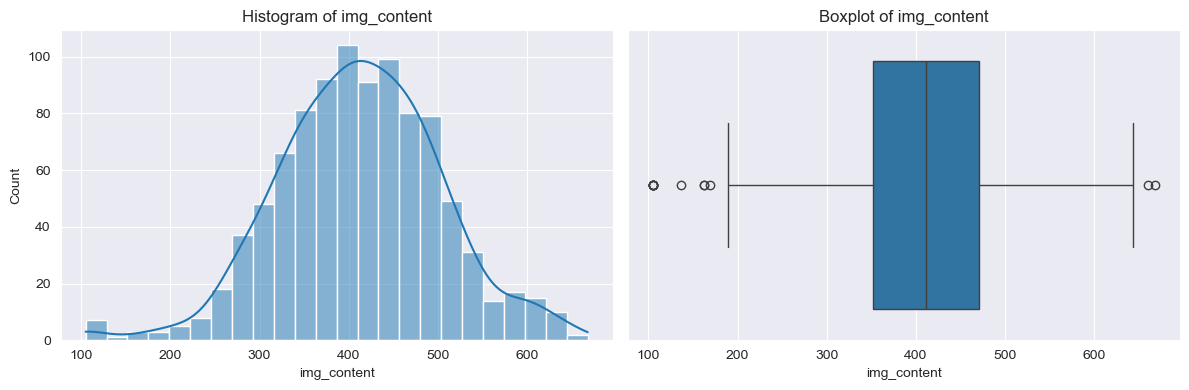

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/img_content_distribution.png
outliers in 'img_content': 
     Subject_ID  img_content
35          120   162.500000
69          165   105.000000
160         290   660.000000
217         367   162.500000
349         535   668.000000
370         566   169.500000
503         728   105.000000
520         750   105.000000
543         776   105.000000
635         897   105.000000
768        1062   105.000000
900        1241   136.666667
976        1348   105.000000



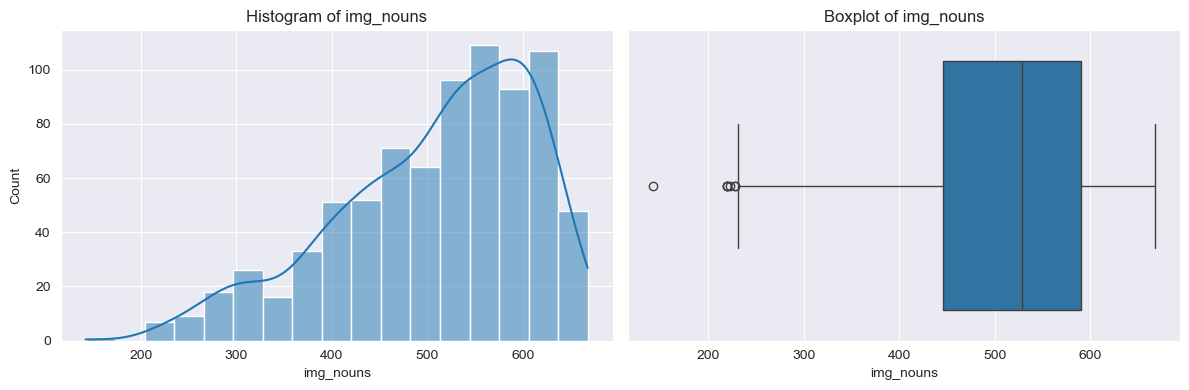

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/img_nouns_distribution.png
outliers in 'img_nouns': 
     Subject_ID  img_nouns
35          120      220.0
112         222      220.0
217         367      220.0
271         434      142.0
870        1204      228.0
896        1237      228.0
981        1354      223.0



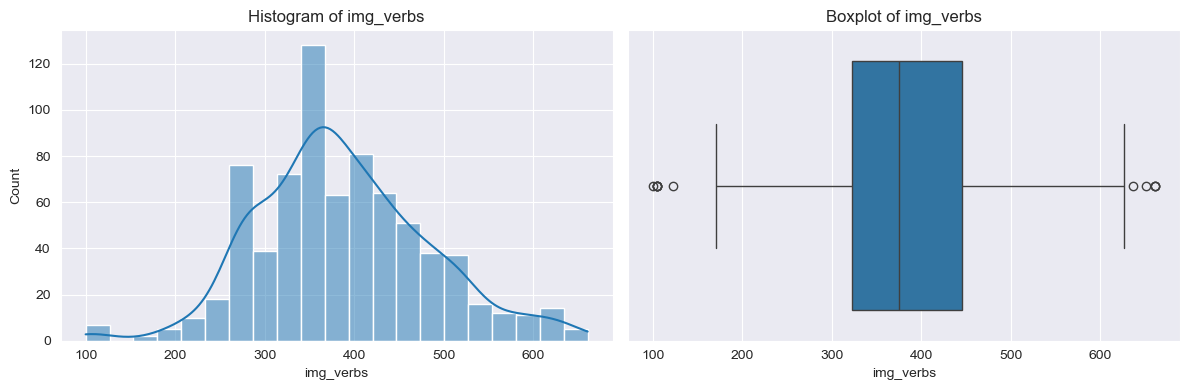

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/img_verbs_distribution.png
outliers in 'img_verbs': 
     Subject_ID  img_verbs
35          120      105.0
126         243      105.0
162         292      636.0
321         497      661.0
407         610      105.0
467         680      661.0
508         735      661.0
514         743      105.0
586         833      100.0
790        1095      651.0
816        1131      123.0
864        1198      105.0



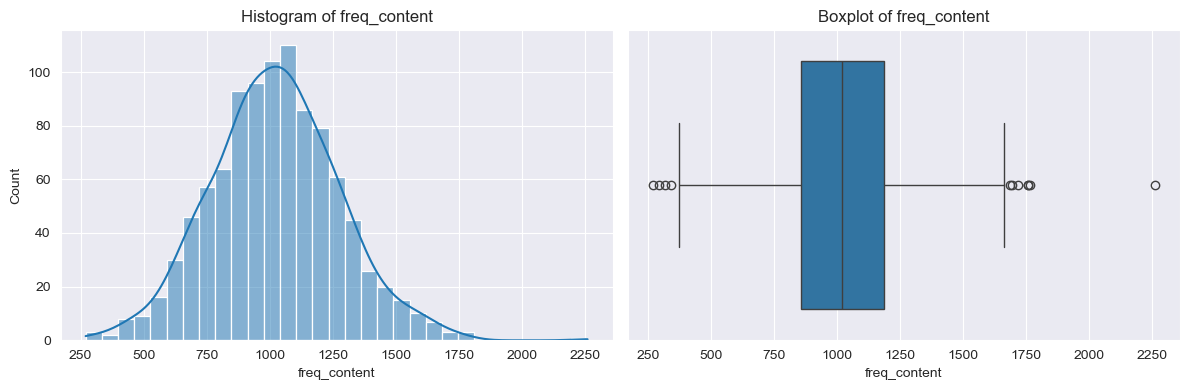

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/freq_content_distribution.png
outliers in 'freq_content': 
     Subject_ID  freq_content
90          198   2261.582268
91          199    317.726447
324         500   1765.372549
427         633   1687.079284
546         779   1759.287582
616         871    292.996936
677         951   1759.298246
680         954   1717.230252
887        1225    343.442959
894        1234   1695.066243
966        1331    269.871972



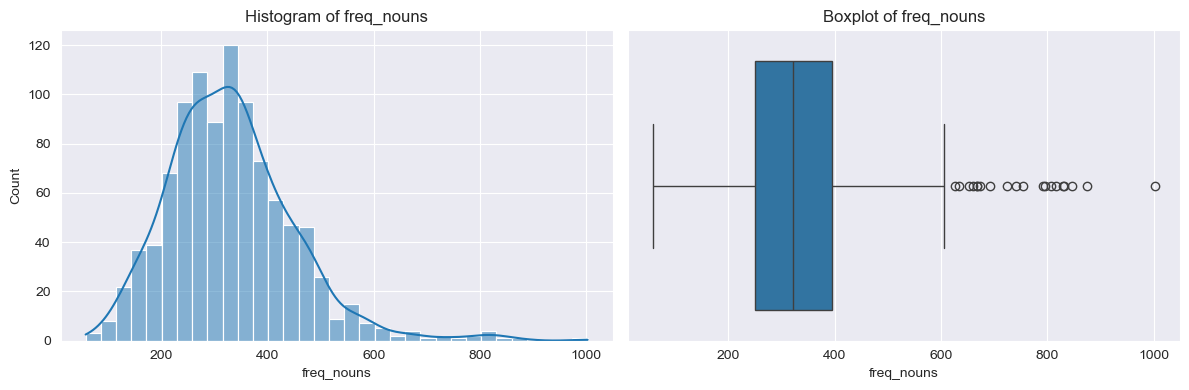

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/freq_nouns_distribution.png
outliers in 'freq_nouns': 
     Subject_ID   freq_nouns
52          141   634.400654
62          153   794.758824
68          163   667.243137
198         344   740.301342
242         396   725.086104
331         507   653.186851
347         533   792.609804
376         575   815.942685
427         633   807.858824
428         636   830.334118
510         738   659.380719
581         827  1002.456095
644         909   626.483193
646         911   830.601307
672         944   754.250980
779        1079   845.725490
815        1130   672.655971
883        1219   875.377005
885        1222   691.928105
922        1275   667.710010



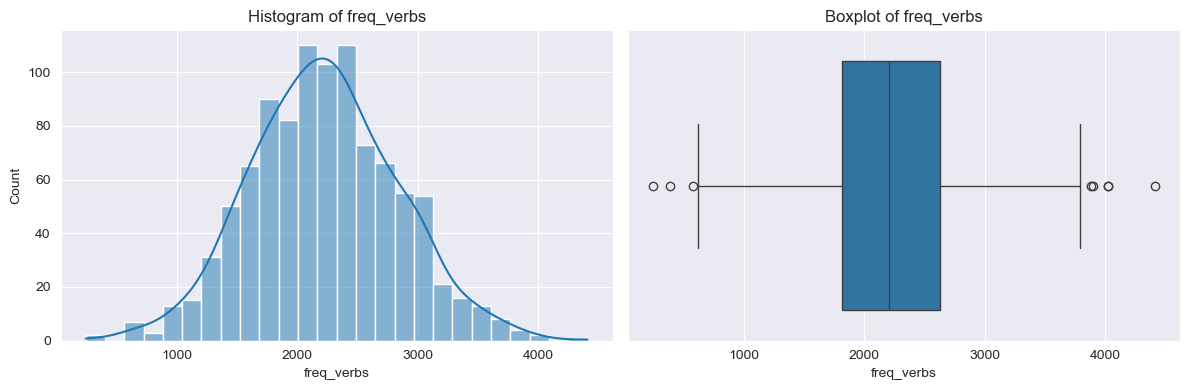

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/freq_verbs_distribution.png
outliers in 'freq_verbs': 
     Subject_ID   freq_verbs
352         538  3897.090414
396         596  3879.313725
616         871   244.244009
696         975  4020.624183
828        1146  4019.085973
907        1249   574.595588
914        1257  4411.928105
966        1331   382.422460



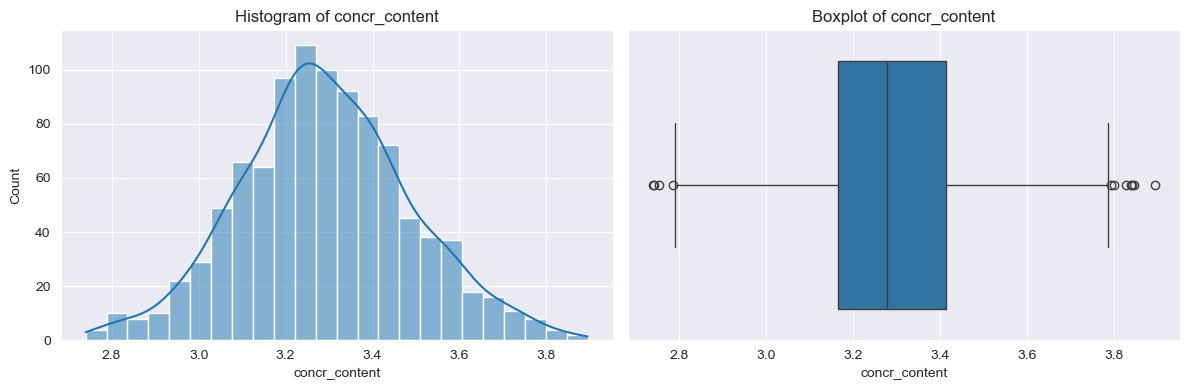

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/concr_content_distribution.png
outliers in 'concr_content': 
     Subject_ID  concr_content
76          176       3.839273
202         348       3.794394
258         419       3.800227
390         589       3.842564
427         633       2.741739
473         689       3.847500
766        1060       3.895000
794        1099       3.827922
806        1116       2.753824
941        1298       2.740000
977        1349       2.786341



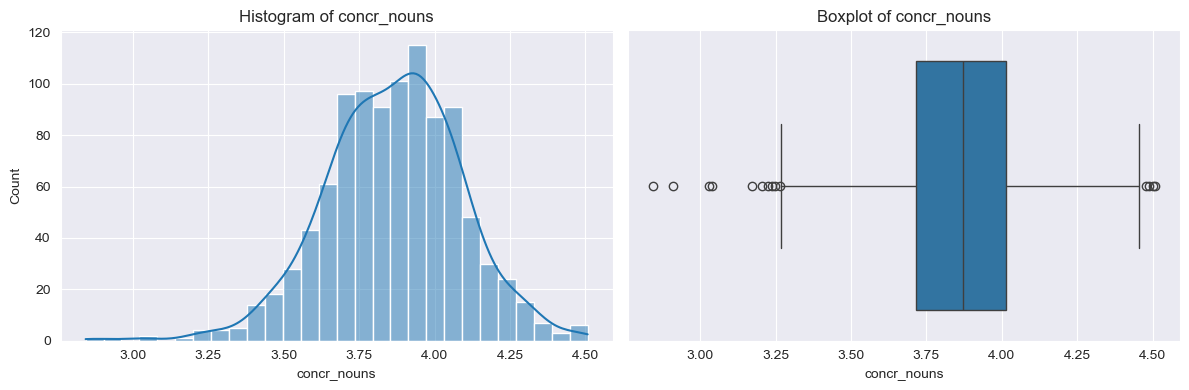

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/concr_nouns_distribution.png
outliers in 'concr_nouns': 
     Subject_ID  concr_nouns
228         379     4.507200
328         504     3.170909
368         560     2.843333
485         704     2.910263
558         793     3.029394
600         849     4.478182
614         867     3.038400
750        1044     3.204667
766        1060     4.488947
806        1116     3.224545
813        1125     3.247857
916        1264     4.500625
946        1308     3.263333
965        1330     3.238333



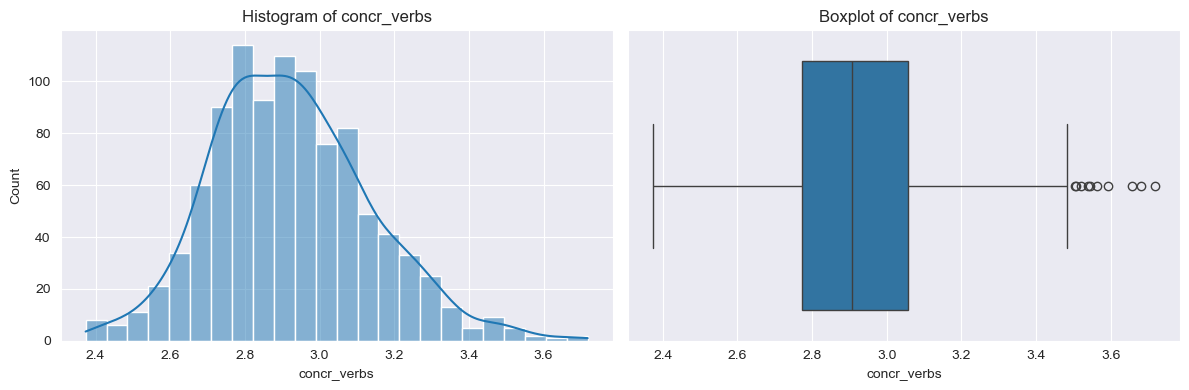

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/concr_verbs_distribution.png
outliers in 'concr_verbs': 
     Subject_ID  concr_verbs
211         361     3.545000
255         415     3.502857
262         424     3.506500
309         484     3.680000
338         519     3.520000
444         655     3.538421
473         689     3.718235
538         771     3.593846
790        1095     3.656000
911        1253     3.562000



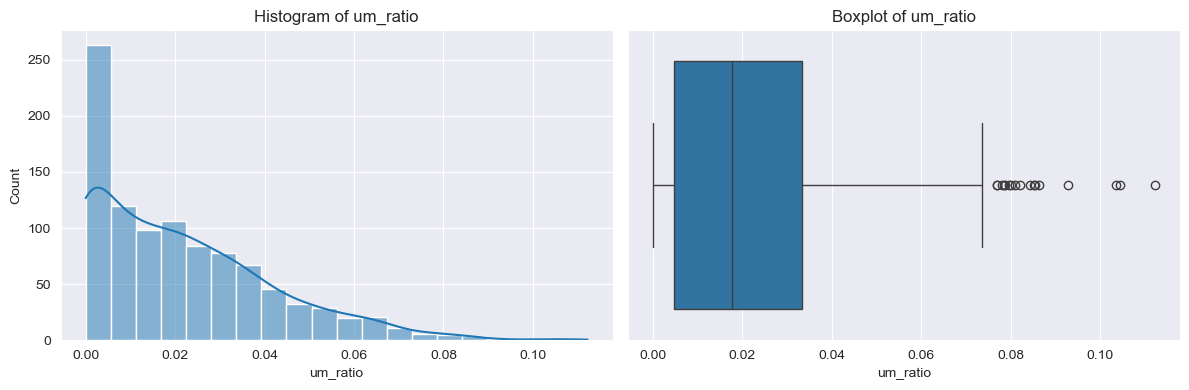

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/um_ratio_distribution.png
outliers in 'um_ratio': 
     Subject_ID  um_ratio
123         239  0.085271
137         260  0.112245
140         263  0.085470
198         344  0.092784
217         367  0.079545
310         485  0.084416
330         506  0.080863
501         725  0.078818
569         808  0.078014
577         821  0.086331
770        1065  0.104348
799        1105  0.103448
822        1138  0.082192
884        1220  0.076923
892        1232  0.078571
899        1240  0.076923
969        1336  0.080000



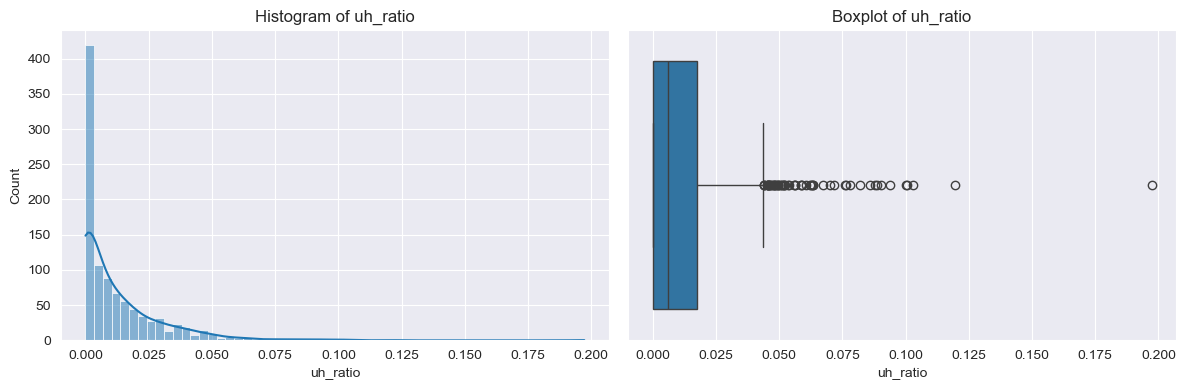

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/uh_ratio_distribution.png
outliers in 'uh_ratio': 
     Subject_ID  uh_ratio
6            54  0.052174
39          127  0.048387
56          146  0.093960
127         244  0.055944
165         295  0.081818
173         306  0.053846
175         312  0.090164
185         327  0.056338
193         338  0.058824
255         415  0.045455
258         419  0.056452
278         444  0.047619
280         446  0.197279
322         498  0.046218
332         508  0.071749
339         520  0.051948
350         536  0.043956
351         537  0.045455
361         550  0.045685
365         557  0.046729
390         589  0.051724
406         609  0.086022
427         633  0.100000
451         663  0.062500
465         678  0.059226
476         692  0.049505
481         698  0.046512
537         770  0.048276
551         784  0.060790
552         786  0.100719
554         788  0

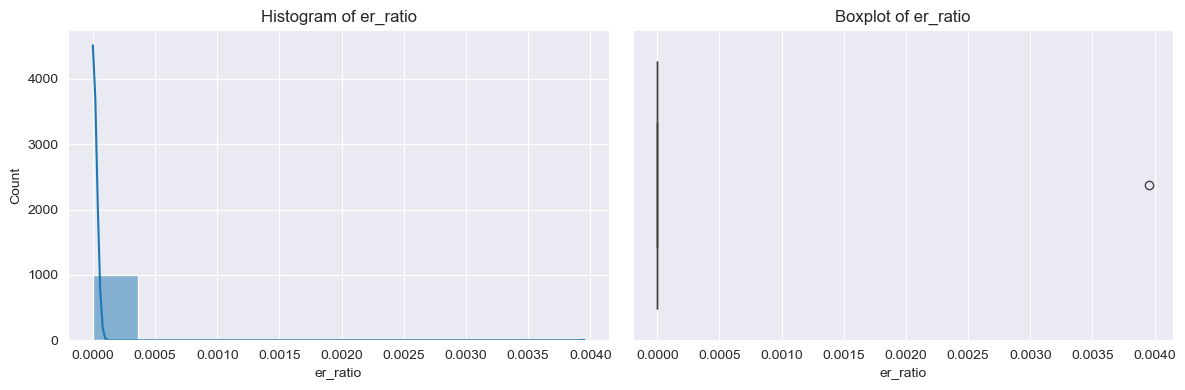

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/er_ratio_distribution.png
outliers in 'er_ratio': 
     Subject_ID  er_ratio
485         704  0.003953



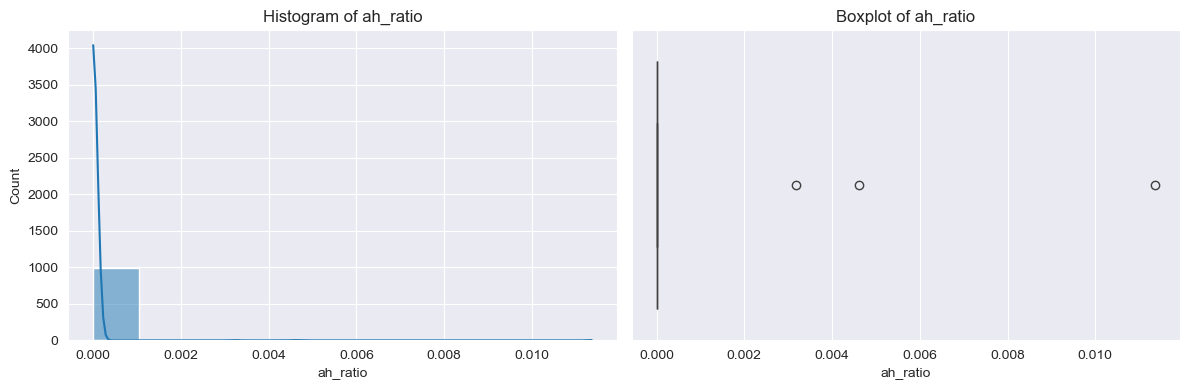

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/ah_ratio_distribution.png
outliers in 'ah_ratio': 
     Subject_ID  ah_ratio
351         537  0.011364
782        1083  0.003185
904        1246  0.004608



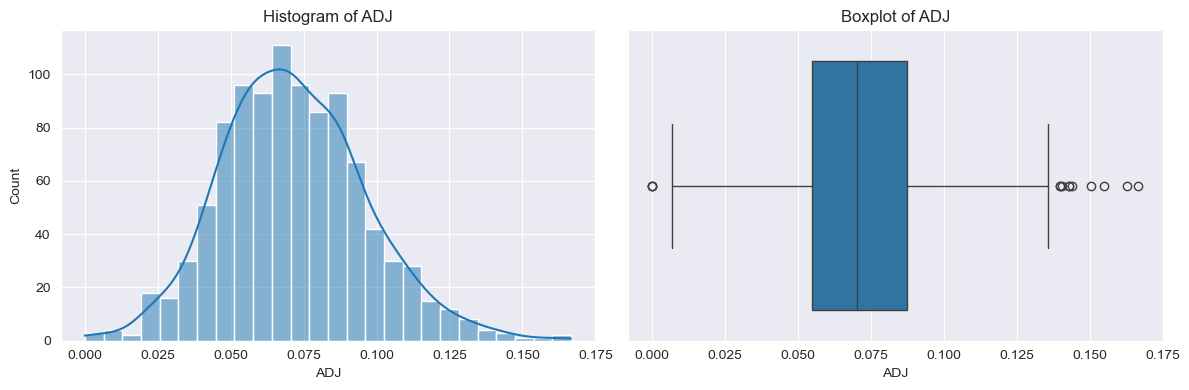

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/ADJ_distribution.png
outliers in 'ADJ': 
     Subject_ID       ADJ
32          112  0.139860
68          163  0.154762
137         260  0.142857
208         358  0.143885
309         484  0.000000
573         814  0.150442
632         893  0.140625
799        1105  0.000000
807        1117  0.162791
837        1162  0.000000
864        1198  0.140000
941        1298  0.166667
992        1368  0.142857



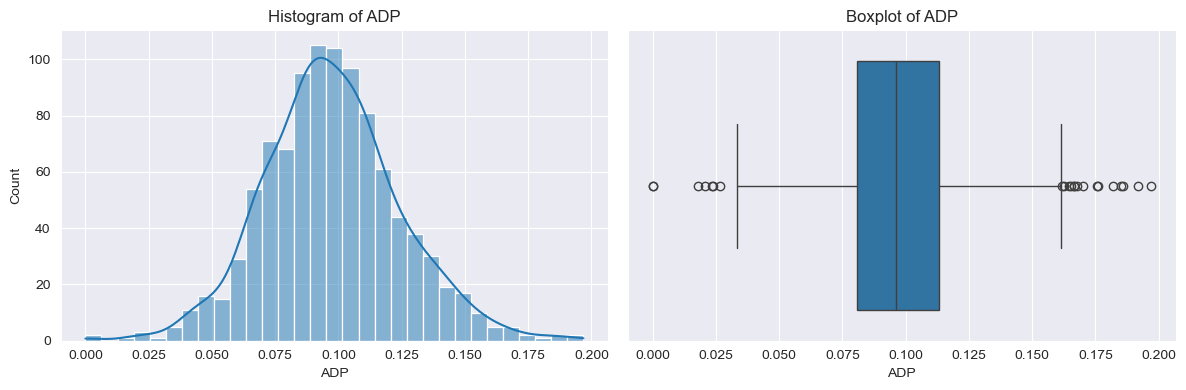

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/ADP_distribution.png
outliers in 'ADP': 
     Subject_ID       ADP
90          198  0.017857
179         319  0.020619
211         361  0.191781
227         378  0.196809
299         471  0.166667
309         484  0.000000
313         489  0.167702
503         728  0.175824
516         745  0.162602
555         789  0.185714
596         844  0.170000
641         904  0.165217
652         918  0.181818
750        1044  0.026786
786        1089  0.161905
790        1095  0.000000
796        1101  0.166667
807        1117  0.023256
808        1118  0.185185
876        1212  0.164557
906        1248  0.175573
941        1298  0.023810



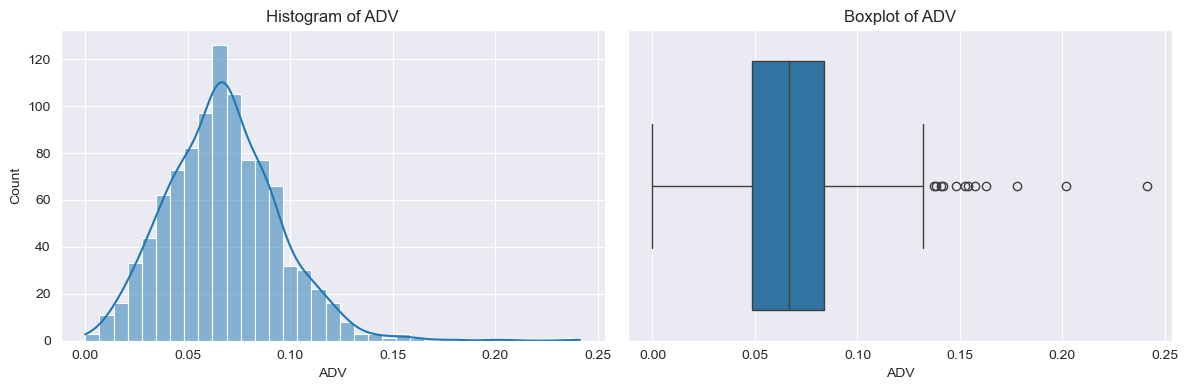

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/ADV_distribution.png
outliers in 'ADV': 
     Subject_ID       ADV
148         272  0.157258
219         369  0.152672
289         461  0.177778
389         588  0.153846
399         600  0.148148
525         757  0.138298
604         854  0.137405
684         962  0.201754
777        1074  0.140940
799        1105  0.241379
801        1107  0.141593
807        1117  0.162791



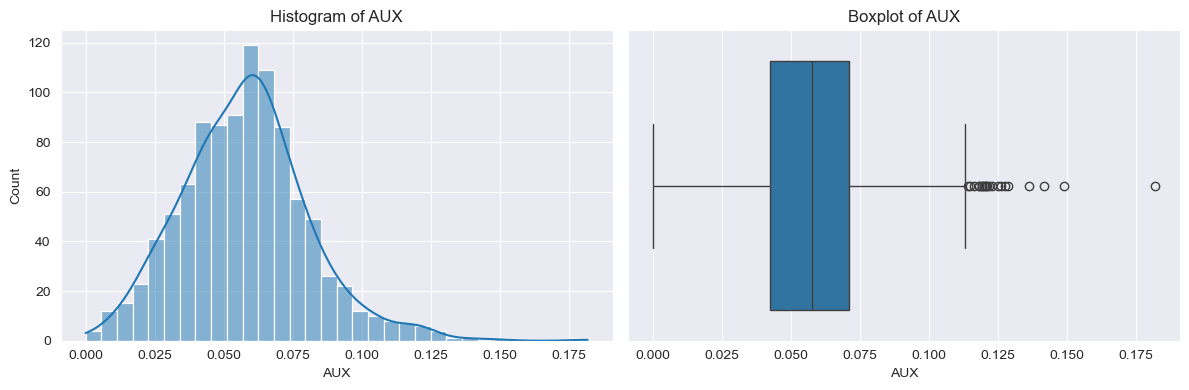

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/AUX_distribution.png
outliers in 'AUX': 
     Subject_ID       AUX
19           93  0.120301
112         222  0.148760
231         384  0.116438
309         484  0.181818
367         559  0.118056
412         615  0.119048
437         647  0.125926
439         649  0.121622
450         662  0.136095
472         688  0.114130
526         758  0.120833
557         791  0.122699
561         797  0.120482
590         838  0.114943
605         855  0.119760
670         942  0.118056
742        1030  0.127517
744        1036  0.141667
750        1044  0.125000
850        1179  0.128440
941        1298  0.119048



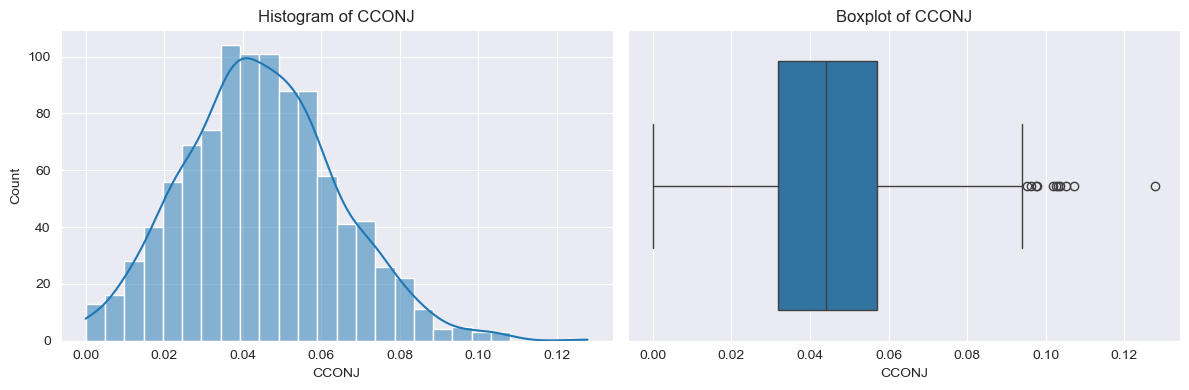

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/CCONJ_distribution.png
outliers in 'CCONJ': 
     Subject_ID     CCONJ
20           97  0.127820
64          157  0.107143
76          176  0.102740
249         404  0.095238
321         497  0.105263
451         663  0.097458
482         701  0.101852
612         864  0.103175
672         944  0.103774
680         954  0.096386
851        1180  0.097902



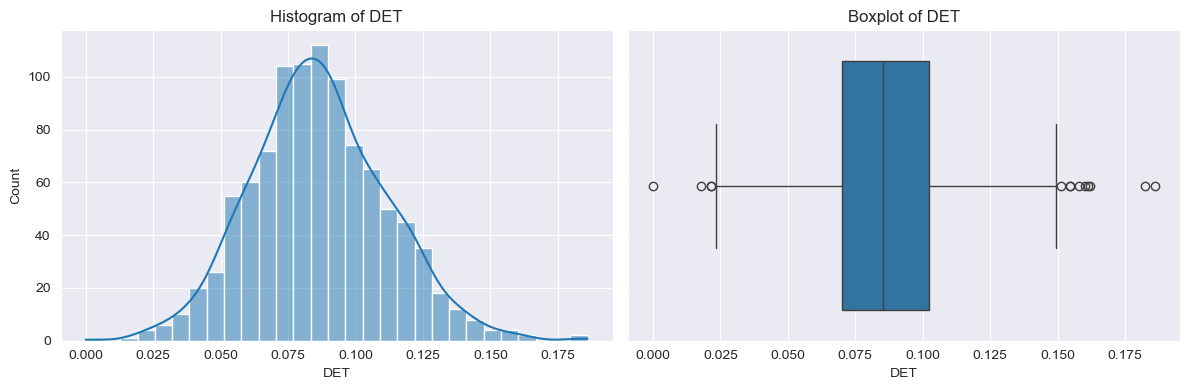

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/DET_distribution.png
outliers in 'DET': 
     Subject_ID       DET
120         233  0.186047
192         337  0.162162
199         345  0.160000
253         410  0.151316
309         484  0.000000
416         621  0.157895
516         745  0.154472
577         821  0.021583
746        1038  0.017699
769        1063  0.154472
790        1095  0.161290
867        1201  0.182540
953        1315  0.021429



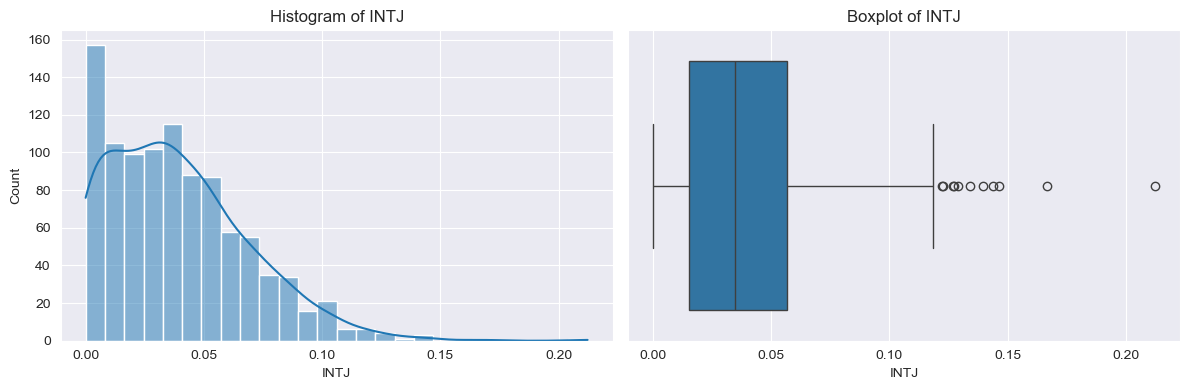

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/INTJ_distribution.png
outliers in 'INTJ': 
     Subject_ID      INTJ
6            54  0.122807
56          146  0.134228
137         260  0.122449
140         263  0.127119
165         295  0.127273
258         419  0.129032
280         446  0.212329
427         633  0.166667
571         811  0.146341
577         821  0.143885
899        1240  0.139423



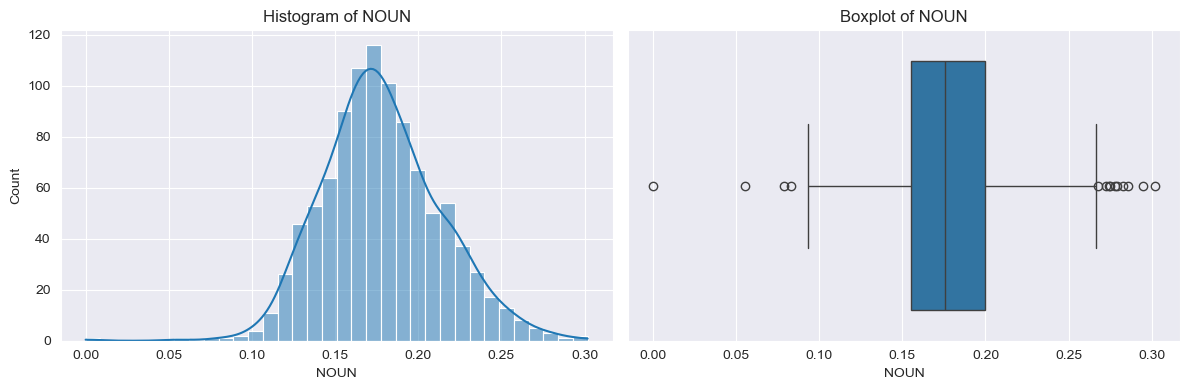

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/NOUN_distribution.png
outliers in 'NOUN': 
     Subject_ID      NOUN
91          199  0.274725
208         358  0.079137
309         484  0.000000
345         530  0.272727
358         547  0.082873
427         633  0.055556
432         641  0.277778
679         953  0.267857
731        1019  0.274286
827        1144  0.294737
887        1225  0.285714
893        1233  0.278846
906        1248  0.282443
966        1331  0.301887



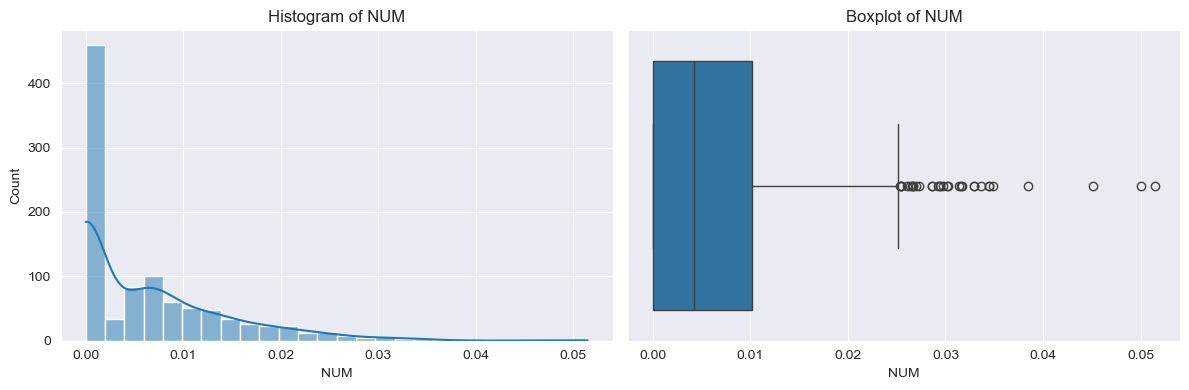

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/NUM_distribution.png
outliers in 'NUM': 
     Subject_ID       NUM
38          124  0.033613
60          151  0.026087
89          197  0.045161
121         234  0.030303
236         389  0.034483
239         393  0.038462
274         438  0.028571
294         466  0.051471
308         483  0.029412
374         570  0.029412
381         580  0.032967
383         582  0.034884
414         618  0.029240
455         667  0.026667
503         728  0.032967
517         747  0.025424
519         749  0.030189
549         782  0.031373
580         826  0.027237
597         845  0.050000
604         854  0.026718
624         884  0.031646
627         888  0.025381
648         913  0.029740
709         997  0.025397
711         999  0.034483
719        1007  0.025478
745        1037  0.026316
779        1079  0.028571
827        1144  0.031579
852        1183  0.026596
87

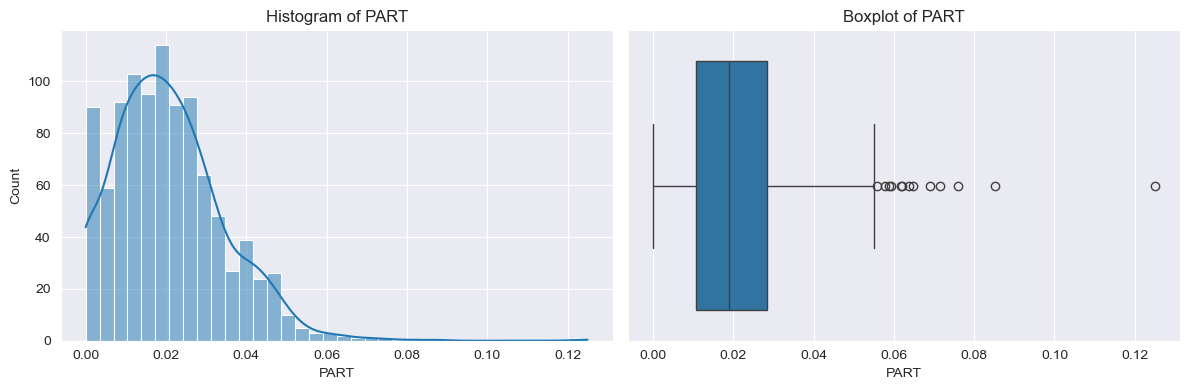

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/PART_distribution.png
outliers in 'PART': 
     Subject_ID      PART
25          103  0.063830
63          154  0.061728
90          198  0.125000
111         220  0.061947
112         222  0.057851
236         389  0.068966
342         524  0.064706
411         614  0.058824
588         835  0.059259
715        1003  0.085106
750        1044  0.071429
756        1050  0.055866
943        1302  0.075949



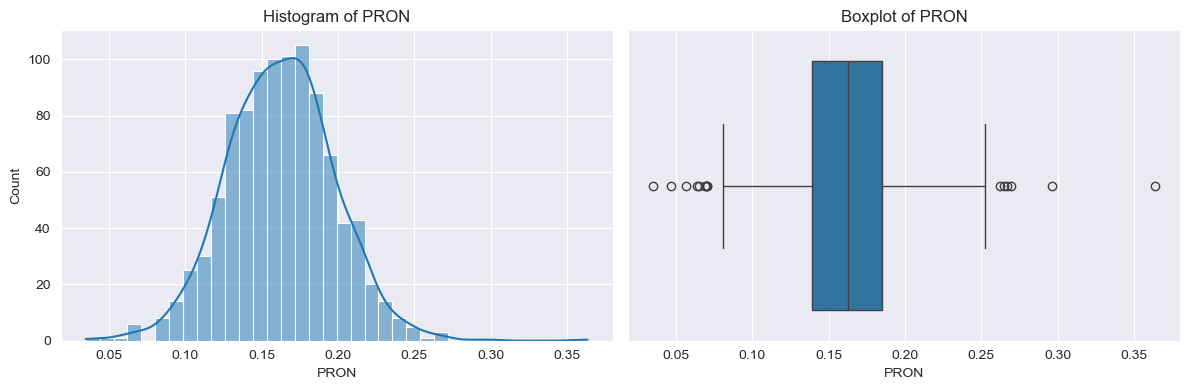

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/PRON_distribution.png
outliers in 'PRON': 
     Subject_ID      PRON
120         233  0.046512
127         244  0.069930
165         295  0.063636
227         378  0.069149
309         484  0.363636
326         502  0.266667
516         745  0.065041
641         904  0.034783
656         922  0.296296
684         962  0.070175
755        1049  0.069767
885        1222  0.264706
941        1298  0.261905
952        1314  0.269373
966        1331  0.056604



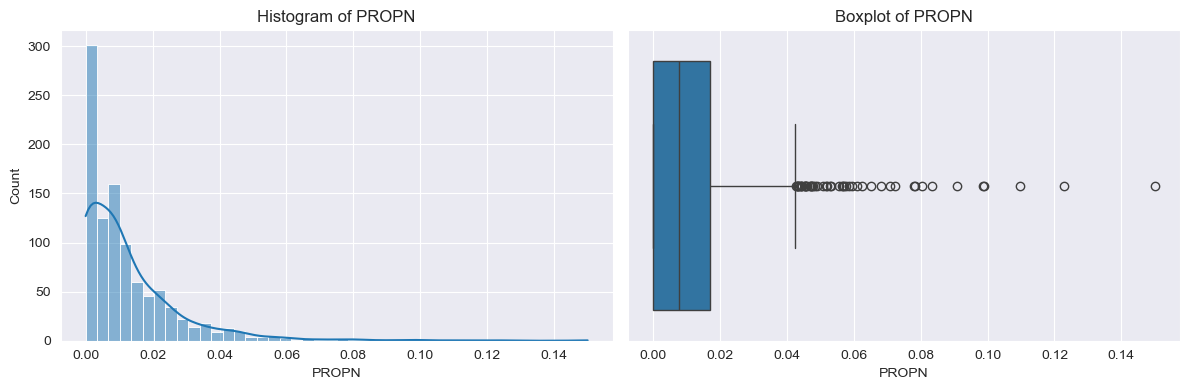

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/PROPN_distribution.png
outliers in 'PROPN': 
     Subject_ID     PROPN
17           91  0.045455
88          196  0.099010
111         220  0.044248
151         276  0.045455
178         318  0.051613
188         330  0.057143
250         406  0.043344
263         425  0.062500
299         471  0.083333
309         484  0.090909
313         489  0.043478
337         516  0.047244
393         592  0.122951
484         703  0.042781
504         729  0.078125
516         745  0.056911
522         754  0.068182
542         775  0.048485
554         788  0.056604
556         790  0.047872
570         809  0.050847
583         829  0.044444
596         844  0.150000
613         866  0.072464
633         894  0.057692
637         899  0.045872
640         903  0.055556
641         904  0.043478
654         920  0.048951
676         950  0.043103
685         963  0.04545

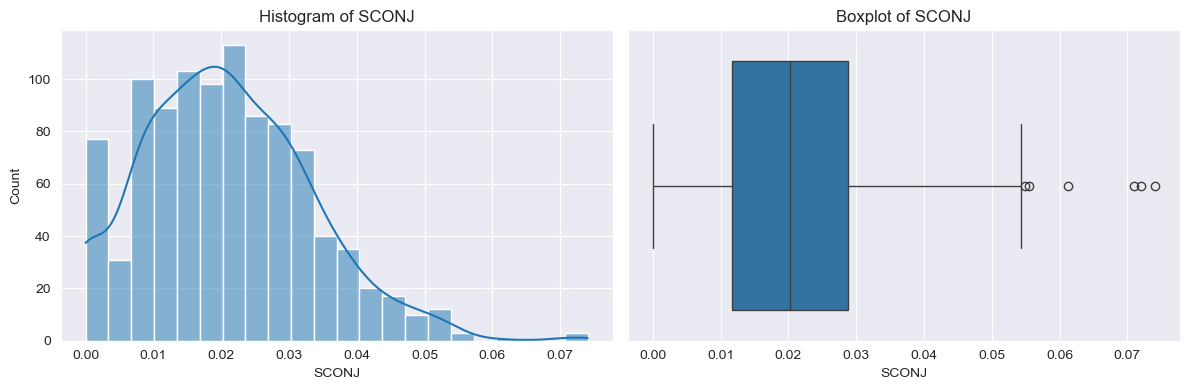

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/SCONJ_distribution.png
outliers in 'SCONJ': 
     Subject_ID     SCONJ
25          103  0.070922
149         274  0.072072
329         505  0.055556
784        1087  0.074074
806        1116  0.054945
982        1355  0.061224



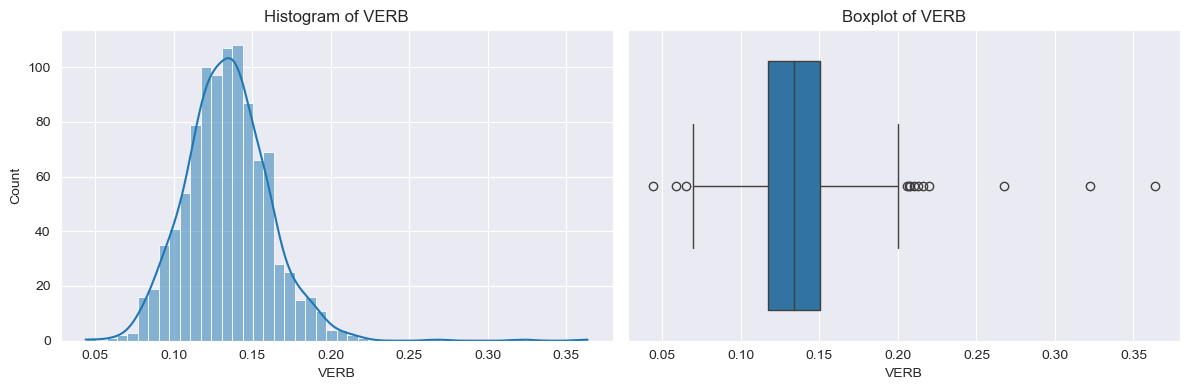

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/VERB_distribution.png
outliers in 'VERB': 
     Subject_ID      VERB
90          198  0.267857
236         389  0.206897
309         484  0.363636
351         537  0.215909
411         614  0.205882
503         728  0.043956
516         745  0.065041
715        1003  0.212766
790        1095  0.322581
834        1155  0.220000
861        1194  0.210191
866        1200  0.058824
966        1331  0.207547



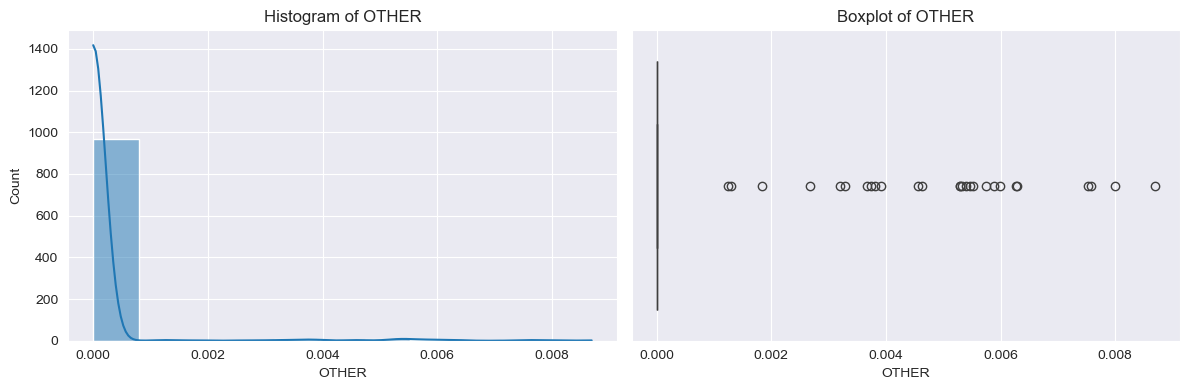

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/OTHER_distribution.png
outliers in 'OTHER': 
     Subject_ID     OTHER
0            41  0.008696
30          110  0.004630
75          175  0.005291
105         214  0.005525
114         225  0.003922
141         264  0.005291
180         321  0.006270
205         355  0.005319
321         497  0.007519
475         691  0.006289
494         717  0.005988
512         741  0.007576
532         765  0.003745
579         824  0.001290
611         863  0.005464
647         912  0.003289
712        1000  0.001842
724        1012  0.005747
726        1014  0.005882
741        1029  0.003802
778        1075  0.005405
782        1083  0.003195
795        1100  0.004566
853        1185  0.003663
854        1186  0.008000
896        1237  0.002681
944        1304  0.001245



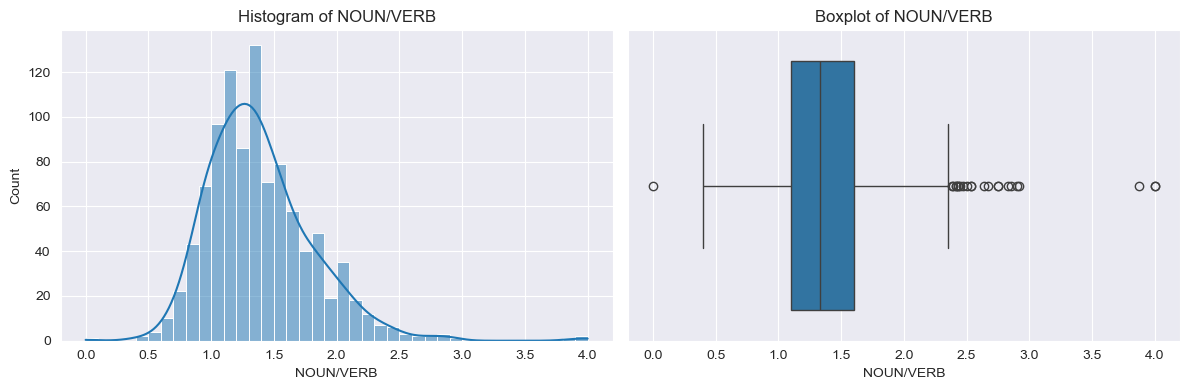

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/NOUN_VERB_distribution.png
outliers in 'NOUN/VERB': 
     Subject_ID  NOUN/VERB
87          195   2.416667
166         297   2.428571
169         301   2.900000
202         348   2.470588
217         367   2.857143
299         471   2.666667
309         484   0.000000
416         621   2.833333
503         728   4.000000
516         745   2.750000
594         842   2.538462
597         845   2.750000
640         903   2.428571
641         904   2.636364
673         945   2.538462
696         975   2.388889
755        1049   2.916667
815        1130   2.444444
827        1144   4.000000
835        1160   2.380952
866        1200   3.875000
907        1249   2.500000
921        1274   2.416667



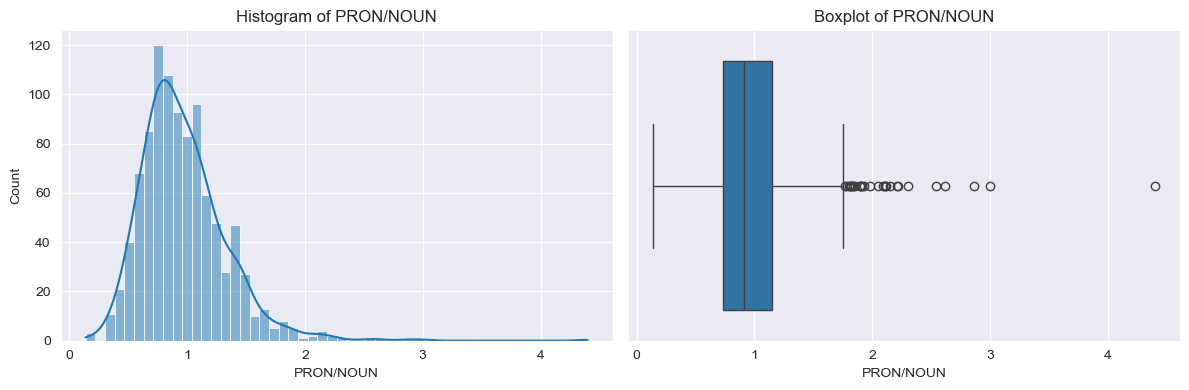

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/PRON_NOUN_distribution.png
outliers in 'PRON/NOUN': 
     Subject_ID  PRON/NOUN
36          122   2.052632
77          177   1.833333
83          188   1.909091
124         241   1.812500
149         274   2.153846
177         315   2.117647
208         358   2.545455
222         373   1.818182
324         500   2.307692
326         502   2.222222
342         524   2.105263
358         547   2.866667
391         590   1.900000
427         633   4.400000
504         729   1.800000
517         747   1.916667
518         748   1.928571
526         758   1.980769
577         821   2.615385
656         922   3.000000
676         950   2.090909
691         969   2.105263
744        1036   1.857143
767        1061   1.818182
847        1175   1.897959
874        1209   1.771429
929        1283   1.785714
941        1298   1.833333
952        1314   2.212121



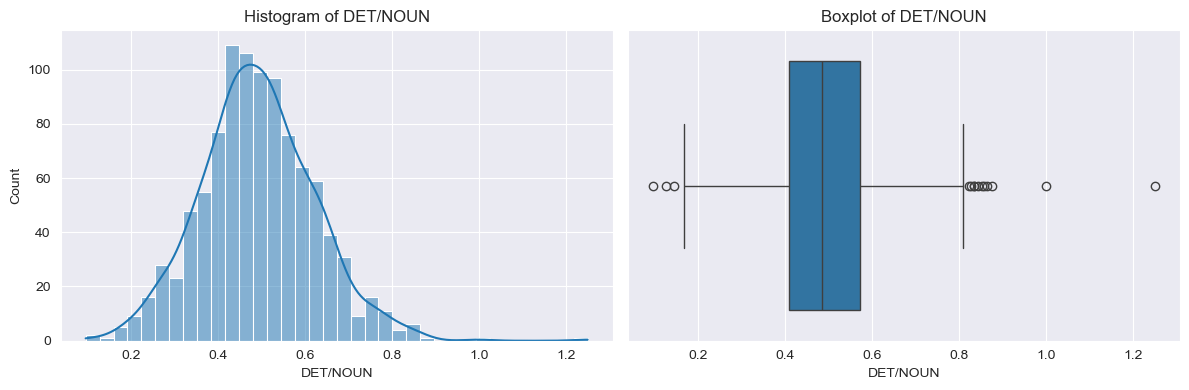

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/DET_NOUN_distribution.png
outliers in 'DET/NOUN': 
     Subject_ID  DET/NOUN
64          157  0.833333
90          198  0.833333
261         423  0.875000
340         522  0.142857
427         633  1.000000
516         745  0.863636
600         849  0.826087
655         921  0.857143
746        1038  0.095238
762        1056  0.843750
790        1095  1.250000
867        1201  0.851852
877        1213  0.823529
953        1315  0.125000



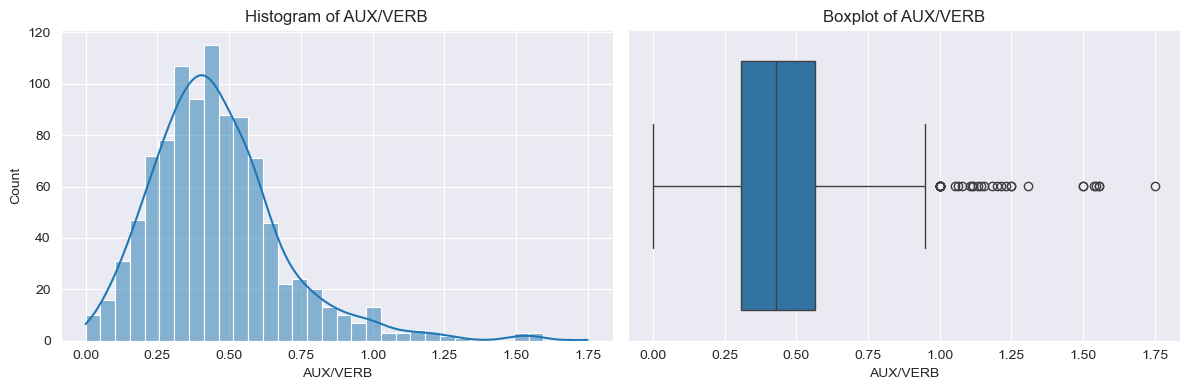

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/AUX_VERB_distribution.png
outliers in 'AUX/VERB': 
     Subject_ID  AUX/VERB
0            41  1.200000
14           88  1.000000
19           93  1.230769
21           98  1.111111
28          107  1.000000
42          130  1.117647
112         222  1.500000
123         239  1.181818
179         319  1.250000
228         379  1.000000
231         384  1.062500
352         538  1.000000
367         559  1.214286
412         615  1.000000
437         647  1.133333
439         649  1.000000
469         682  1.000000
472         688  1.105263
503         728  1.750000
557         791  1.052632
561         797  1.000000
566         803  1.153846
590         838  1.250000
605         855  1.538462
670         942  1.545455
672         944  1.000000
744        1036  1.307692
750        1044  1.555556
754        1048  1.076923
775        1072  1.142857
827        1144  1

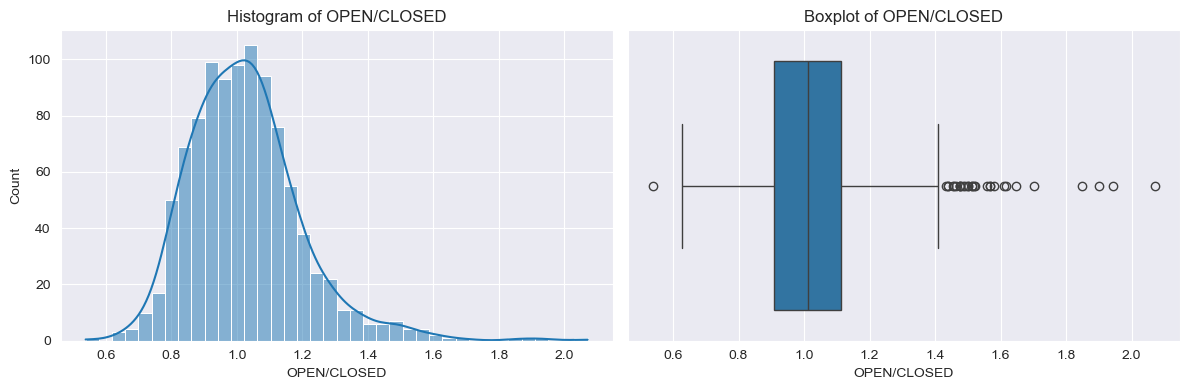

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/OPEN_CLOSED_distribution.png
outliers in 'OPEN/CLOSED': 
     Subject_ID  OPEN/CLOSED
88          196     1.463415
129         248     1.456790
137         260     1.578947
165         295     1.500000
184         326     1.476190
217         367     1.514286
280         446     1.703704
289         461     1.454545
328         504     1.439024
333         509     1.518519
340         522     1.433333
394         593     1.523077
399         600     1.492308
471         684     1.609756
526         758     0.538462
573         814     1.568182
596         844     1.500000
609         859     1.439024
638         901     1.557692
682         957     1.512821
684         962     1.850000
755        1049     1.646154
766        1060     1.484848
799        1105     1.900000
801        1107     1.568182
807        1117     2.071429
835        1160     1.617284
893   

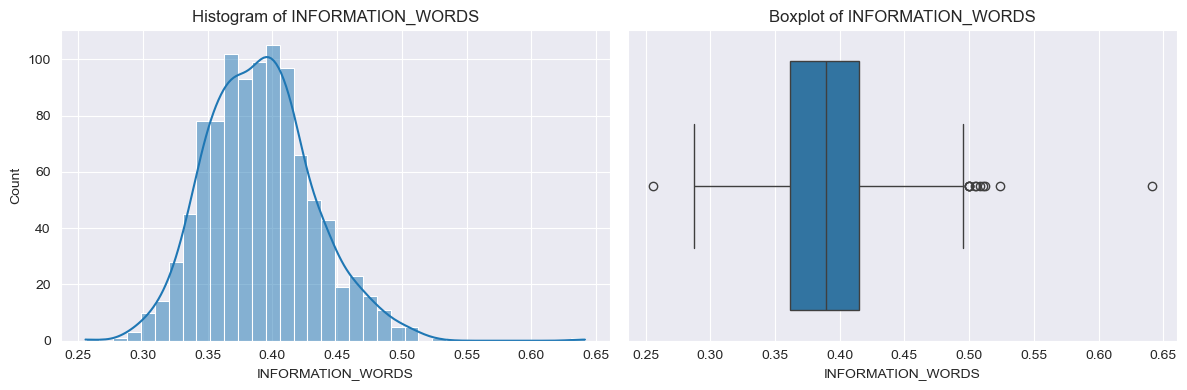

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/INFORMATION_WORDS_distribution.png
outliers in 'INFORMATION_WORDS': 
     Subject_ID  INFORMATION_WORDS
345         530           0.500000
368         560           0.510870
383         582           0.500000
427         633           0.255556
527         760           0.512500
573         814           0.504425
653         919           0.505618
731        1019           0.508571
834        1155           0.500000
887        1225           0.523810
893        1233           0.500000
966        1331           0.641509



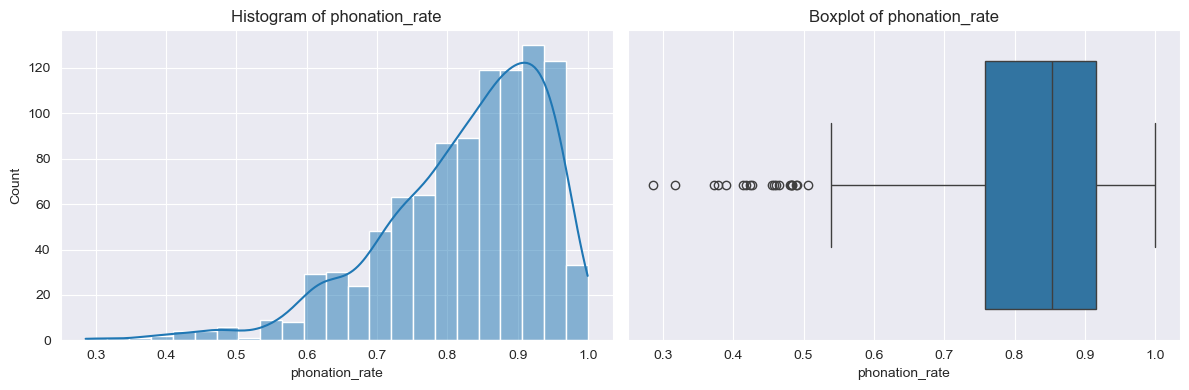

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/phonation_rate_distribution.png
outliers in 'phonation_rate': 
     Subject_ID  phonation_rate
211         361        0.483760
331         507        0.481793
427         633        0.458398
505         732        0.390296
616         871        0.488688
632         893        0.426581
640         903        0.423335
656         922        0.480243
790        1095        0.461307
799        1105        0.454634
807        1117        0.413790
808        1118        0.465414
816        1131        0.506951
880        1216        0.417603
885        1222        0.373034
900        1241        0.285781
906        1248        0.378993
941        1298        0.316982
943        1302        0.483317
966        1331        0.490826



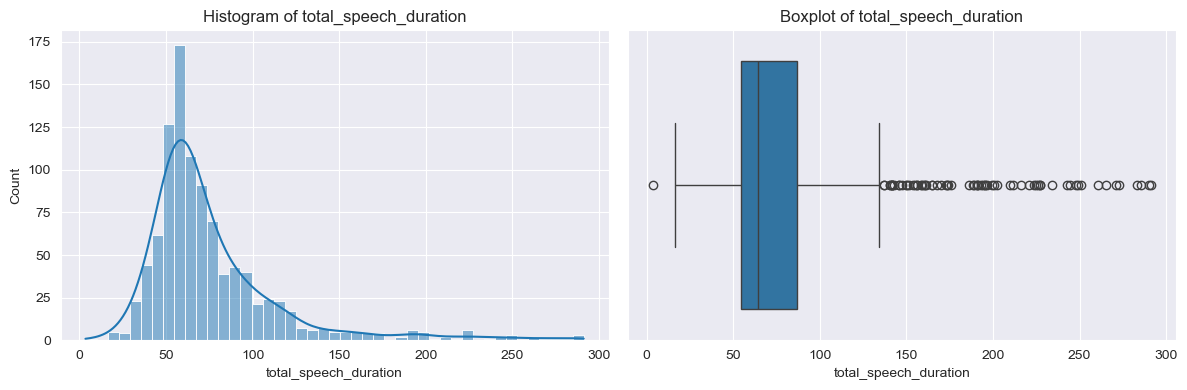

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/total_speech_duration_distribution.png
outliers in 'total_speech_duration': 
     Subject_ID  total_speech_duration
5            50                 174.00
13           86                 158.88
36          122                 160.59
48          137                 226.86
51          140                 140.43
..          ...                    ...
954        1316                 244.59
960        1324                 164.52
967        1332                 225.09
975        1347                 151.59
994        1370                 191.25

[70 rows x 2 columns]



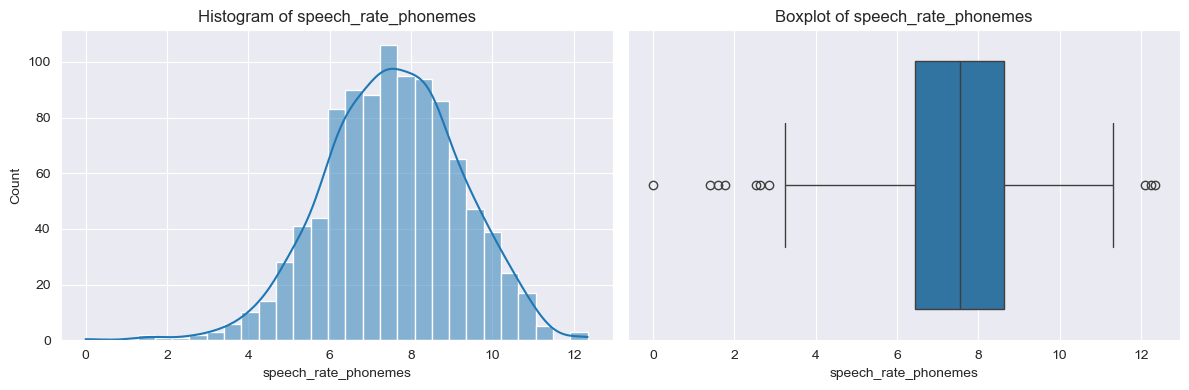

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/speech_rate_phonemes_distribution.png
outliers in 'speech_rate_phonemes': 
     Subject_ID  speech_rate_phonemes
147         271             12.240484
302         474              0.000000
309         484              1.409619
589         836             12.095747
640         903              2.842996
679         953              2.538203
779        1079              1.603849
790        1095              1.777013
860        1193             12.342422
900        1241              2.642657



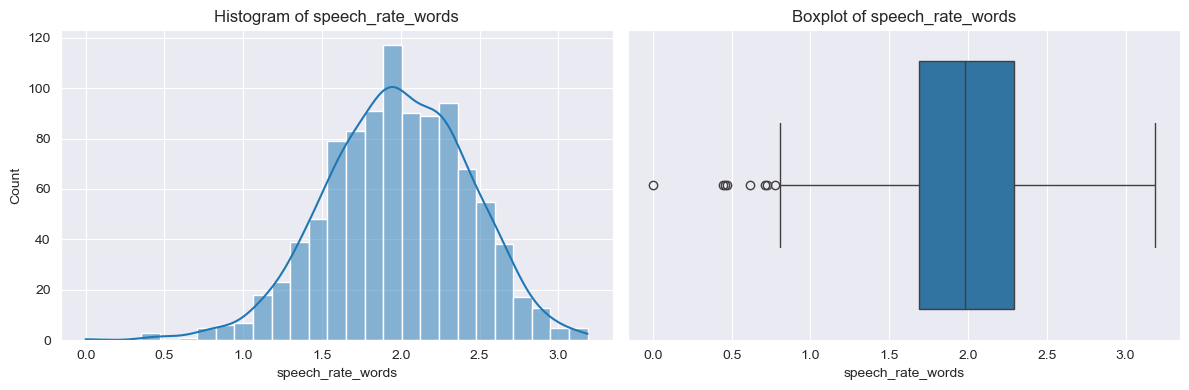

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/speech_rate_words_distribution.png
outliers in 'speech_rate_words': 
     Subject_ID  speech_rate_words
302         474           0.000000
309         484           0.456053
640         903           0.710749
679         953           0.725201
779        1079           0.467789
790        1095           0.444253
799        1105           0.772372
900        1241           0.615840



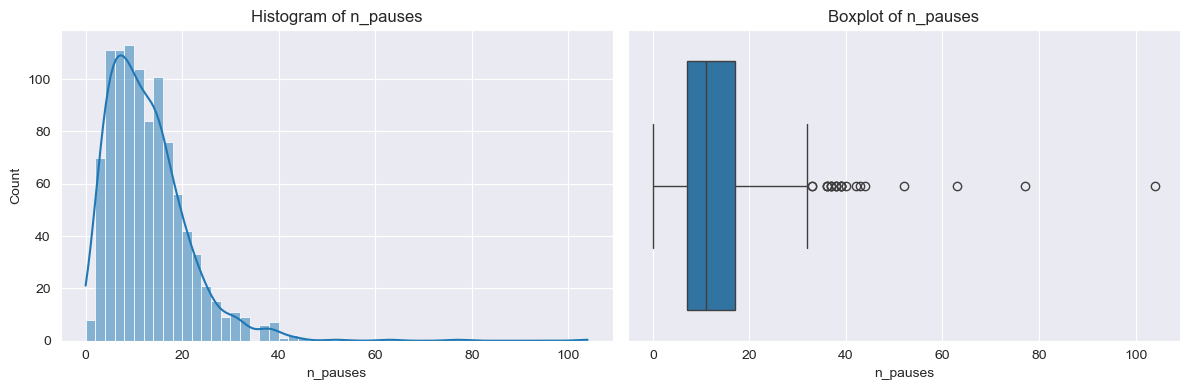

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/n_pauses_distribution.png
outliers in 'n_pauses': 
     Subject_ID  n_pauses
36          122        39
40          128        44
51          140        42
109         218        52
198         344        39
261         423        43
301         473        63
306         480        37
310         485        38
366         558        33
402         604        37
409         612        37
524         756        33
526         758        36
531         764       104
658         924        39
690         968        38
728        1016        40
845        1172        36
862        1195        38
920        1271        39
954        1316        36
994        1370        77



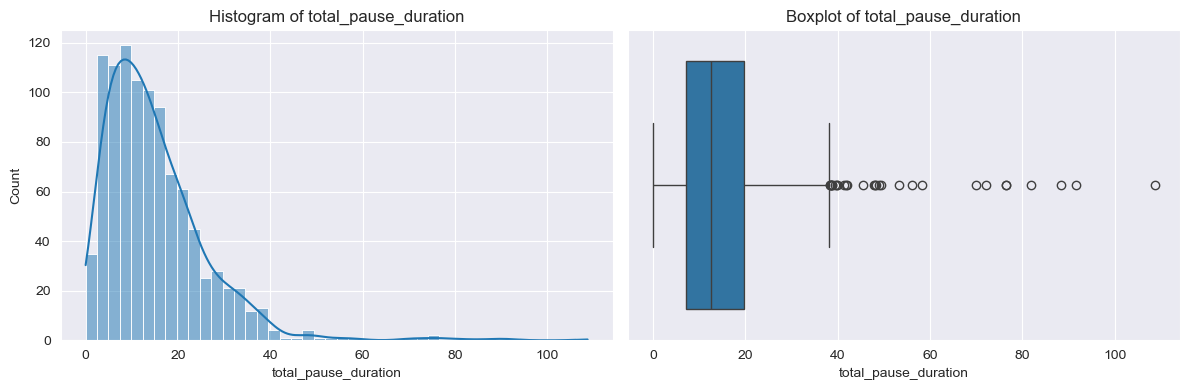

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/total_pause_duration_distribution.png
outliers in 'total_pause_duration': 
     Subject_ID  total_pause_duration
22           99                 38.43
40          128                 48.96
109         218                 47.91
121         234                 38.79
301         473                 76.50
306         480                 70.02
328         504                 38.55
339         520                 38.85
378         577                 38.34
402         604                 53.28
427         633                 41.76
480         697                 58.32
505         732                 76.50
526         758                 56.16
531         764                 88.29
538         771                 39.42
640         903                 72.18
658         924                 38.58
690         968                 39.87
728        1016                 49.47
76

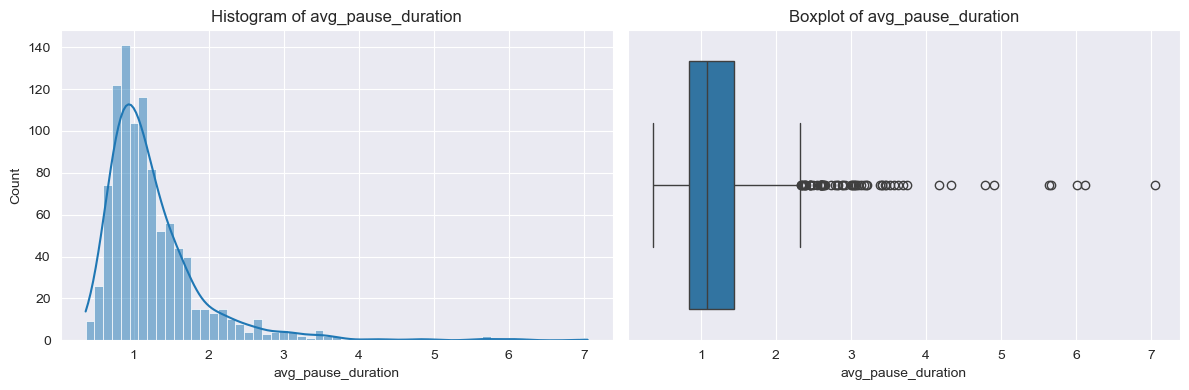

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/avg_pause_duration_distribution.png
outliers in 'avg_pause_duration': 
     Subject_ID  avg_pause_duration
61          152            2.550000
64          157            2.473636
69          165            2.655000
95          203            2.449091
106         215            2.832000
..          ...                 ...
900        1241            3.392222
906        1248            2.728000
941        1298            3.567000
947        1309            2.601429
972        1341            3.195000

[62 rows x 2 columns]



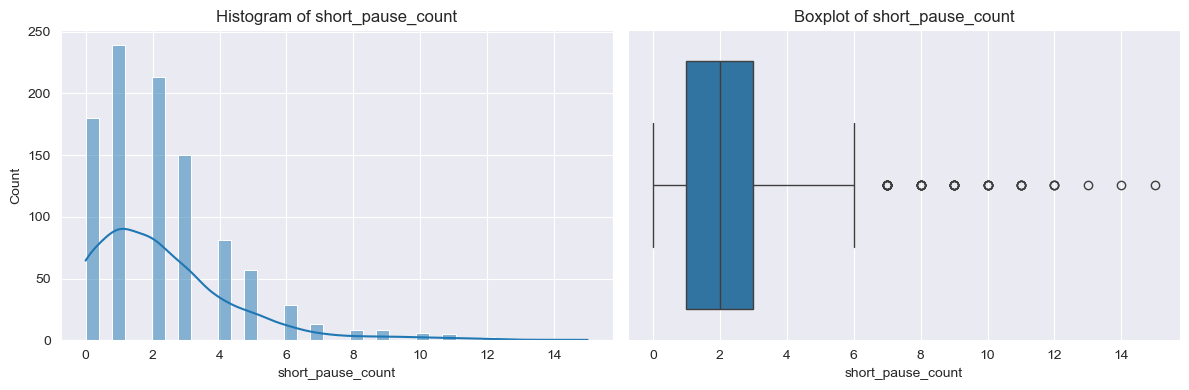

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/short_pause_count_distribution.png
outliers in 'short_pause_count': 
     Subject_ID  short_pause_count
21           98                  7
36          122                 12
40          128                 12
109         218                 14
198         344                  7
205         355                  7
261         423                 15
276         441                  7
288         459                 11
301         473                 10
310         485                  8
350         536                  7
363         553                  9
366         558                  9
398         598                  9
409         612                  8
424         629                  9
432         641                  7
443         653                  7
451         663                  8
457         669                 10
472         688                  9
5

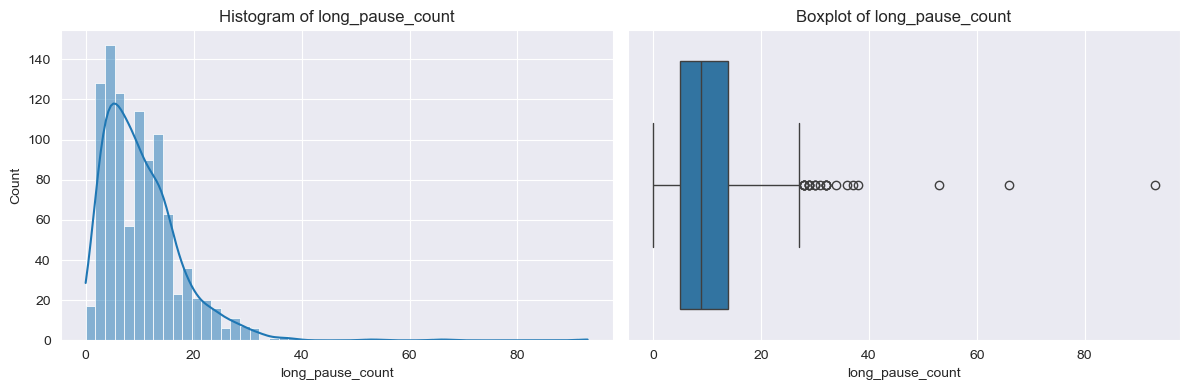

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/long_pause_count_distribution.png
outliers in 'long_pause_count': 
     Subject_ID  long_pause_count
30          110                29
40          128                32
51          140                36
109         218                38
198         344                32
261         423                28
301         473                53
306         480                32
310         485                30
341         523                28
402         604                32
409         612                29
480         697                28
531         764                93
548         781                28
658         924                29
690         968                34
728        1016                37
793        1098                31
841        1167                28
845        1172                28
862        1195                30
906        1248           

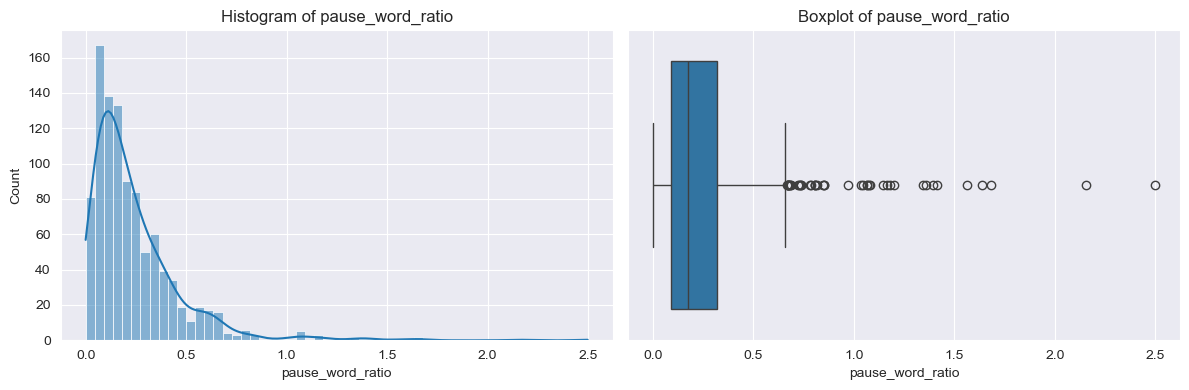

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/pause_word_ratio_distribution.png
outliers in 'pause_word_ratio': 
     Subject_ID  pause_word_ratio
64          157          0.674851
68          163          0.671266
121         234          0.806110
165         295          0.726598
211         361          1.066124
314         490          0.779841
324         500          0.674058
328         504          0.853254
331         507          1.074612
383         582          0.806768
402         604          0.676056
427         633          1.180662
453         665          0.814897
502         727          0.670670
505         732          1.561543
538         771          0.804654
573         814          0.786678
613         866          0.846207
616         871          1.045370
628         889          0.667214
632         893          1.342965
640         903          1.361630
655         921          0

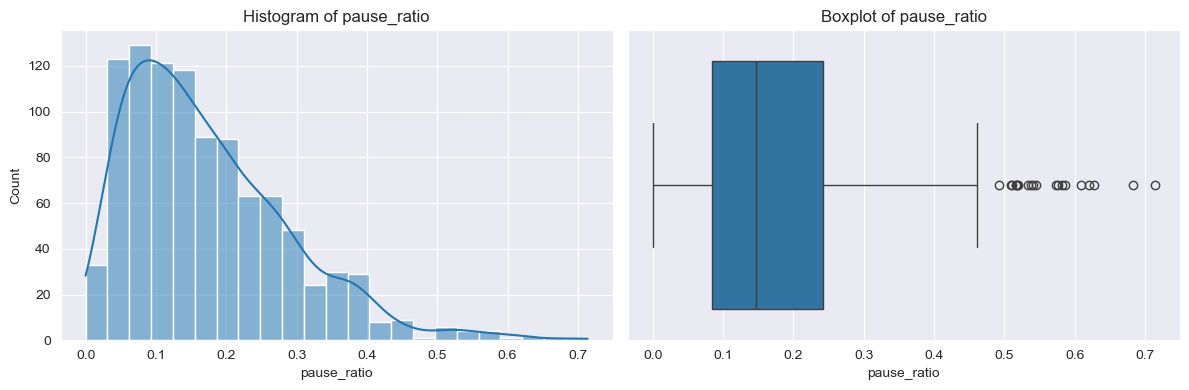

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/pause_ratio_distribution.png
outliers in 'pause_ratio': 
     Subject_ID  pause_ratio
211         361     0.515748
331         507     0.517740
427         633     0.541213
505         732     0.609465
616         871     0.510860
632         893     0.572883
640         903     0.576425
656         922     0.519366
790        1095     0.538263
799        1105     0.544922
807        1117     0.586102
808        1118     0.534159
816        1131     0.492938
880        1216     0.582071
885        1222     0.626787
900        1241     0.713985
906        1248     0.620957
941        1298     0.682775
943        1302     0.516192
966        1331     0.508860



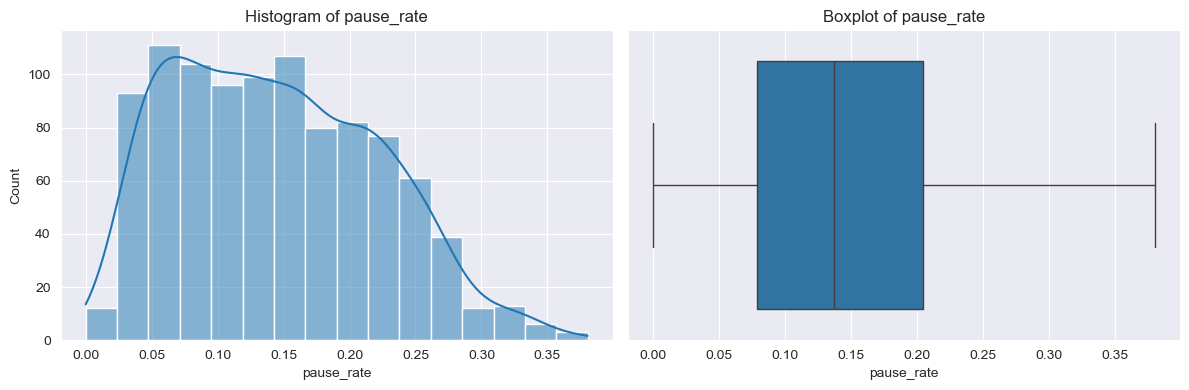

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/pause_rate_distribution.png


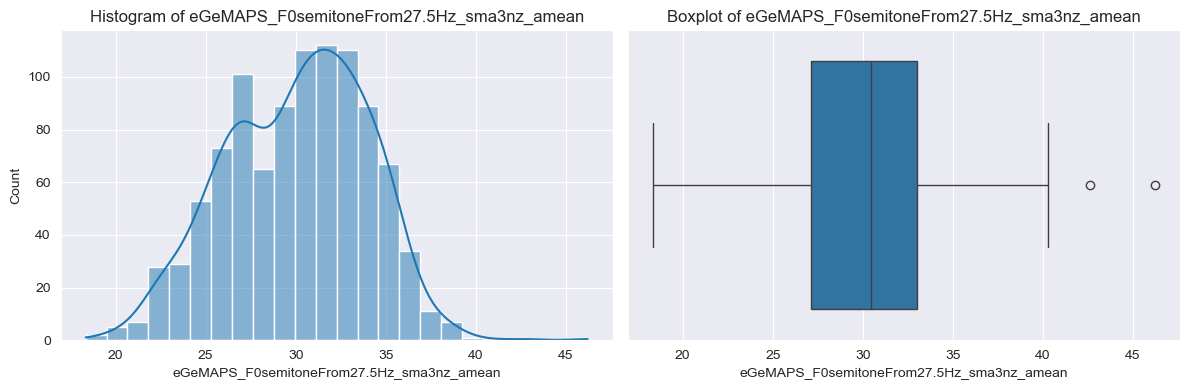

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_amean': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_amean
292         464                                  42.630955
697         979                                  46.214504



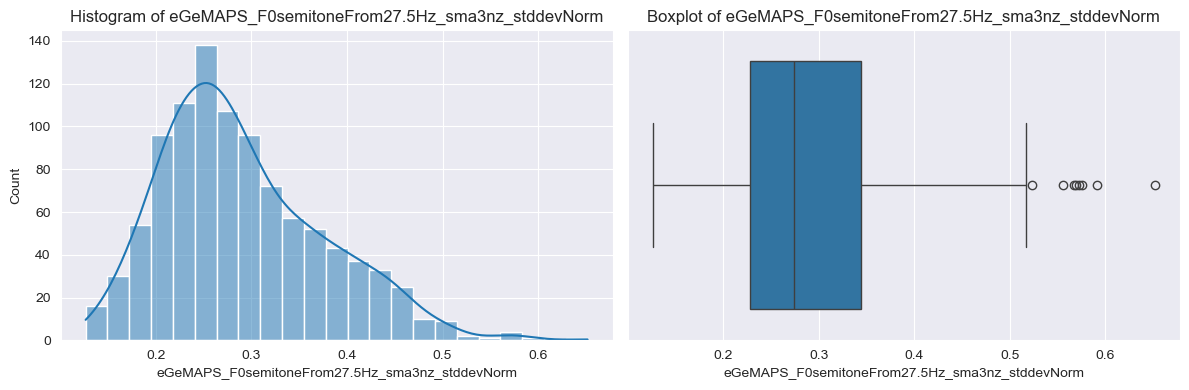

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevNorm
225         376                                        0.568948
378         577                                        0.566974
420         625                                        0.556111
428         636                                        0.591712
781        1082                                        0.523768
844        1170                                        0.651868
901        1242                                        0.572297
933        1288                                        0.575609



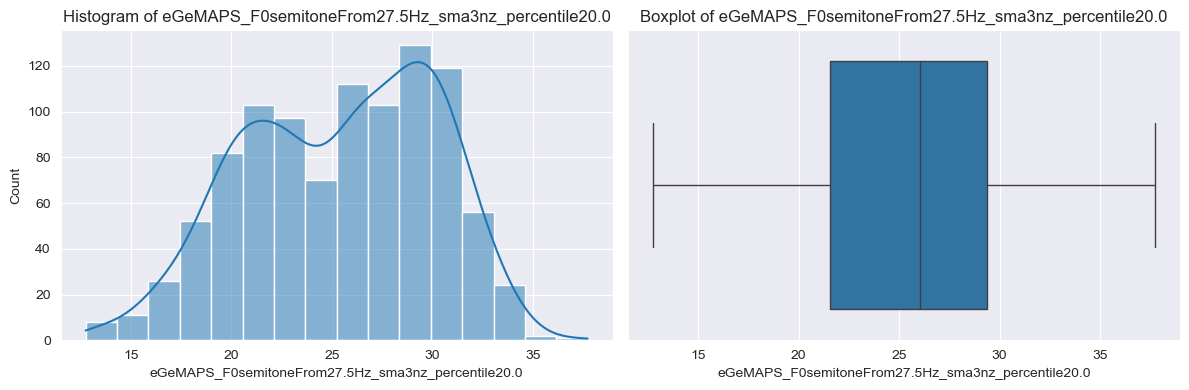

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile20.0_distribution.png


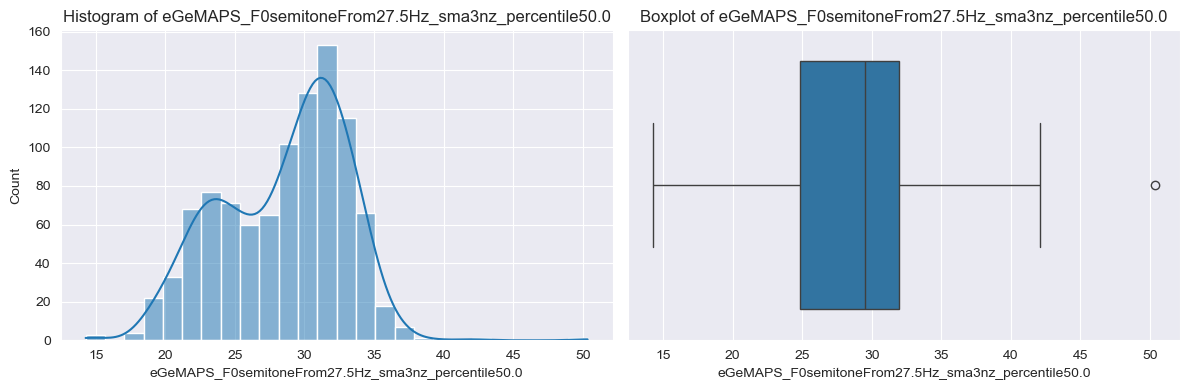

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile50.0_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile50.0': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile50.0
697         979                                          50.346195 



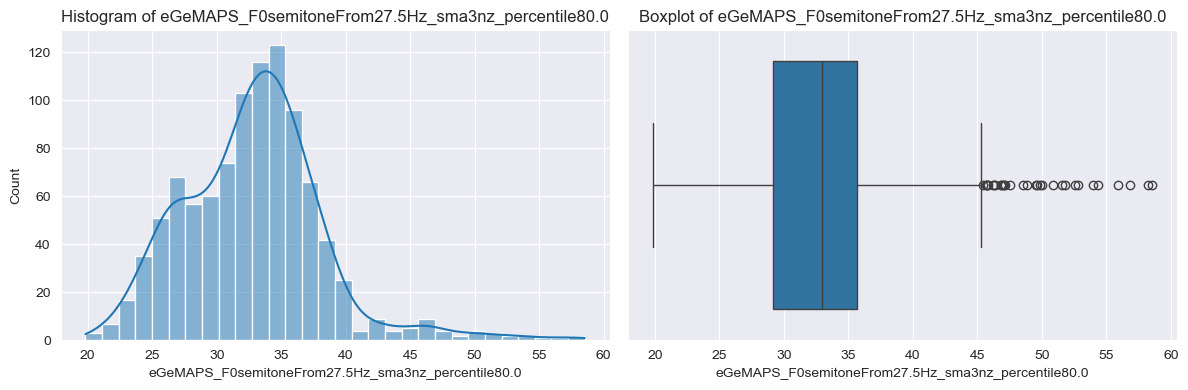

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile80.0_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile80.0': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_percentile80.0
6            54                                          45.776306 
25          103                                          46.987144 
27          105                                          52.791611 
29          109                                          58.258514 
90          198                                          49.609974 
190         335                                          48.552349 
260         421                                          45.461792 
292         464                                          54.380440 
415         619                                          48.864140 
466         679                                          51.

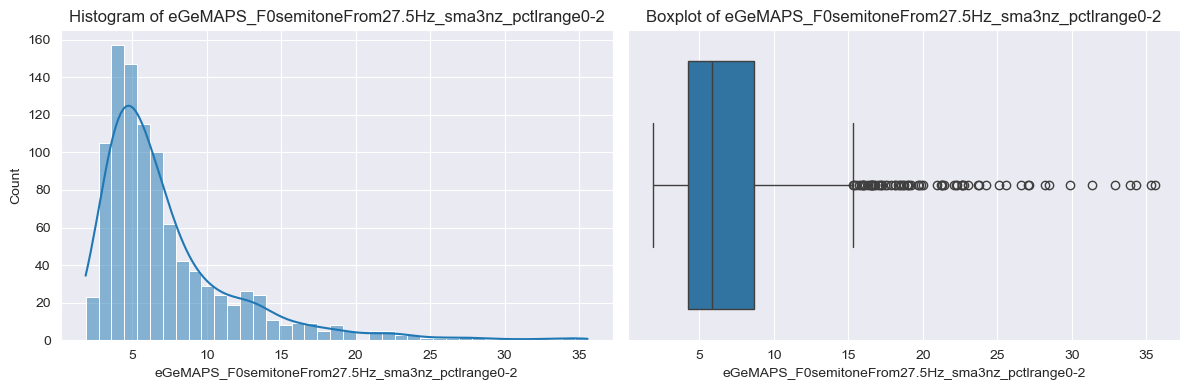

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2
5            50                                         27.108828
25          103                                         28.502310
27          105                                         32.885078
29          109                                         35.581688
32          112                                         21.211815
..          ...                                               ...
957        1319                                         21.263762
969        1336                                         16.008974
970        1339                                         15.740368
986        1359                                         16.114492
989        1363   

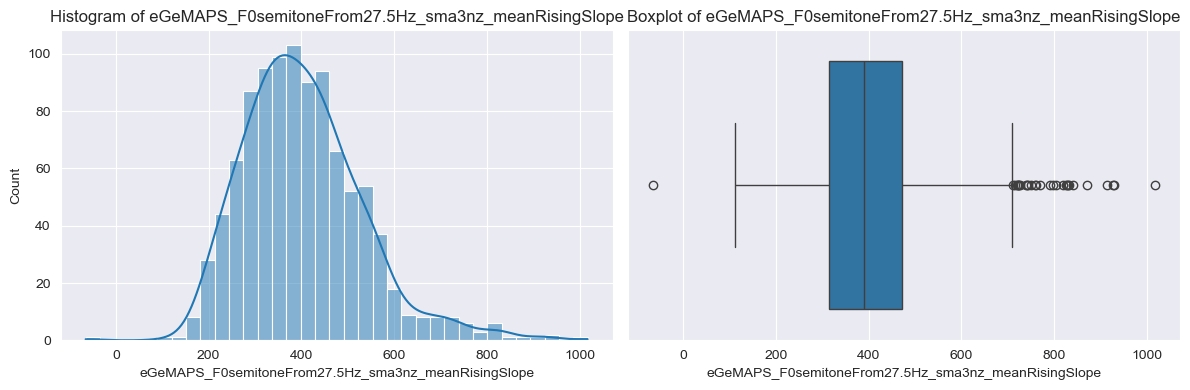

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope
27          105                                        1016.991821  
80          184                                         797.698364  
93          201                                         802.924683  
157         284                                         790.502502  
185         327                                         721.472473  
225         376                                         740.261963  
270         433                                         839.585022  
276         441                                         727.119141  
302         474                                         -65.204811  
331         507                                 

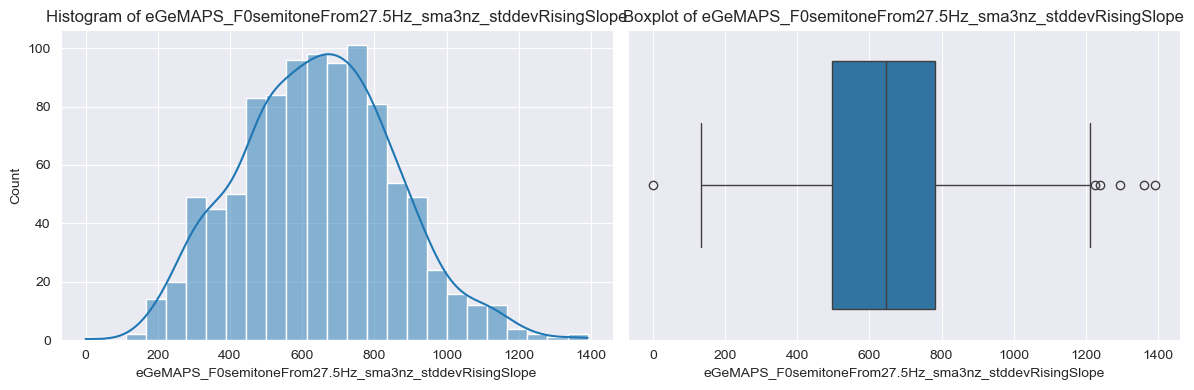

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope
27          105                                        1361.825806    
157         284                                        1238.223877    
302         474                                           0.000000    
481         698                                        1226.084839    
807        1117                                        1293.908936    
880        1216                                        1390.992798    



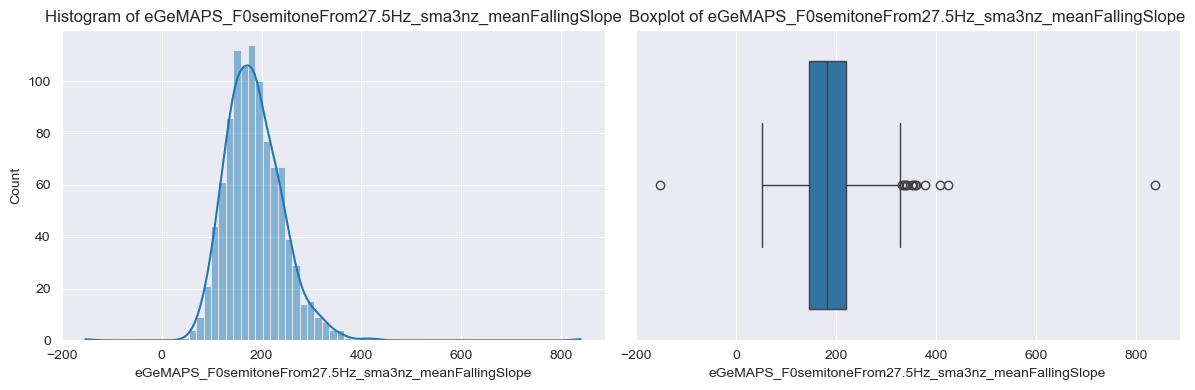

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope
74          174                                         354.731995   
302         474                                        -152.876602   
323         499                                         335.657440   
426         632                                         331.561157   
557         791                                         407.232605   
758        1052                                         342.093689   
803        1113                                         335.989716   
844        1170                                         838.850769   
885        1222                                         360.612457   
889        1228                     

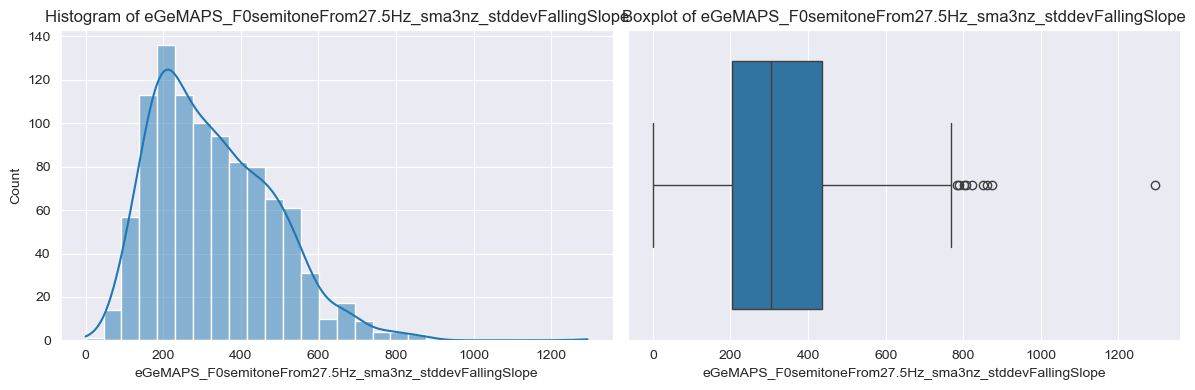

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_distribution.png
outliers in 'eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope': 
     Subject_ID  eGeMAPS_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope
74          174                                         801.906311     
441         651                                         805.918823     
557         791                                         851.326050     
627         888                                         822.164185     
643         908                                         789.357117     
726        1014                                         784.766907     
758        1052                                         872.798157     
844        1170                                        1293.912720     
930        1284                                         859.983887     



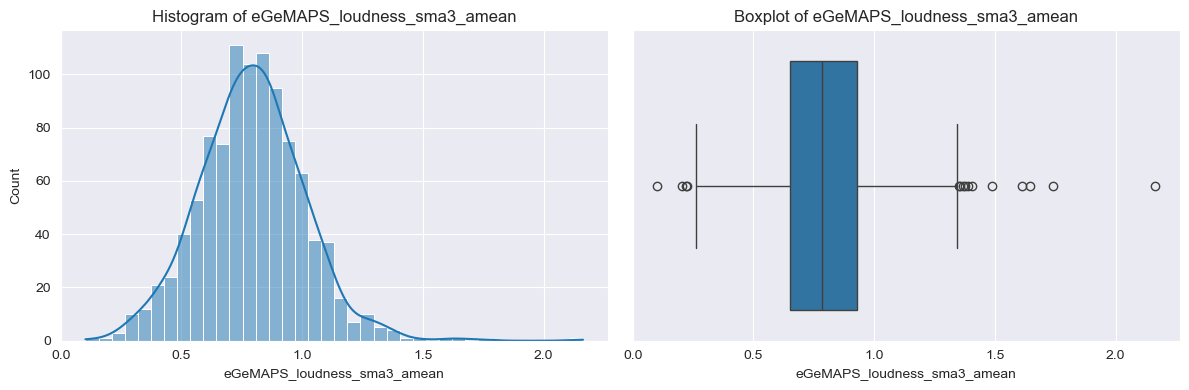

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_amean_distribution.png
outliers in 'eGeMAPS_loudness_sma3_amean': 
     Subject_ID  eGeMAPS_loudness_sma3_amean
33          115                     1.611732
113         224                     1.742568
259         420                     1.375269
285         451                     1.367593
302         474                     0.102682
309         484                     0.225945
356         543                     1.645917
439         649                     1.405414
536         769                     2.163495
847        1175                     1.349444
885        1222                     0.205717
886        1223                     1.354103
898        1239                     1.489405
941        1298                     0.218930
958        1320                     1.390188



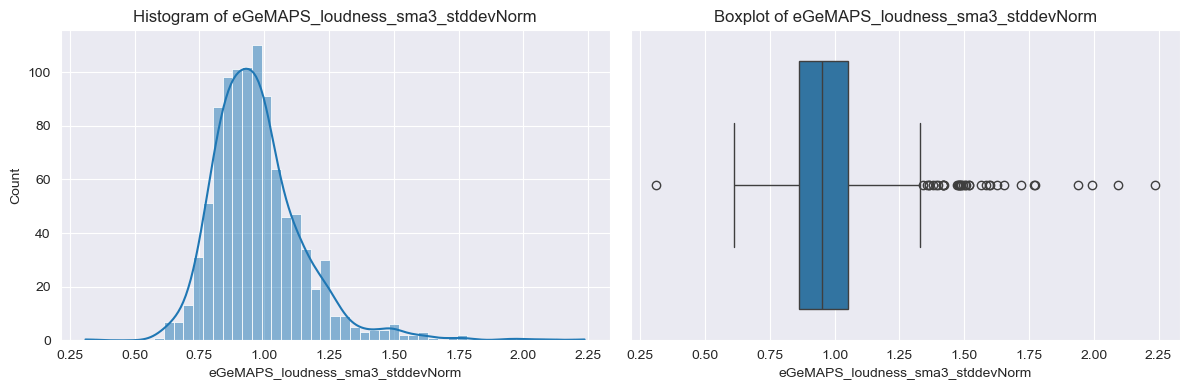

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_loudness_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_loudness_sma3_stddevNorm
100         208                          1.341641
211         361                          1.596998
236         389                          1.585120
309         484                          1.489025
316         492                          1.417855
323         499                          1.363078
324         500                          1.487840
331         507                          1.718642
384         583                          1.419844
427         633                          1.478755
471         684                          1.397585
505         732                          1.505817
538         771                          1.476622
540         773                          1.423795
543         776           

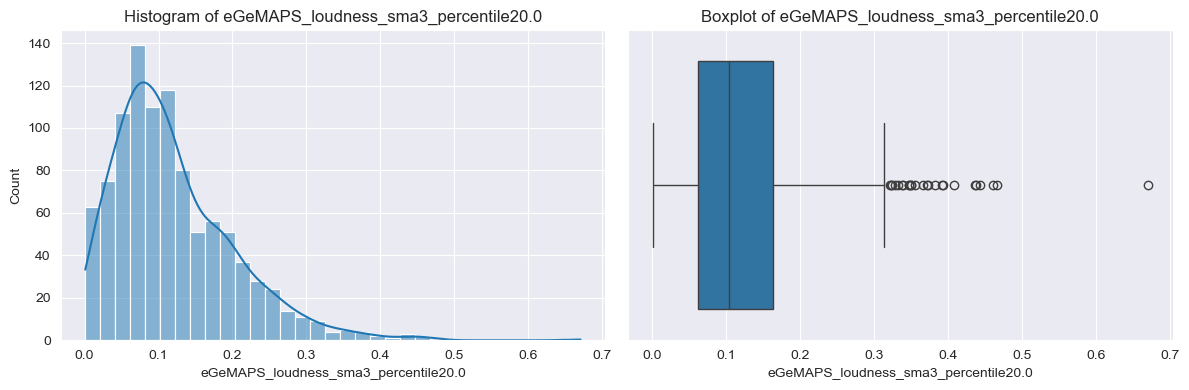

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_percentile20.0_distribution.png
outliers in 'eGeMAPS_loudness_sma3_percentile20.0': 
     Subject_ID  eGeMAPS_loudness_sma3_percentile20.0
73          173                              0.339455
201         347                              0.322973
292         464                              0.436839
356         543                              0.407946
454         666                              0.467050
516         745                              0.443599
531         764                              0.347260
532         765                              0.328514
536         769                              0.670446
559         794                              0.371493
578         822                              0.355782
611         863                              0.350464
615         868                              0.332604
693         

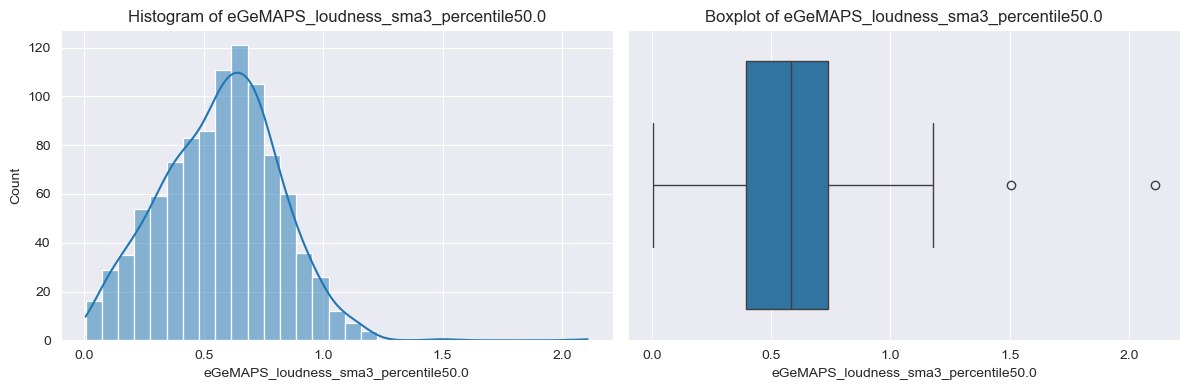

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_percentile50.0_distribution.png
outliers in 'eGeMAPS_loudness_sma3_percentile50.0': 
     Subject_ID  eGeMAPS_loudness_sma3_percentile50.0
356         543                              1.505807
536         769                              2.107699



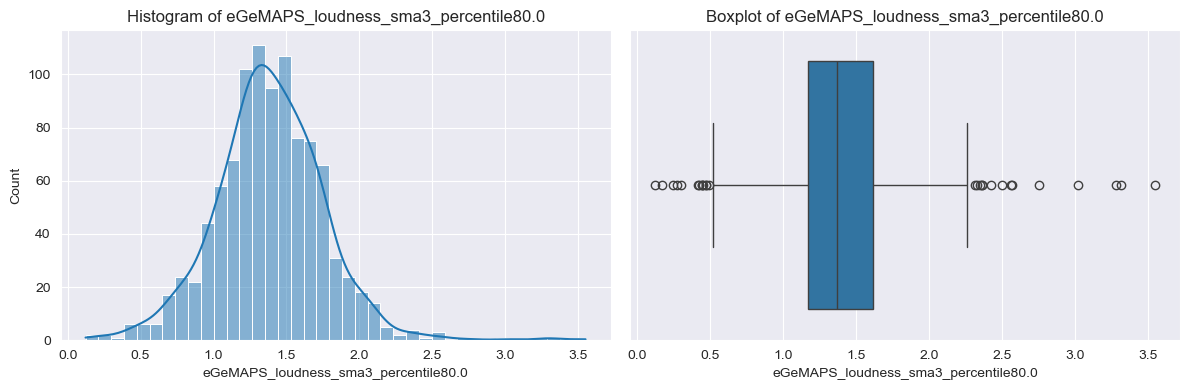

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_percentile80.0_distribution.png
outliers in 'eGeMAPS_loudness_sma3_percentile80.0': 
     Subject_ID  eGeMAPS_loudness_sma3_percentile80.0
33          115                              3.281831
103         211                              0.491538
113         224                              3.313604
259         420                              2.317702
274         438                              0.415434
285         451                              2.500822
302         474                              0.122986
309         484                              0.300788
356         543                              2.755757
364         554                              2.327334
409         612                              2.560594
439         649                              2.428425
536         769                              3.549776
628         

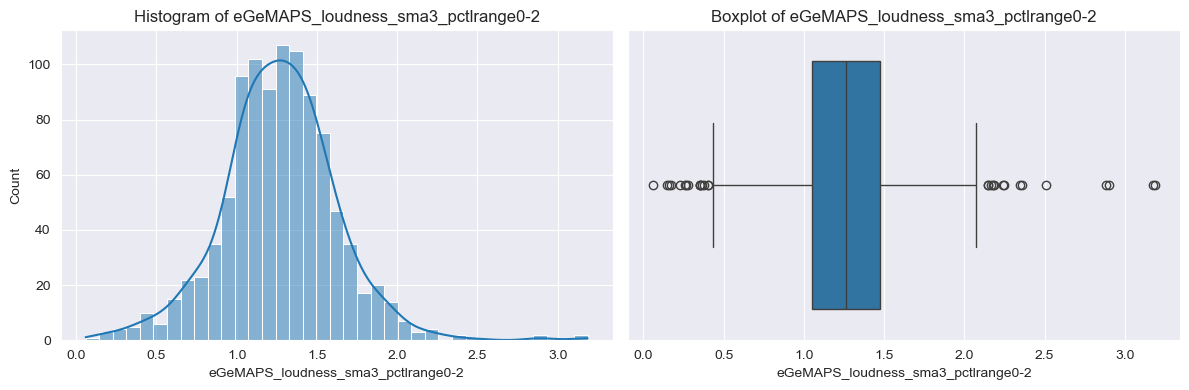

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_pctlrange0-2_distribution.png
outliers in 'eGeMAPS_loudness_sma3_pctlrange0-2': 
     Subject_ID  eGeMAPS_loudness_sma3_pctlrange0-2
33          115                            3.175377
89          197                            0.354513
103         211                            0.375136
113         224                            3.186709
259         420                            2.186962
274         438                            0.351563
285         451                            2.357595
302         474                            0.058776
309         484                            0.259557
356         543                            2.347811
364         554                            2.145123
409         612                            2.506847
439         649                            2.241060
536         769                            2

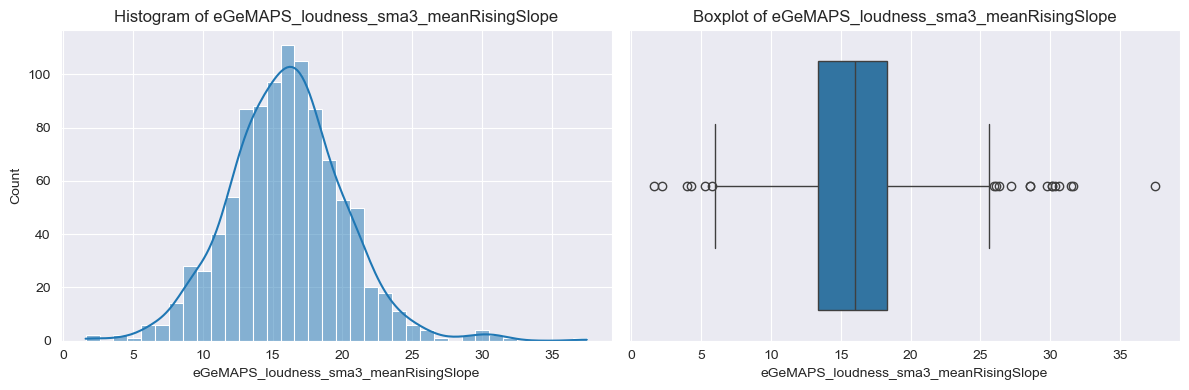

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_meanRisingSlope_distribution.png
outliers in 'eGeMAPS_loudness_sma3_meanRisingSlope': 
     Subject_ID  eGeMAPS_loudness_sma3_meanRisingSlope
33          115                              30.332123
39          127                              25.952938
113         224                              30.650164
219         369                              31.635456
259         420                              30.160725
274         438                               3.962682
302         474                               1.596609
356         543                              28.554556
409         612                              30.126987
536         769                              37.505127
628         889                               4.255565
629         890                               5.263656
686         964                              26.347

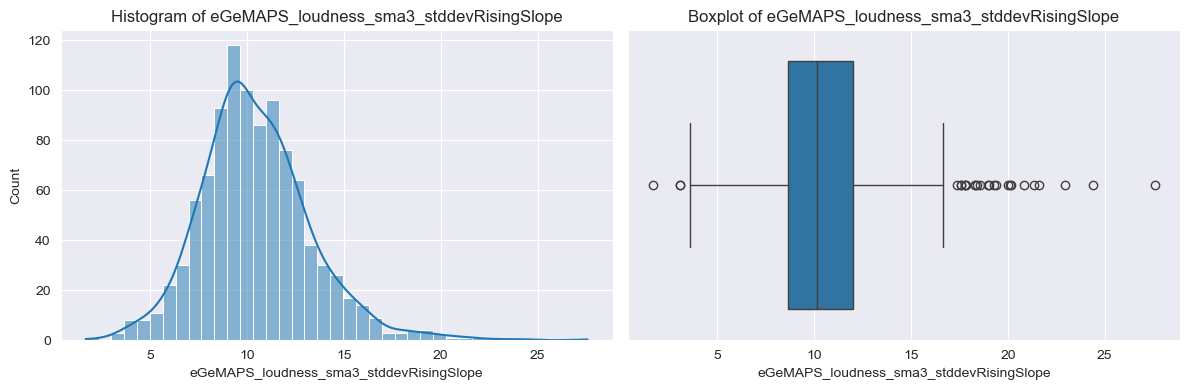

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_stddevRisingSlope_distribution.png
outliers in 'eGeMAPS_loudness_sma3_stddevRisingSlope': 
     Subject_ID  eGeMAPS_loudness_sma3_stddevRisingSlope
29          109                                20.841854
74          174                                19.999334
113         224                                18.326458
184         326                                17.372612
219         369                                21.366541
236         389                                20.112713
259         420                                17.835995
274         438                                 3.097344
302         474                                 1.679232
463         676                                18.391569
536         769                                21.610466
554         788                                17.799242
578         822      

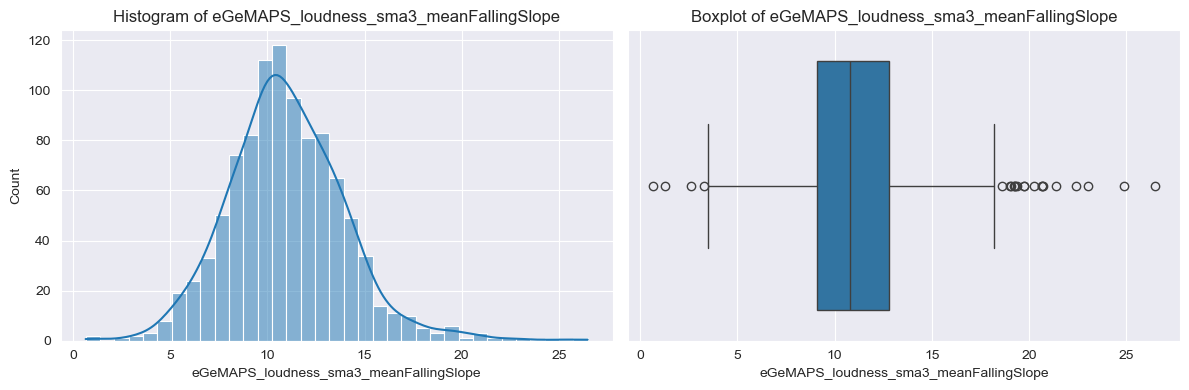

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_meanFallingSlope_distribution.png
outliers in 'eGeMAPS_loudness_sma3_meanFallingSlope': 
     Subject_ID  eGeMAPS_loudness_sma3_meanFallingSlope
33          115                               20.678331
39          127                               19.739786
79          183                               19.270508
105         214                               19.090445
113         224                               24.895327
219         369                               19.223349
259         420                               19.009014
274         438                                2.618252
276         441                               20.680367
285         451                               18.613230
302         474                                1.292578
356         543                               22.416521
409         612                     

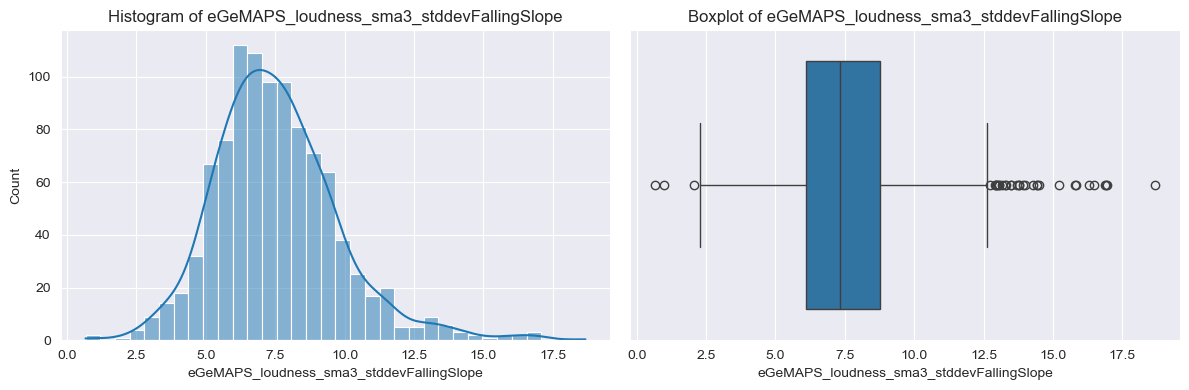

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudness_sma3_stddevFallingSlope_distribution.png
outliers in 'eGeMAPS_loudness_sma3_stddevFallingSlope': 
     Subject_ID  eGeMAPS_loudness_sma3_stddevFallingSlope
6            54                                 13.067906
27          105                                 13.486665
33          115                                 13.762917
39          127                                 12.946121
79          183                                 16.930557
113         224                                 16.965992
140         263                                 13.498029
219         369                                 13.724490
236         389                                 14.435512
262         424                                 12.743475
274         438                                  2.073709
276         441                                 12.939855
302   

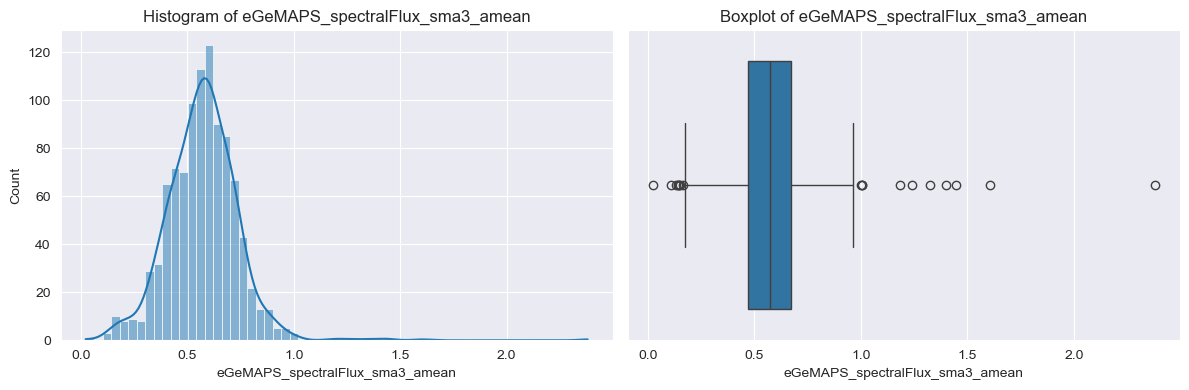

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_spectralFlux_sma3_amean_distribution.png
outliers in 'eGeMAPS_spectralFlux_sma3_amean': 
     Subject_ID  eGeMAPS_spectralFlux_sma3_amean
33          115                         1.182207
103         211                         0.163381
113         224                         1.605368
274         438                         0.106227
302         474                         0.022857
409         612                         1.400762
430         638                         0.148638
439         649                         1.444448
536         769                         2.380942
561         797                         0.139805
628         889                         0.130816
762        1056                         1.237761
774        1071                         0.143000
779        1079                         0.147696
821        1136                         1.0

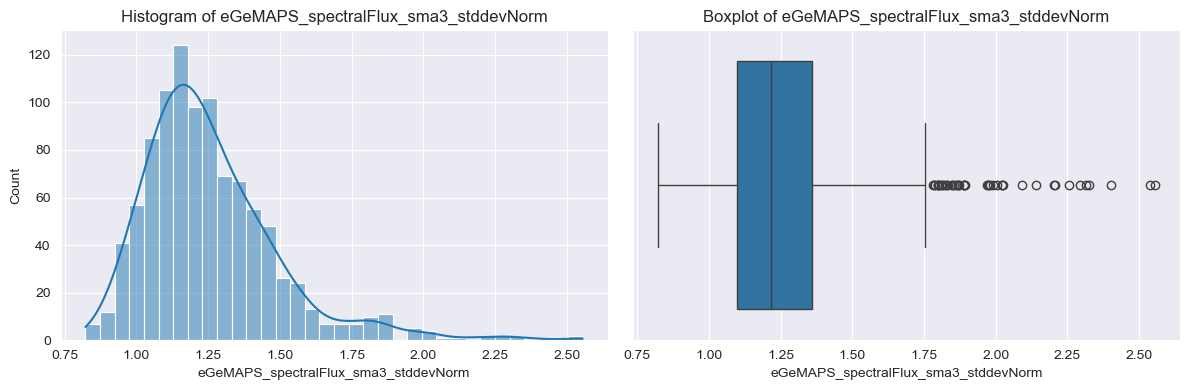

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_spectralFlux_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_spectralFlux_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_spectralFlux_sma3_stddevNorm
54          143                              1.991435
68          163                              1.790231
74          174                              1.812203
90          198                              2.026540
121         234                              1.782790
145         269                              1.799541
211         361                              2.139411
236         389                              2.256703
262         424                              1.797378
308         483                              1.803628
309         484                              2.403550
316         492                              1.862905
323         499                              1.848779
326         

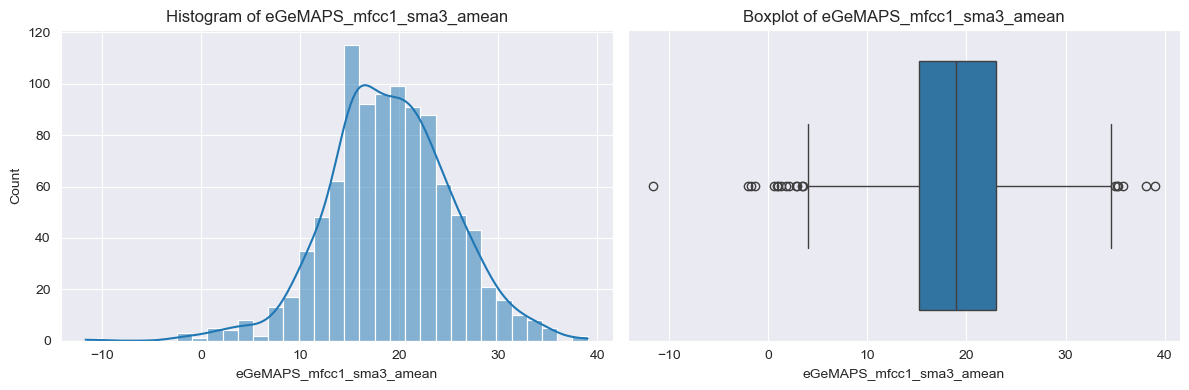

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc1_sma3_amean_distribution.png
outliers in 'eGeMAPS_mfcc1_sma3_amean': 
     Subject_ID  eGeMAPS_mfcc1_sma3_amean
6            54                  0.534719
29          109                 -2.073676
65          158                 38.085266
126         243                  2.801985
159         289                 35.256107
276         441                  3.499950
292         464                  0.948578
345         530                 35.221268
356         543                  1.233204
365         557                 35.797215
567         805                 34.994827
693         971                  3.351521
697         979                -11.677414
712        1000                 -1.803410
777        1074                 39.028481
779        1079                  2.082797
844        1170                  2.905841
851        1180                  0.8

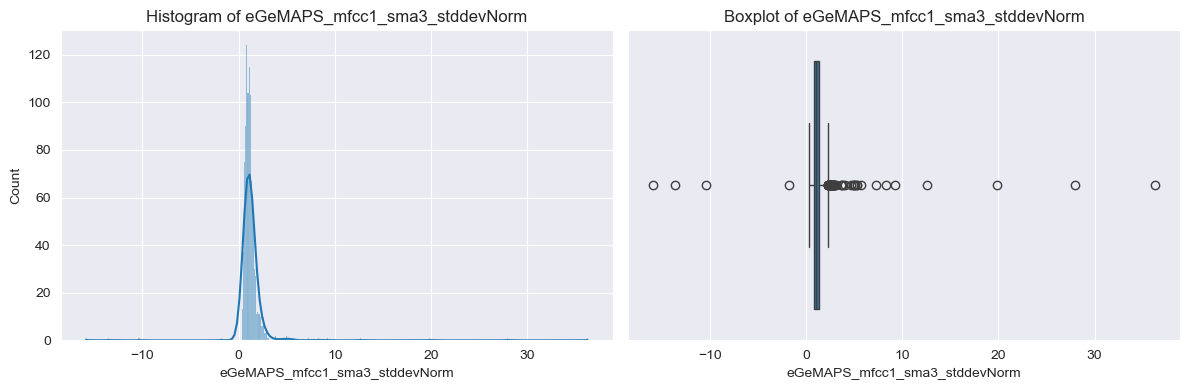

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc1_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc1_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc1_sma3_stddevNorm
6            54                      36.272385
9            61                       2.335423
12           85                       5.303241
19           93                       2.357203
27          105                       3.681374
28          107                       4.669338
29          109                     -10.339704
46          135                       2.685558
79          183                       4.990760
80          184                       2.944495
126         243                       8.298864
195         341                       2.814771
216         366                       2.521121
219         369                       2.544306
224         375                       2.630777
225         376               

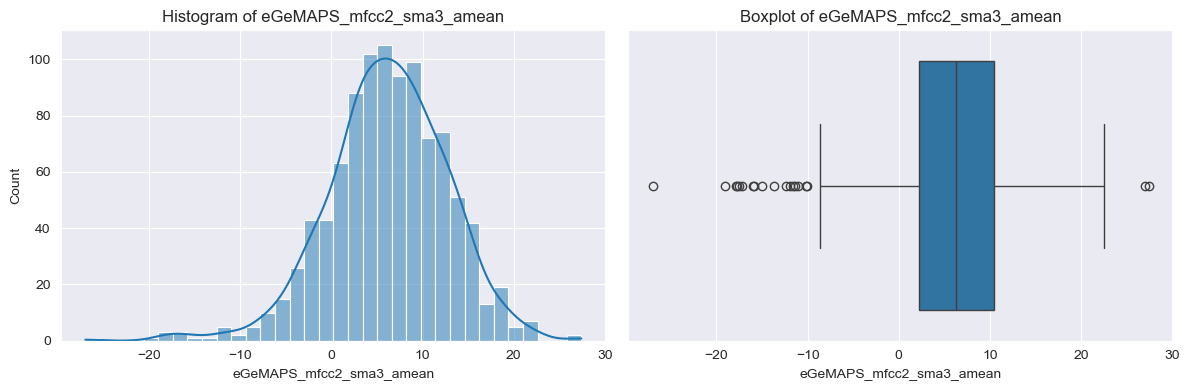

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc2_sma3_amean_distribution.png
outliers in 'eGeMAPS_mfcc2_sma3_amean': 
     Subject_ID  eGeMAPS_mfcc2_sma3_amean
25          103                -16.013048
190         335                -10.192126
292         464                -17.540571
365         557                -17.882805
464         677                -17.701611
529         762                -11.875119
540         773                -15.036167
618         873                -13.704013
620         875                -12.320634
629         890                 27.436245
654         920                -11.431334
674         947                -10.106071
696         975                -15.836496
764        1058                -17.209110
779        1079                -19.068903
795        1100                 27.089958
854        1186                -11.025085
957        1319                -27.0

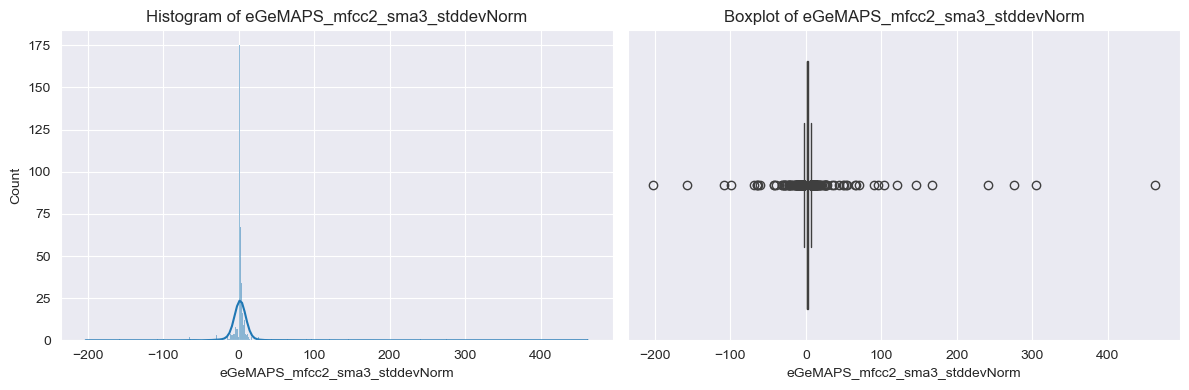

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc2_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc2_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc2_sma3_stddevNorm
2            44                      -4.482043
5            50                      13.598771
6            54                     -22.129536
12           85                       7.052762
29          109                      -4.098841
..          ...                            ...
978        1350                      64.760597
979        1351                     -21.853390
981        1354                      -2.657389
988        1362                       8.743472
994        1370                      -3.887253

[230 rows x 2 columns]



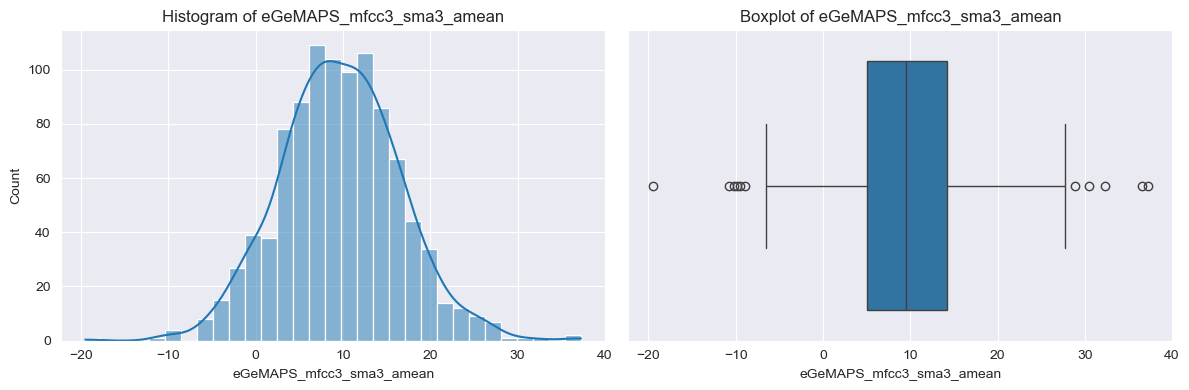

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc3_sma3_amean_distribution.png
outliers in 'eGeMAPS_mfcc3_sma3_amean': 
     Subject_ID  eGeMAPS_mfcc3_sma3_amean
135         257                 28.879503
211         361                 -8.895202
330         506                 32.361515
439         649                -19.529551
451         663                 36.525013
493         714                -10.211708
619         874                 37.272186
642         906                 30.447968
920        1271                -10.756600
936        1292                 -9.844881
976        1348                 -9.507018



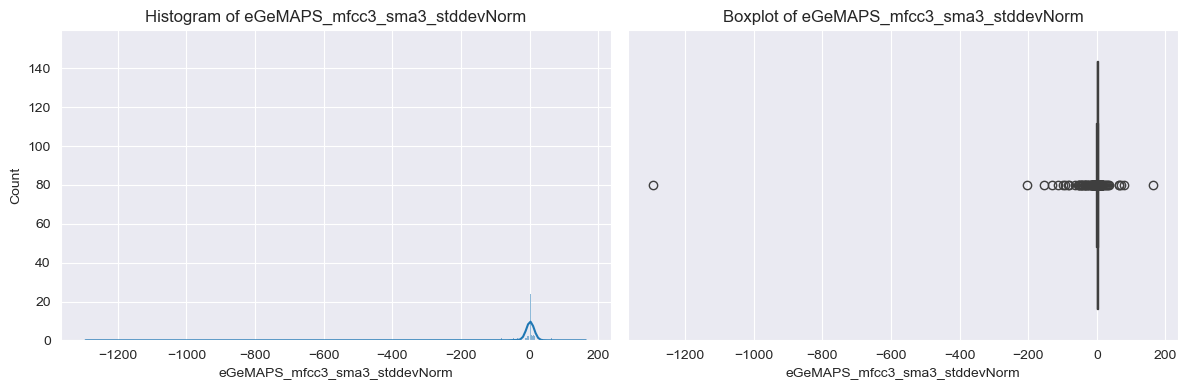

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc3_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc3_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc3_sma3_stddevNorm
6            54                      27.958202
9            61                       6.641862
10           83                       4.786030
19           93                      11.630100
23          101                       6.137431
..          ...                            ...
977        1349                      12.898285
978        1350                      30.773176
988        1362                       6.485859
989        1363                      -6.110910
993        1369                       7.829189

[188 rows x 2 columns]



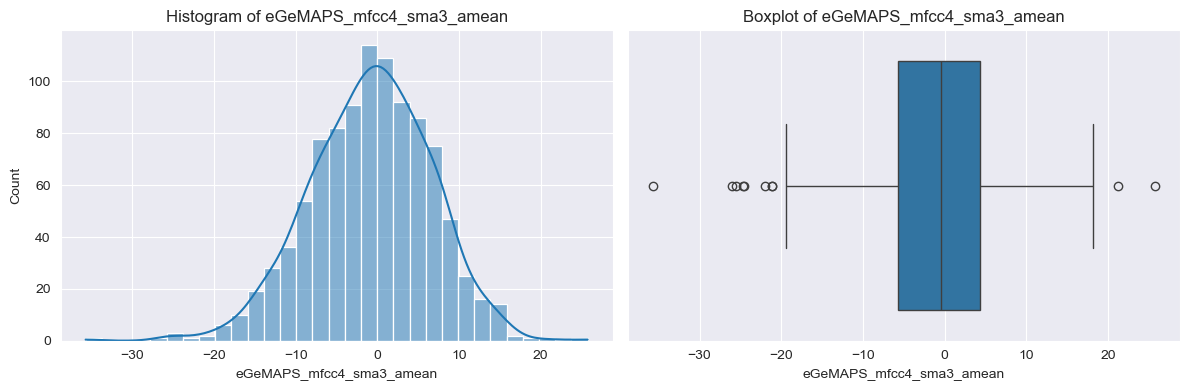

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc4_sma3_amean_distribution.png
outliers in 'eGeMAPS_mfcc4_sma3_amean': 
     Subject_ID  eGeMAPS_mfcc4_sma3_amean
239         393                 25.739159
244         399                -21.185966
292         464                -22.026237
345         530                 21.220379
451         663                -25.547672
590         838                -25.969017
652         918                -24.716045
818        1133                -35.713245
868        1202                -21.189878
924        1277                -24.605900



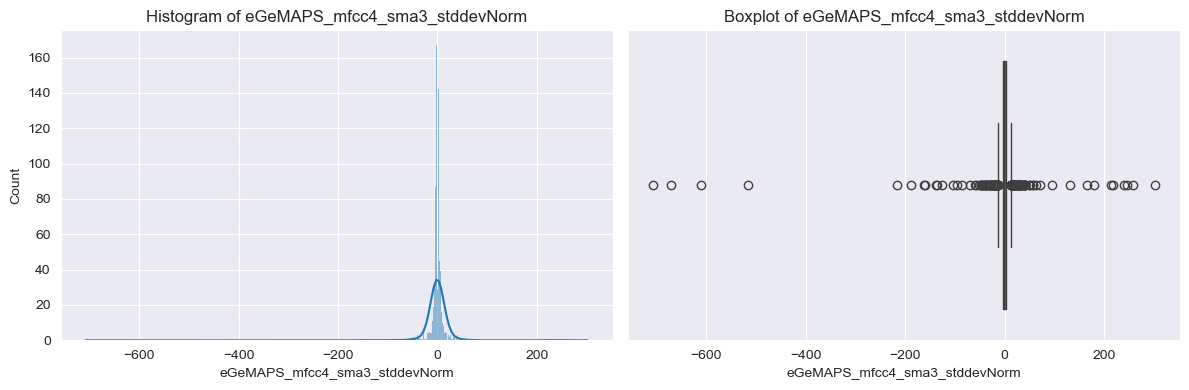

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc4_sma3_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc4_sma3_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc4_sma3_stddevNorm
4            49                      49.911617
5            50                      39.066586
15           89                     -44.550144
16           90                     -85.920601
29          109                      37.467293
..          ...                            ...
946        1308                     -17.504515
963        1327                     -19.379469
974        1346                     -15.747245
988        1362                     132.091324
990        1365                     -13.850321

[139 rows x 2 columns]



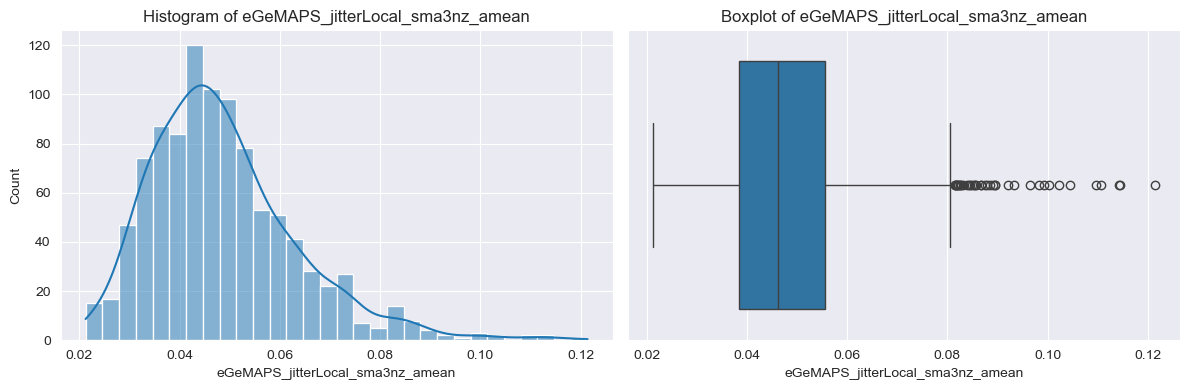

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_jitterLocal_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_jitterLocal_sma3nz_amean': 
     Subject_ID  eGeMAPS_jitterLocal_sma3nz_amean
5            50                          0.085801
25          103                          0.086726
46          135                          0.084994
156         283                          0.083138
189         331                          0.086800
233         386                          0.089099
273         437                          0.089582
277         443                          0.100186
309         484                          0.104393
324         500                          0.084230
369         562                          0.082575
376         575                          0.098251
428         636                          0.084486
431         640                          0.114409
447         659           

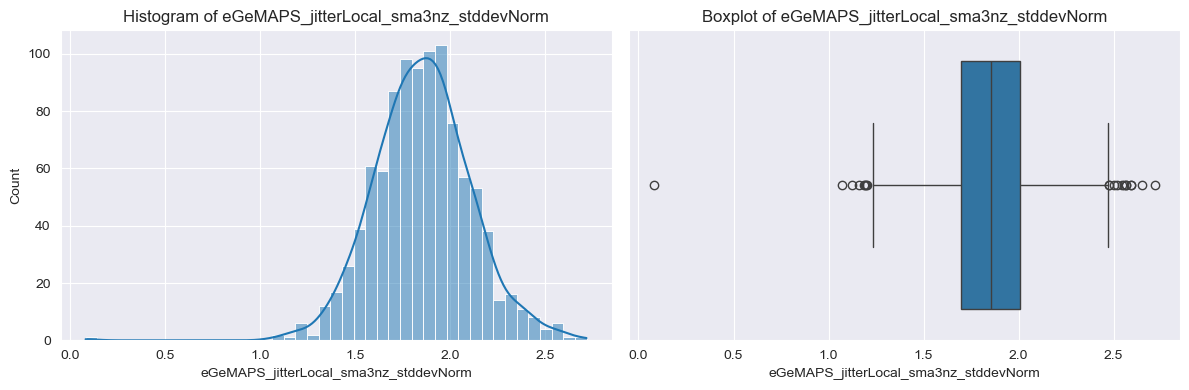

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_jitterLocal_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_jitterLocal_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_jitterLocal_sma3nz_stddevNorm
20           97                               2.565284
29          109                               1.121279
39          127                               2.716956
72          172                               2.501191
123         239                               2.473875
155         282                               2.592834
279         445                               2.544149
292         464                               1.195360
302         474                               0.081698
309         484                               1.187693
359         548                               2.564516
472         688                               2.475152
684         962                               2.518

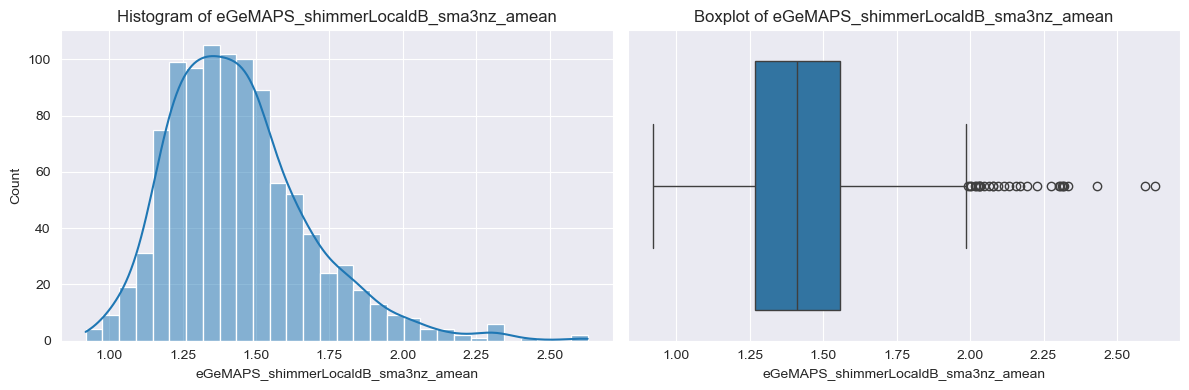

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_shimmerLocaldB_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_shimmerLocaldB_sma3nz_amean': 
     Subject_ID  eGeMAPS_shimmerLocaldB_sma3nz_amean
5            50                             2.311334
25          103                             2.192045
42          130                             2.116423
44          133                             2.096331
105         214                             2.169999
225         376                             2.027243
236         389                             2.065399
273         437                             2.320454
309         484                             2.314804
324         500                             2.307261
369         562                             2.077678
431         640                             2.035122
494         717                             2.016125
562         799             

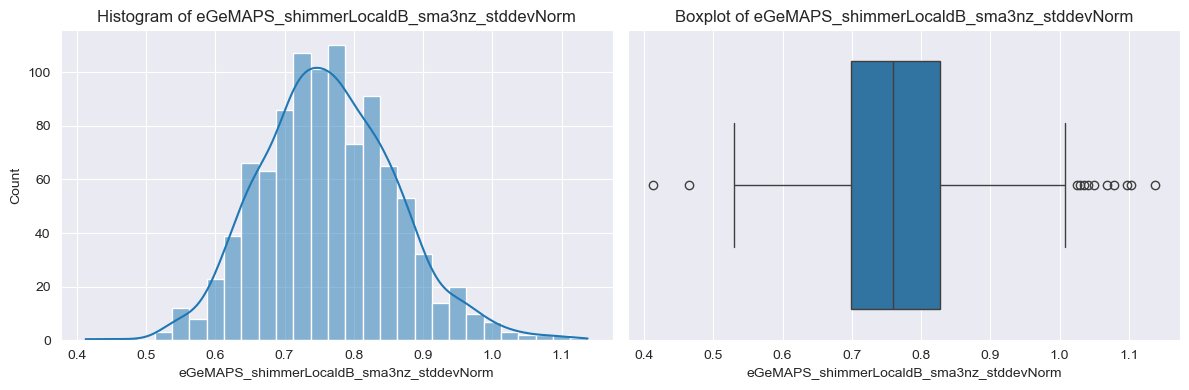

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_shimmerLocaldB_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_shimmerLocaldB_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_shimmerLocaldB_sma3nz_stddevNorm
62          153                                  1.102899
279         445                                  1.068504
285         451                                  1.079406
292         464                                  0.464902
489         709                                  1.040838
493         714                                  1.050070
503         728                                  1.137767
577         821                                  1.025703
613         866                                  1.097185
697         979                                  0.412706
768        1062                                  1.029068
823        1139                                  1.035404



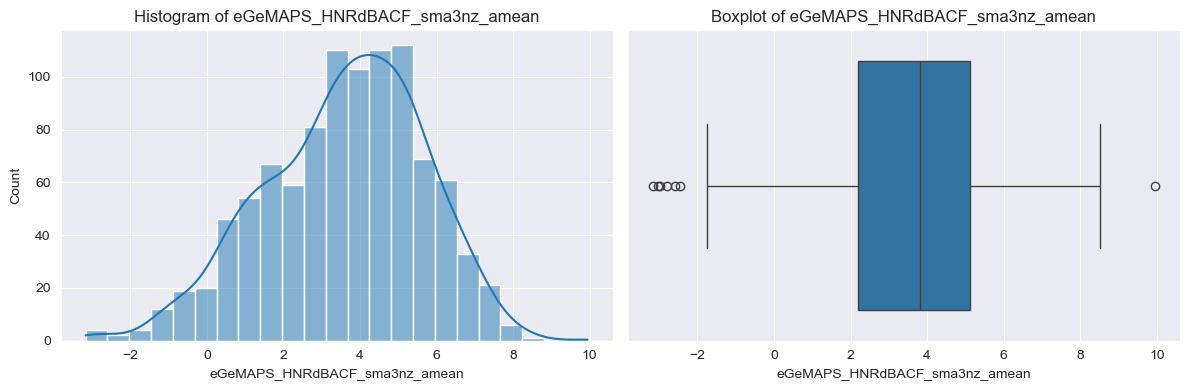

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_HNRdBACF_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_HNRdBACF_sma3nz_amean': 
     Subject_ID  eGeMAPS_HNRdBACF_sma3nz_amean
29          109                      -2.991388
428         636                      -2.592975
488         707                       9.947726
697         979                      -3.018644
781        1082                      -3.165246
844        1170                      -2.786203
885        1222                      -2.450783



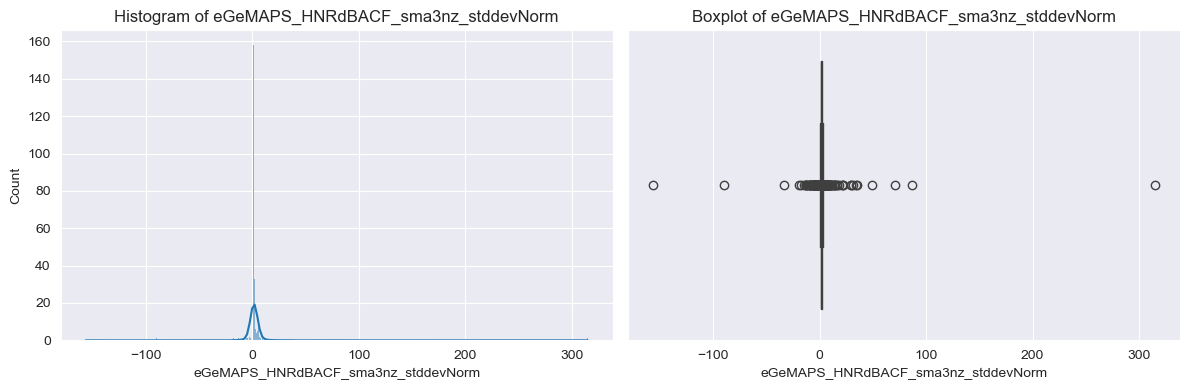

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_HNRdBACF_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_HNRdBACF_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_HNRdBACF_sma3nz_stddevNorm
2            44                            3.443382
5            50                           -4.409953
8            59                            4.114325
9            61                            4.755831
25          103                          -13.010805
..          ...                                 ...
979        1351                            3.323872
985        1358                            5.225272
986        1359                            4.231055
989        1363                           22.375807
994        1370                           -5.713782

[170 rows x 2 columns]



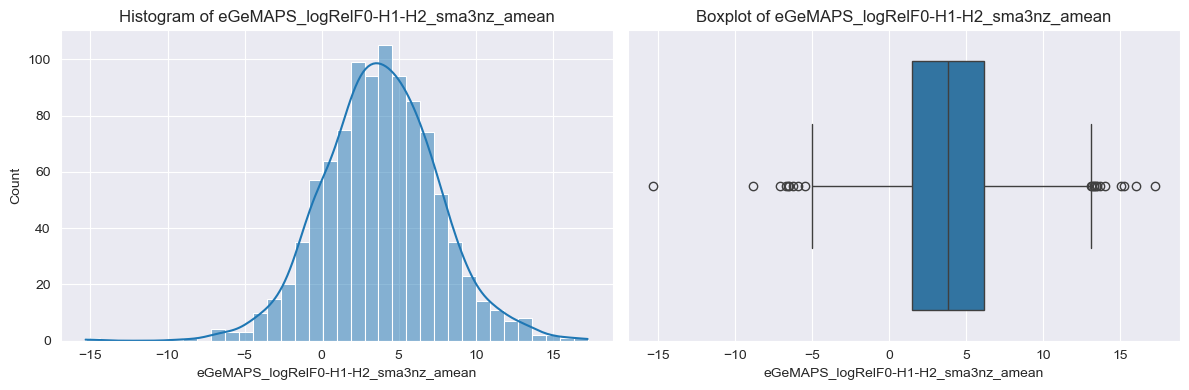

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_logRelF0-H1-H2_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_logRelF0-H1-H2_sma3nz_amean': 
     Subject_ID  eGeMAPS_logRelF0-H1-H2_sma3nz_amean
32          112                            17.262037
52          141                            13.705772
67          162                            -5.925557
112         222                            15.279496
116         228                            -5.448167
168         300                            13.446212
170         303                            15.073065
202         348                            -6.497337
208         358                            -6.570353
239         393                            13.144936
317         493                            14.012730
318         494                            16.061251
357         545                            13.506819
369         562             

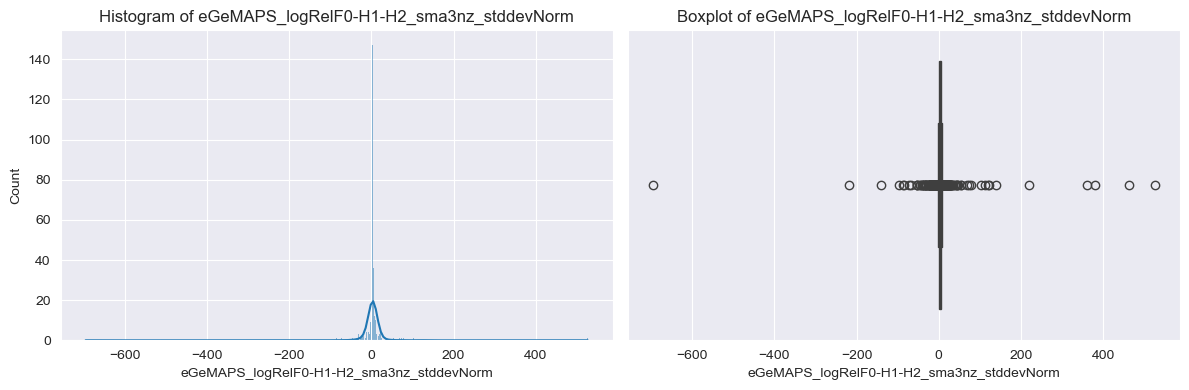

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_logRelF0-H1-H2_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_logRelF0-H1-H2_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_logRelF0-H1-H2_sma3nz_stddevNorm
0            41                                 -8.678885
8            59                                 -6.257208
18           92                                 -5.286854
25          103                               -218.222839
27          105                                 11.879924
..          ...                                       ...
972        1341                                -16.662622
976        1348                                -35.709057
977        1349                                 27.138130
978        1350                                -24.600798
989        1363                                -31.688528

[244 rows x 2 columns]



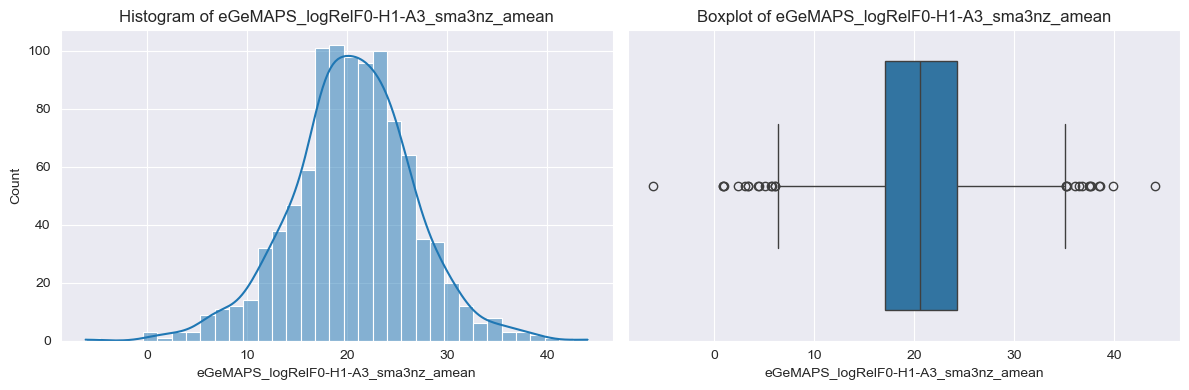

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_logRelF0-H1-A3_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_logRelF0-H1-A3_sma3nz_amean': 
     Subject_ID  eGeMAPS_logRelF0-H1-A3_sma3nz_amean
27          105                             4.342703
29          109                             1.006265
65          158                            44.048611
103         211                             5.651550
168         300                            36.459618
173         306                            38.438828
190         335                             0.850599
198         344                            37.547409
226         377                            37.668861
292         464                             0.878113
356         543                             3.038691
411         614                            38.529018
451         663                             6.088438
473         689             

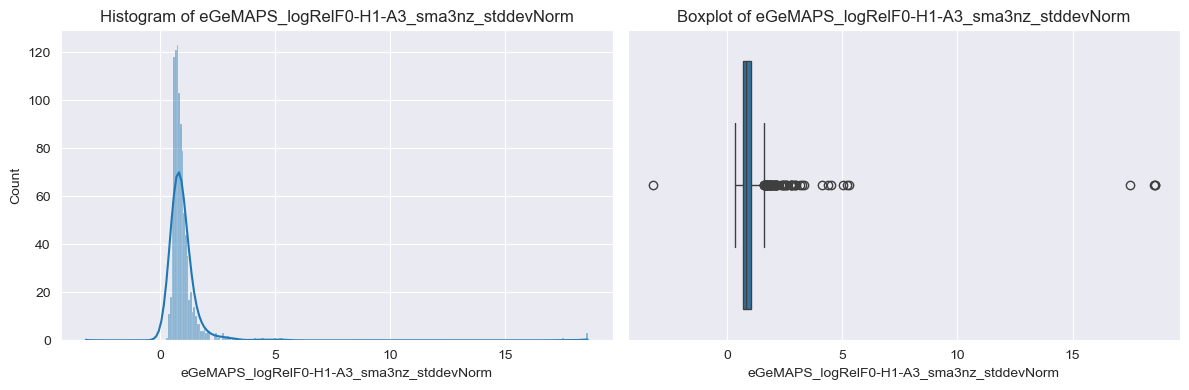

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_logRelF0-H1-A3_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_logRelF0-H1-A3_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_logRelF0-H1-A3_sma3nz_stddevNorm
5            50                                  1.719861
25          103                                  1.899112
27          105                                  5.294800
29          109                                 18.571964
79          183                                  1.855698
..          ...                                       ...
958        1320                                  1.910545
967        1332                                  5.205054
969        1336                                  1.904883
972        1341                                  1.800444
989        1363                                  5.041152

[70 rows x 2 columns]



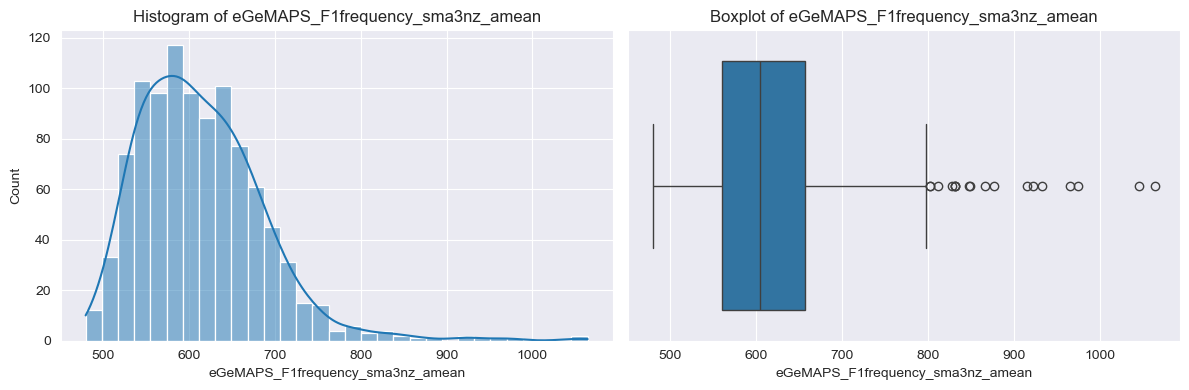

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F1frequency_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F1frequency_sma3nz_amean': 
     Subject_ID  eGeMAPS_F1frequency_sma3nz_amean
27          105                        974.519653
29          109                       1064.382324
105         214                        831.914124
292         464                        965.924805
423         628                        831.220886
428         636                        849.296509
464         677                        922.981323
495         719                        802.541809
512         741                        915.857300
601         851                        876.588806
697         979                       1046.019287
711         999                        812.315125
764        1058                        828.486328
768        1062                        866.117310
851        1180           

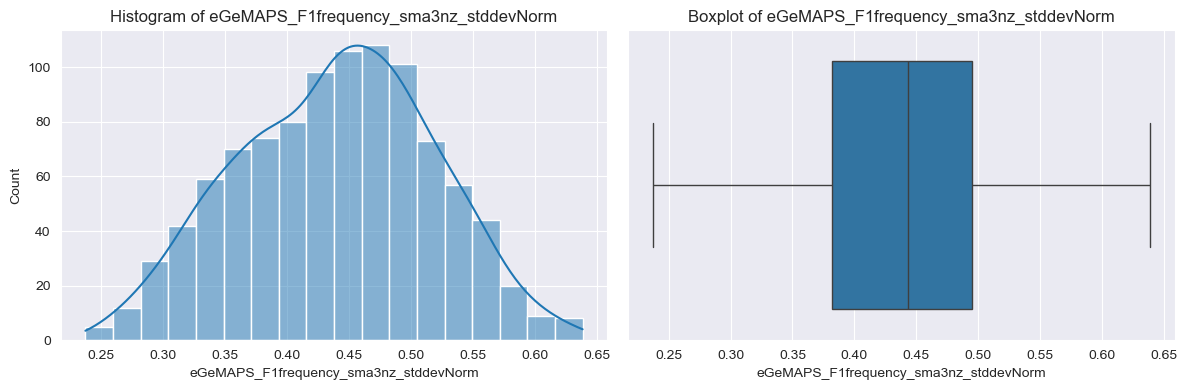

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F1frequency_sma3nz_stddevNorm_distribution.png


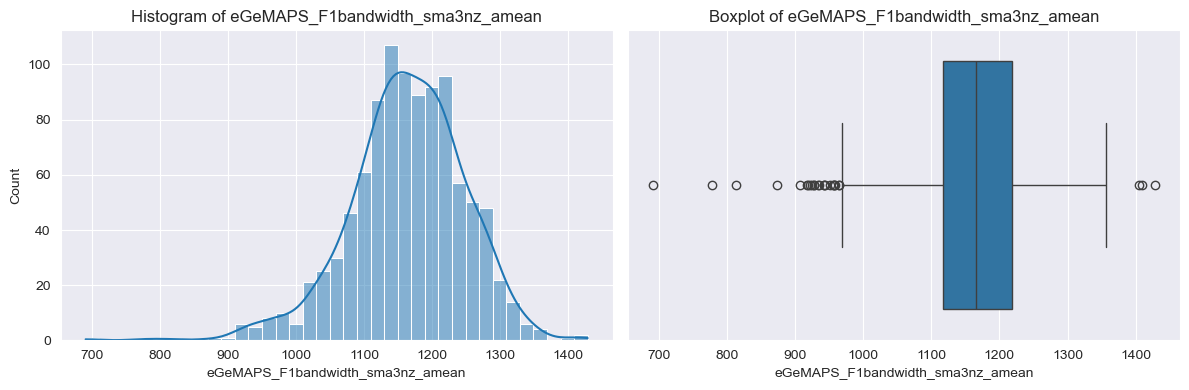

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F1bandwidth_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F1bandwidth_sma3nz_amean': 
     Subject_ID  eGeMAPS_F1bandwidth_sma3nz_amean
12           85                        935.725464
27          105                        921.745361
29          109                        813.013489
135         257                        964.352661
159         289                       1409.574585
198         344                       1428.263794
276         441                        906.676086
292         464                        778.609009
423         628                        958.431641
464         677                        956.518433
512         741                        916.957581
601         851                        963.982849
697         979                        691.208252
711         999                        944.469543
712        1000           

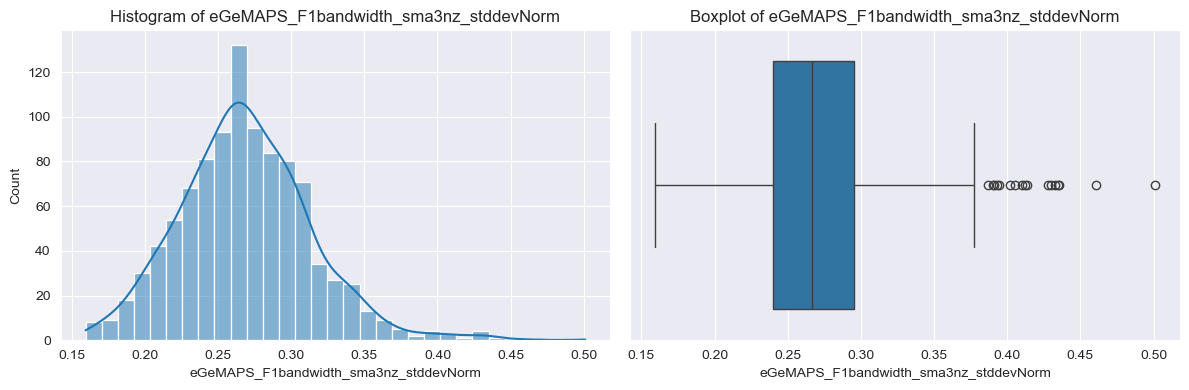

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F1bandwidth_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F1bandwidth_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F1bandwidth_sma3nz_stddevNorm
27          105                               0.394396
29          109                               0.434405
33          115                               0.392901
39          127                               0.390054
276         441                               0.411889
292         464                               0.432497
356         543                               0.428024
423         628                               0.410061
512         741                               0.401778
697         979                               0.501006
711         999                               0.386976
764        1058                               0.405030
851        1180                               0.391

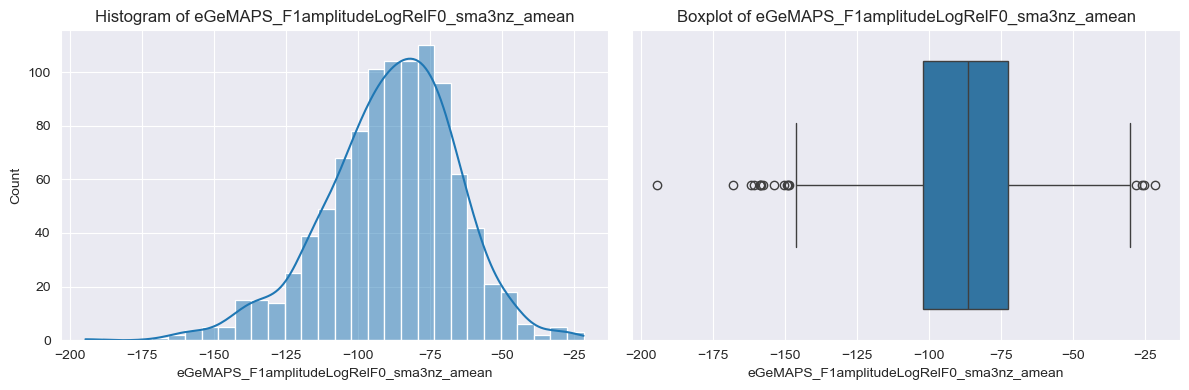

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F1amplitudeLogRelF0_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F1amplitudeLogRelF0_sma3nz_amean': 
     Subject_ID  eGeMAPS_F1amplitudeLogRelF0_sma3nz_amean
103         211                                -28.064484
211         361                               -158.646469
302         474                               -194.552765
441         651                               -149.537766
505         732                               -153.972733
632         893                               -148.591095
640         903                               -149.052063
690         968                                -25.293772
736        1024                                -26.160433
768        1062                                -21.585295
790        1095                               -157.836670
799        1105                               -150.372223
808   

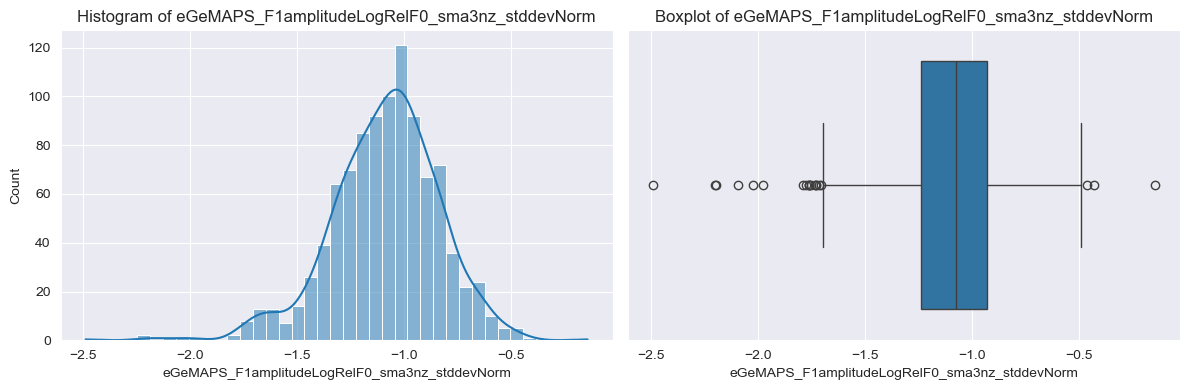

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F1amplitudeLogRelF0_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F1amplitudeLogRelF0_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F1amplitudeLogRelF0_sma3nz_stddevNorm
37          123                                      -2.089403
69          165                                      -1.760481
113         224                                      -1.703555
302         474                                      -0.143318
315         491                                      -1.787493
353         539                                      -2.193466
470         683                                      -1.747974
516         745                                      -1.713033
536         769                                      -1.758451
553         787                                      -1.773400
560         796                                      -1.7

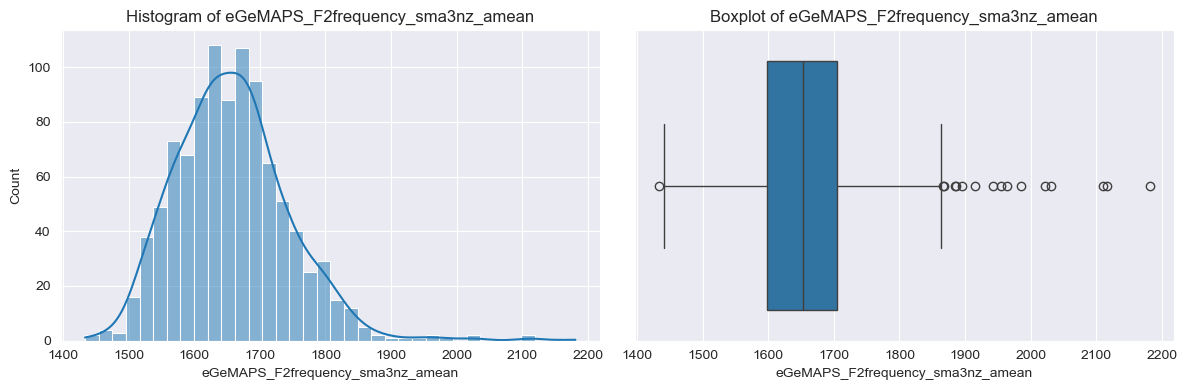

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F2frequency_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F2frequency_sma3nz_amean': 
     Subject_ID  eGeMAPS_F2frequency_sma3nz_amean
27          105                       2109.580811
29          109                       2115.815674
31          111                       1433.483276
207         357                       1867.311035
292         464                       2021.523682
420         625                       1885.141235
423         628                       1866.513306
428         636                       1942.167358
451         663                       1895.317383
464         677                       1954.572510
512         741                       1984.748901
601         851                       1964.378296
641         904                       1885.790039
697         979                       2181.250244
851        1180           

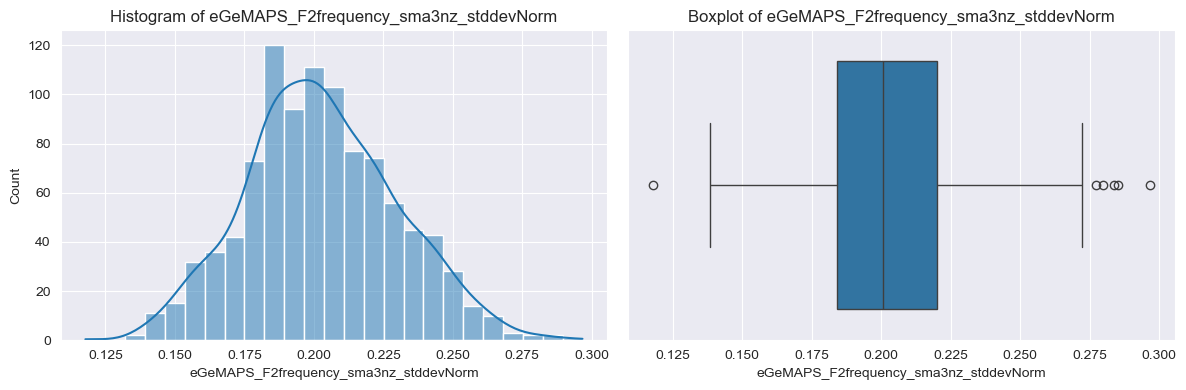

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F2frequency_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F2frequency_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F2frequency_sma3nz_stddevNorm
80          184                               0.283647
104         213                               0.296647
185         327                               0.279938
280         446                               0.285113
554         788                               0.277379
744        1036                               0.117824



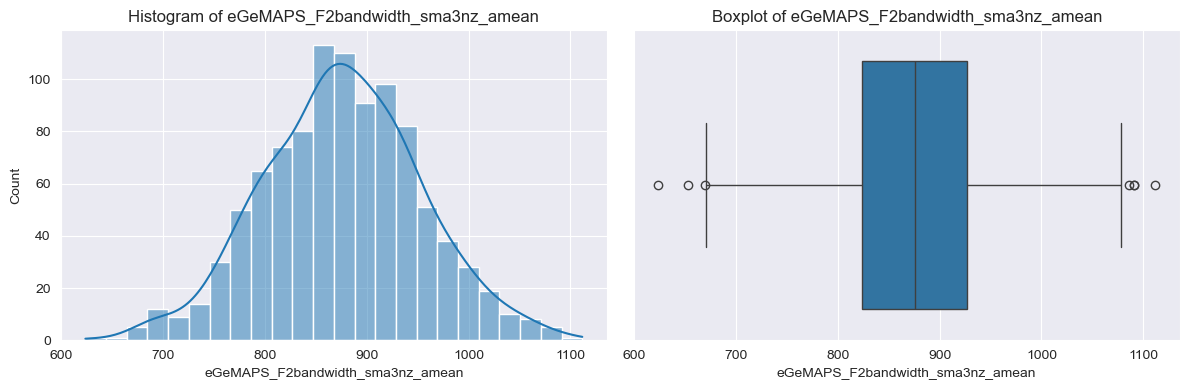

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F2bandwidth_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F2bandwidth_sma3nz_amean': 
     Subject_ID  eGeMAPS_F2bandwidth_sma3nz_amean
89          197                       1111.588013
126         243                        669.640808
439         649                       1090.414673
451         663                        623.933228
564         801                       1091.045654
916        1264                       1086.168213
967        1332                        652.921997



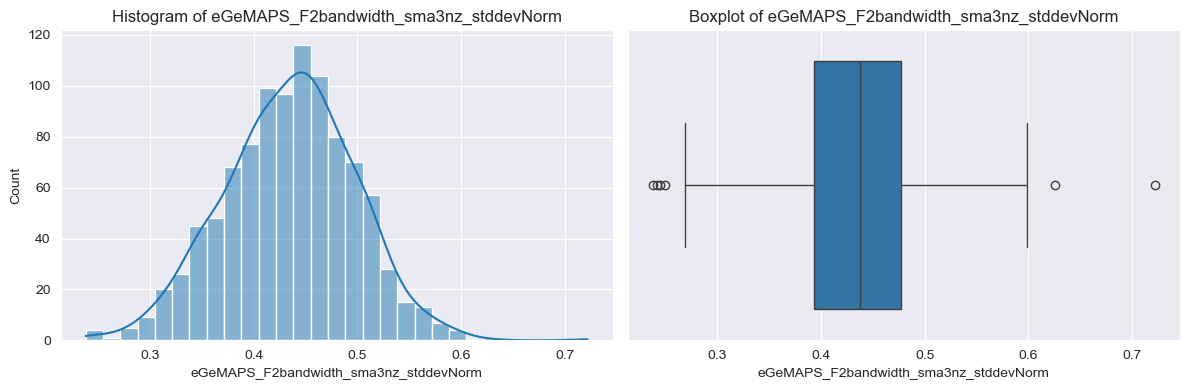

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F2bandwidth_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F2bandwidth_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F2bandwidth_sma3nz_stddevNorm
89          197                               0.237618
302         474                               0.244818
451         663                               0.722222
697         979                               0.625426
779        1079                               0.249304
916        1264                               0.242048



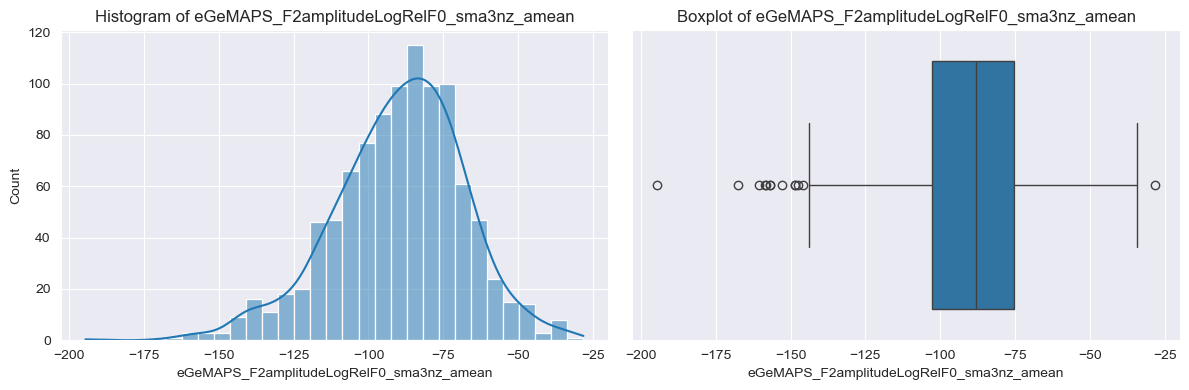

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean': 
     Subject_ID  eGeMAPS_F2amplitudeLogRelF0_sma3nz_amean
302         474                               -194.617767
505         732                               -152.893799
632         893                               -148.690125
640         903                               -148.636612
768        1062                                -28.163120
790        1095                               -156.798187
799        1105                               -145.952057
808        1118                               -158.614716
816        1131                               -147.568970
844        1170                               -156.836105
885        1222                               -160.559021
900        1241                               -167.457733
941   

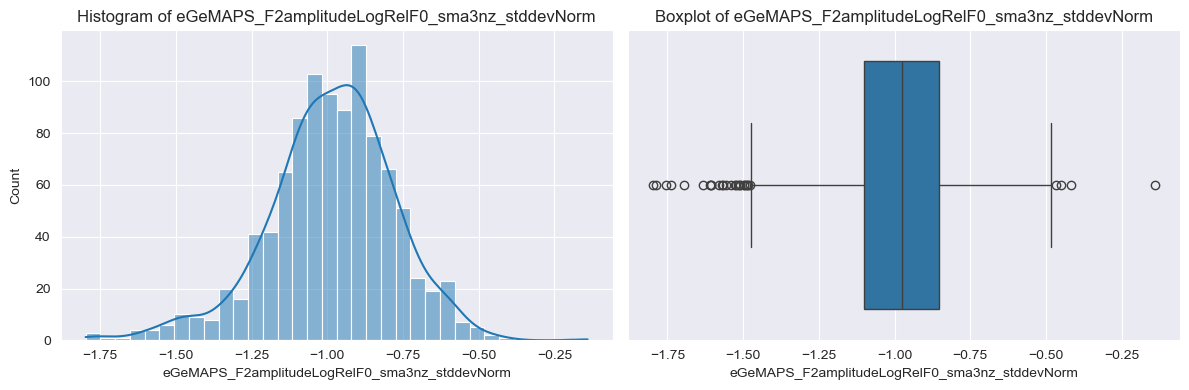

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F2amplitudeLogRelF0_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F2amplitudeLogRelF0_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F2amplitudeLogRelF0_sma3nz_stddevNorm
37          123                                      -1.694648
69          165                                      -1.489620
105         214                                      -1.509567
147         271                                      -1.486601
185         327                                      -1.495544
278         444                                      -1.522107
292         464                                      -1.738518
302         474                                      -0.140189
353         539                                      -1.787338
356         543                                      -1.798155
439         649                                      -1.5

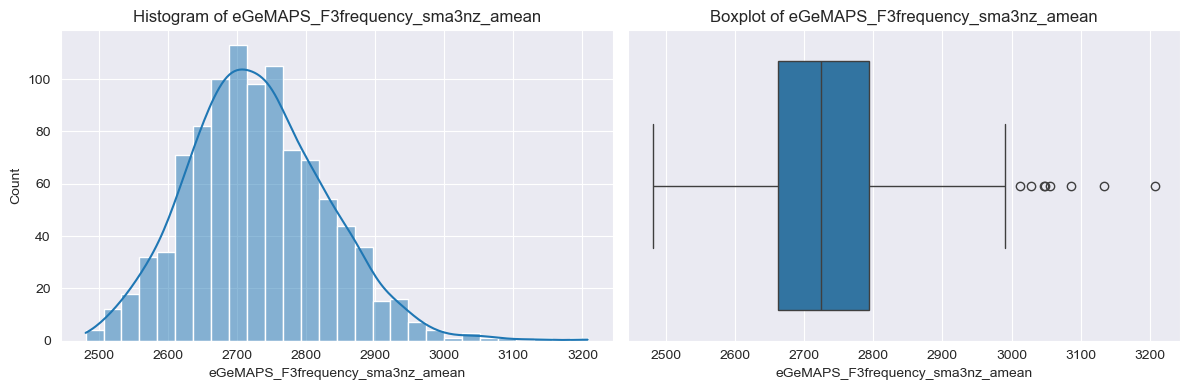

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F3frequency_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F3frequency_sma3nz_amean': 
     Subject_ID  eGeMAPS_F3frequency_sma3nz_amean
27          105                       3055.442871
29          109                       3134.156494
240         394                       3027.792236
244         399                       3012.087158
292         464                       3085.571045
697         979                       3207.595459
851        1180                       3047.883301
955        1317                       3047.355469



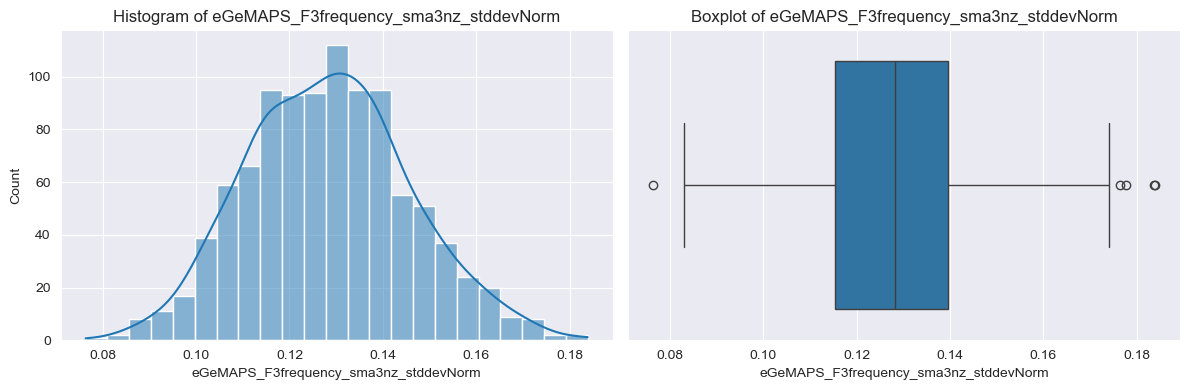

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F3frequency_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F3frequency_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F3frequency_sma3nz_stddevNorm
18           92                               0.177627
73          173                               0.076332
280         446                               0.183883
887        1225                               0.183664
936        1292                               0.176510



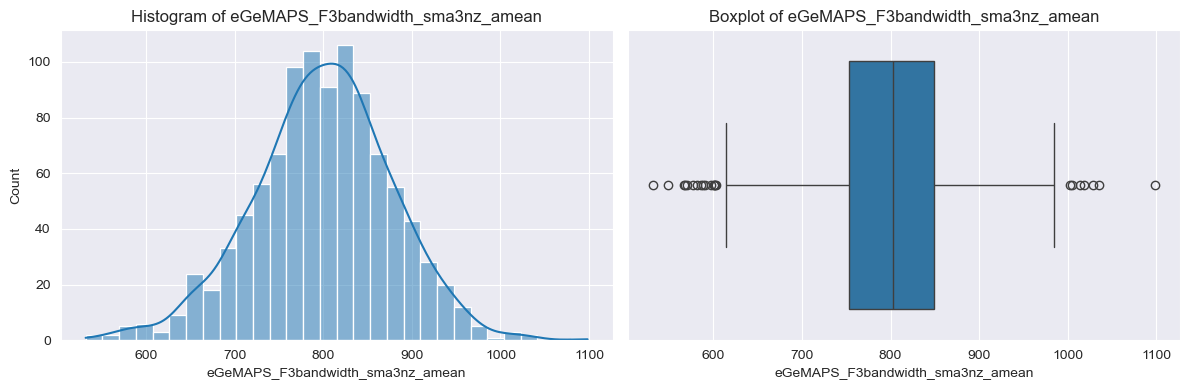

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F3bandwidth_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F3bandwidth_sma3nz_amean': 
     Subject_ID  eGeMAPS_F3bandwidth_sma3nz_amean
44          133                       1018.692932
73          173                        568.114868
89          197                       1028.334473
126         243                        581.178467
177         315                       1013.798401
276         441                        585.758362
302         474                       1098.437500
411         614                       1004.463074
607         857                        602.456482
611         863                        566.627625
634         895                       1034.784058
652         918                        600.874817
668         938                        597.913940
699         982                        590.564331
733        1021           

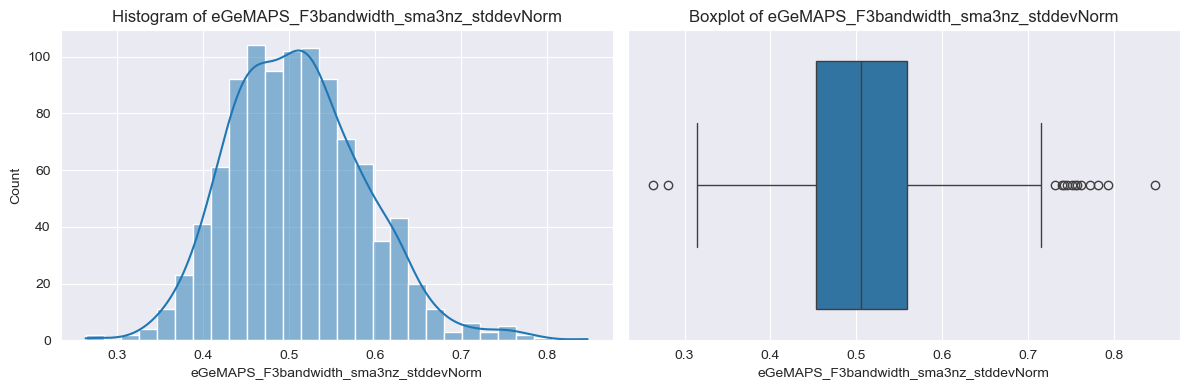

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F3bandwidth_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F3bandwidth_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F3bandwidth_sma3nz_stddevNorm
0            41                               0.754825
6            54                               0.741327
89          197                               0.280192
206         356                               0.750610
214         364                               0.781356
471         684                               0.739526
536         769                               0.730910
616         871                               0.771539
694         972                               0.761816
697         979                               0.745439
730        1018                               0.757043
757        1051                               0.847468
779        1079                               0.263

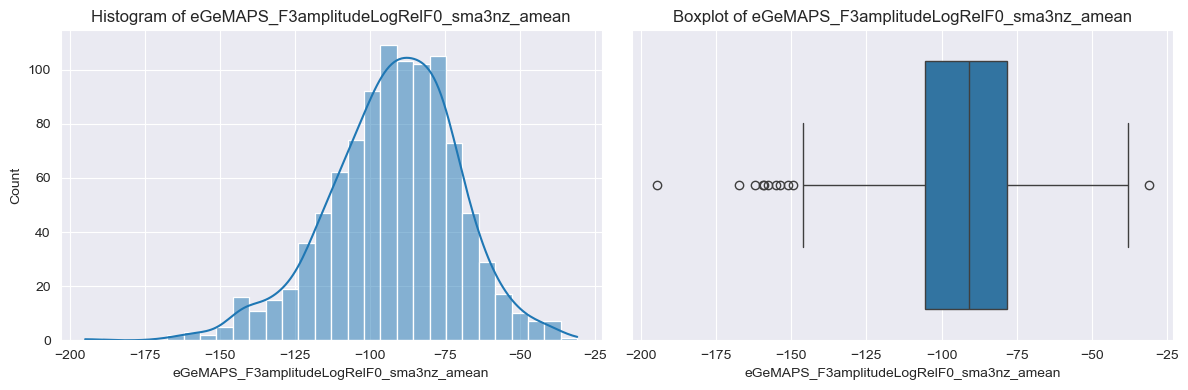

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F3amplitudeLogRelF0_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_F3amplitudeLogRelF0_sma3nz_amean': 
     Subject_ID  eGeMAPS_F3amplitudeLogRelF0_sma3nz_amean
302         474                               -194.857529
505         732                               -153.681442
632         893                               -151.141922
640         903                               -149.546204
768        1062                                -31.001276
790        1095                               -157.668243
808        1118                               -159.039948
844        1170                               -155.126801
885        1222                               -162.261887
900        1241                               -167.290512
941        1298                               -159.520828



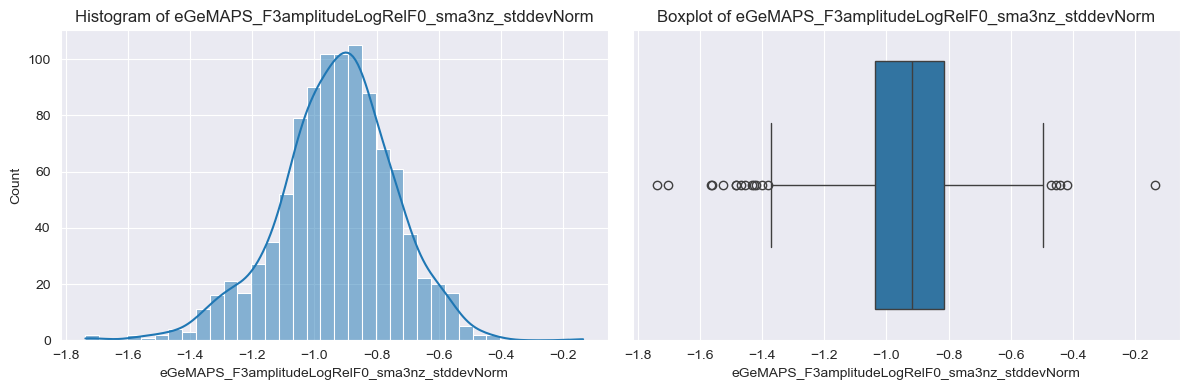

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_F3amplitudeLogRelF0_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_F3amplitudeLogRelF0_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_F3amplitudeLogRelF0_sma3nz_stddevNorm
37          123                                      -1.433068
69          165                                      -1.381720
292         464                                      -1.701854
302         474                                      -0.135131
353         539                                      -1.483909
356         543                                      -1.737530
579         824                                      -1.526691
639         902                                      -1.427412
696         975                                      -1.562633
761        1055                                      -1.454798
790        1095                                      -0.4

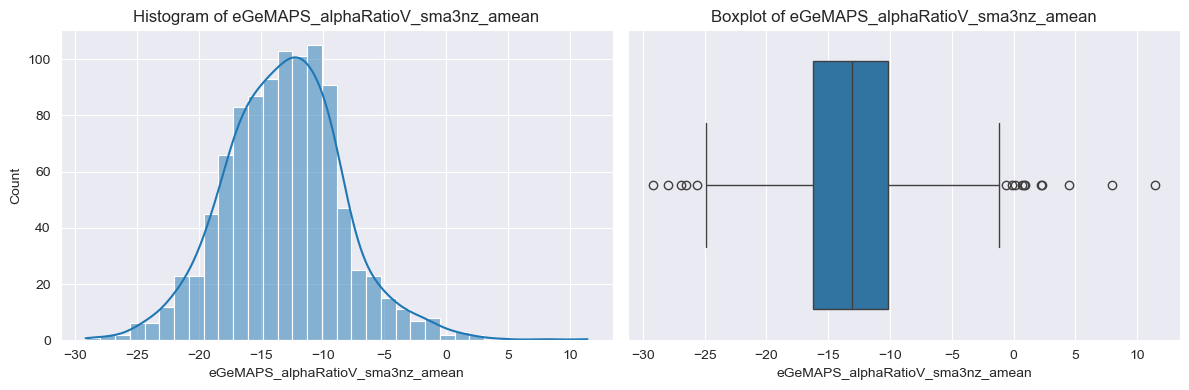

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_alphaRatioV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_alphaRatioV_sma3nz_amean': 
     Subject_ID  eGeMAPS_alphaRatioV_sma3nz_amean
29          109                          7.985136
65          158                        -27.956825
92          200                        -25.606190
226         377                        -26.888184
273         437                        -26.503244
292         464                          4.490100
356         543                          2.208091
629         890                        -29.173607
697         979                         11.434813
712        1000                         -0.601577
764        1058                          2.330831
779        1079                         -0.100878
851        1180                          0.111919
910        1252                          0.830232
957        1319           

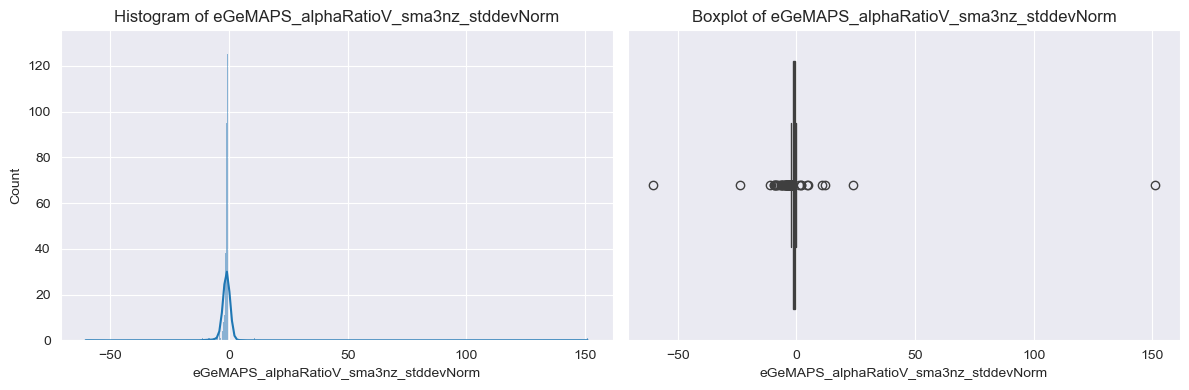

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_alphaRatioV_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_alphaRatioV_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_alphaRatioV_sma3nz_stddevNorm
5            50                              -2.194844
6            54                              -5.900144
12           85                              -2.940194
25          103                              -4.475767
27          105                              -8.539083
..          ...                                    ...
954        1316                              -3.751847
957        1319                              11.936944
958        1320                              -4.523553
967        1332                              -9.306649
989        1363                              10.740450

[81 rows x 2 columns]



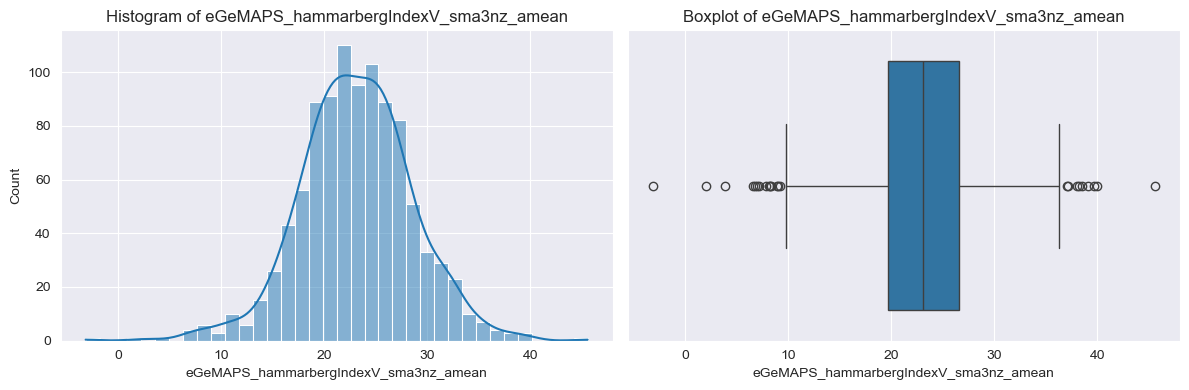

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_hammarbergIndexV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_hammarbergIndexV_sma3nz_amean': 
     Subject_ID  eGeMAPS_hammarbergIndexV_sma3nz_amean
27          105                               7.817323
29          109                               2.047306
65          158                              45.573540
168         300                              37.103252
173         306                              39.946098
198         344                              38.008900
292         464                               3.876404
356         543                               6.737461
411         614                              39.672890
451         663                               6.943694
512         741                               9.208384
567         805                              37.024792
577         821                              38.499

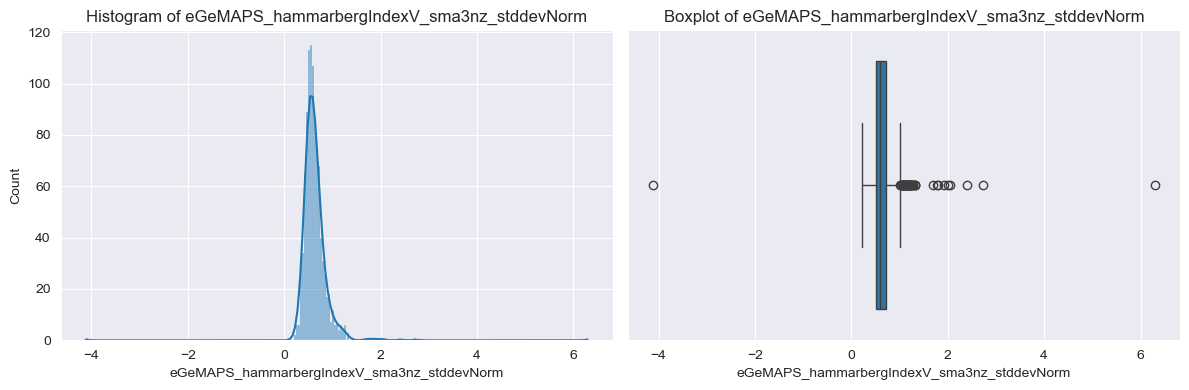

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_hammarbergIndexV_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_hammarbergIndexV_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_hammarbergIndexV_sma3nz_stddevNorm
5            50                                    1.015926
6            54                                    1.049715
27          105                                    2.006826
29          109                                    6.295266
79          183                                    1.142939
80          184                                    1.097095
90          198                                    1.066189
126         243                                    1.112284
184         326                                    1.163083
188         330                                    1.162052
225         376                                    1.063823
236         389                     

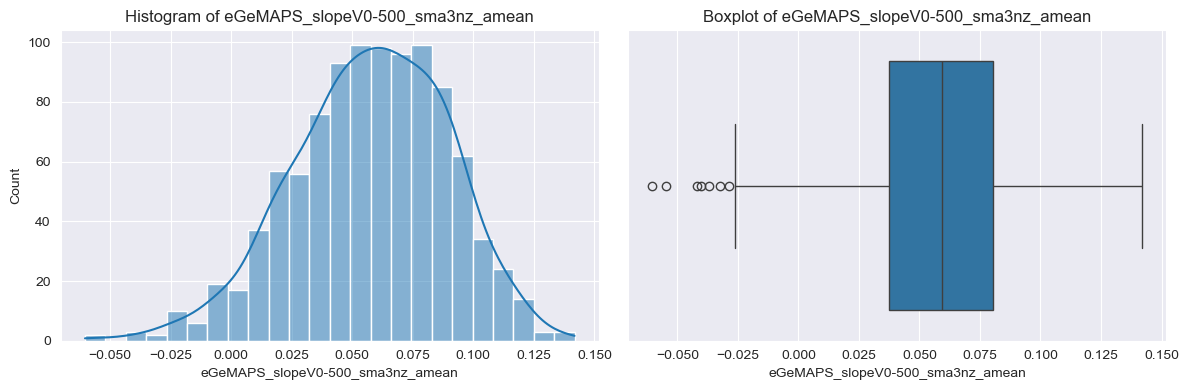

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_slopeV0-500_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_slopeV0-500_sma3nz_amean': 
     Subject_ID  eGeMAPS_slopeV0-500_sma3nz_amean
351         537                         -0.060369
420         625                         -0.040348
583         829                         -0.032471
638         901                         -0.037049
736        1024                         -0.054855
768        1062                         -0.041909
973        1344                         -0.028585



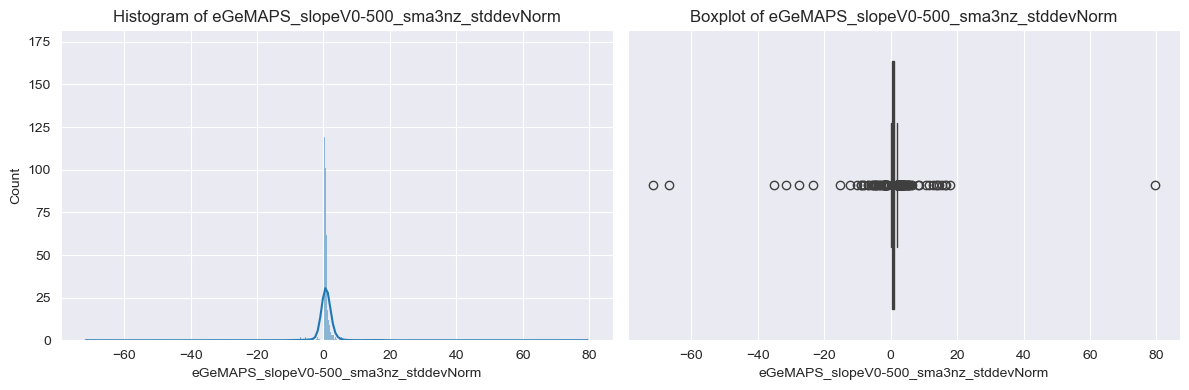

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_slopeV0-500_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_slopeV0-500_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_slopeV0-500_sma3nz_stddevNorm
3            46                              -2.243507
17           91                              -6.931245
30          110                              -6.970854
32          112                               2.609502
39          127                             -35.280861
..          ...                                    ...
971        1340                               2.402629
973        1344                              -1.362087
986        1359                              79.532730
987        1360                             -12.212470
991        1366                              -4.423362

[140 rows x 2 columns]



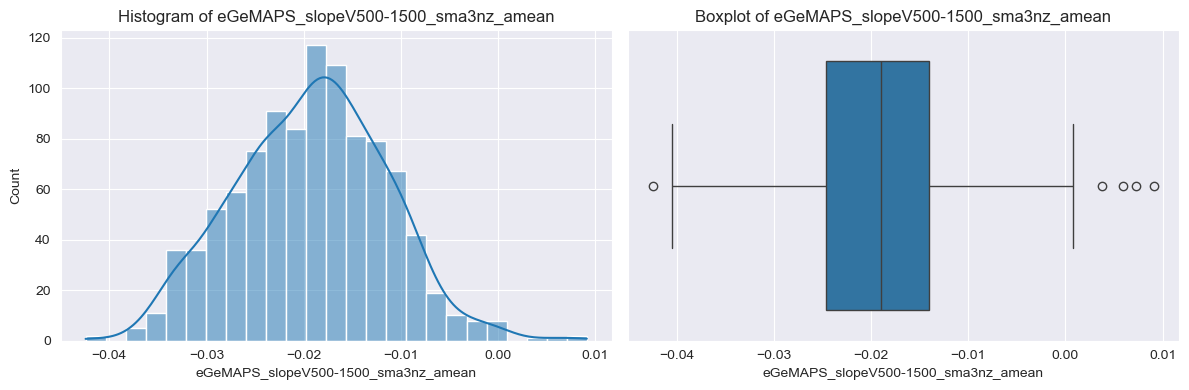

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_slopeV500-1500_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_slopeV500-1500_sma3nz_amean': 
     Subject_ID  eGeMAPS_slopeV500-1500_sma3nz_amean
29          109                             0.009125
619         874                             0.007306
629         890                            -0.042445
697         979                             0.003736
779        1079                             0.005941



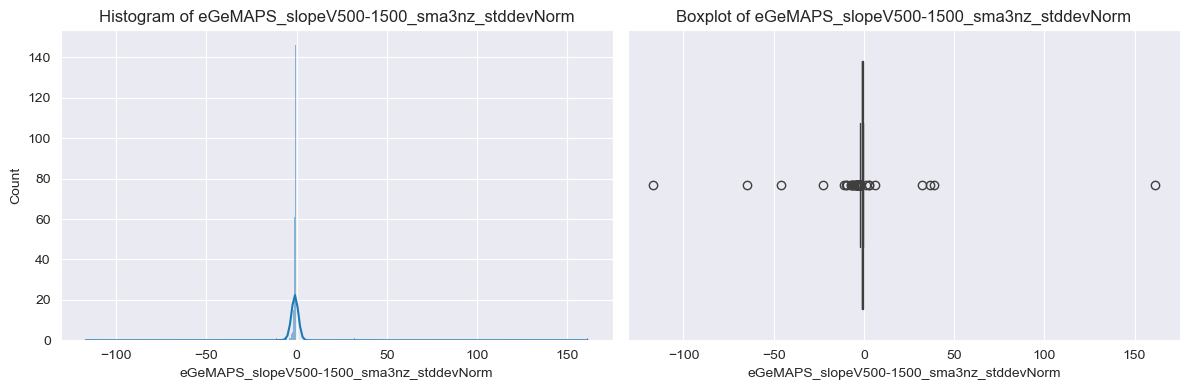

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_slopeV500-1500_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_slopeV500-1500_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_slopeV500-1500_sma3nz_stddevNorm
6            54                                 -2.080967
25          103                                 -6.478244
29          109                                  2.579914
44          133                                 -6.968302
47          136                                 -3.513288
..          ...                                       ...
933        1288                                 -2.679691
935        1291                                 -9.298706
948        1310                                 -3.002661
958        1320                                 -2.039480
994        1370                                 -2.018845

[72 rows x 2 columns]



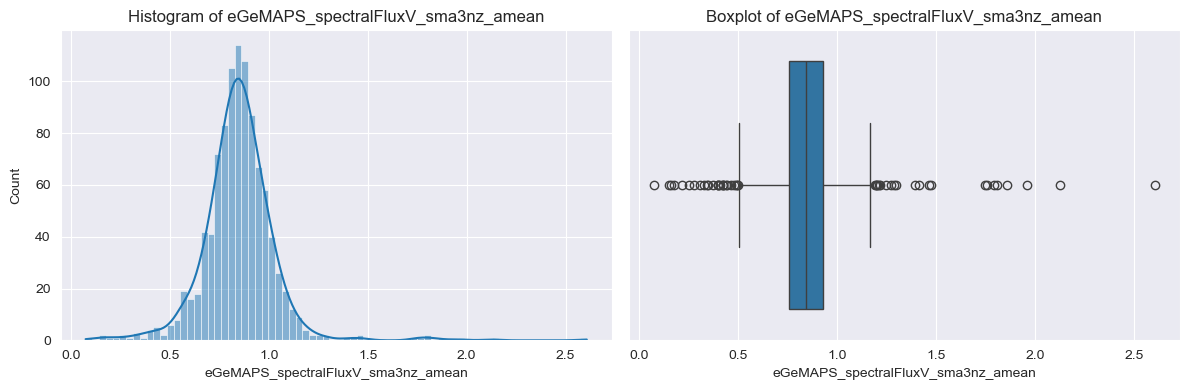

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_spectralFluxV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_spectralFluxV_sma3nz_amean': 
     Subject_ID  eGeMAPS_spectralFluxV_sma3nz_amean
16           90                            1.193946
33          115                            1.748833
73          173                            0.400140
74          174                            1.212738
92          200                            0.463212
103         211                            0.161530
113         224                            2.128481
140         263                            1.296982
141         264                            1.290915
177         315                            0.491528
216         366                            0.481363
219         369                            1.202240
259         420                            1.196582
269         432                            0

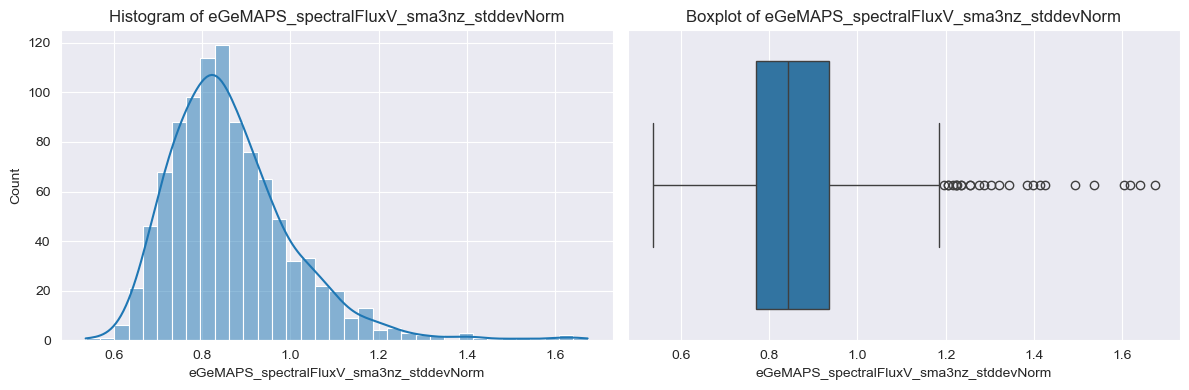

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_spectralFluxV_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_spectralFluxV_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_spectralFluxV_sma3nz_stddevNorm
6            54                                 1.205596
29          109                                 1.234438
39          127                                 1.205836
89          197                                 1.398167
90          198                                 1.673849
103         211                                 1.343694
236         389                                 1.234017
262         424                                 1.412980
278         444                                 1.223602
308         483                                 1.535231
309         484                                 1.640432
326         502                                 1.491785
495         719      

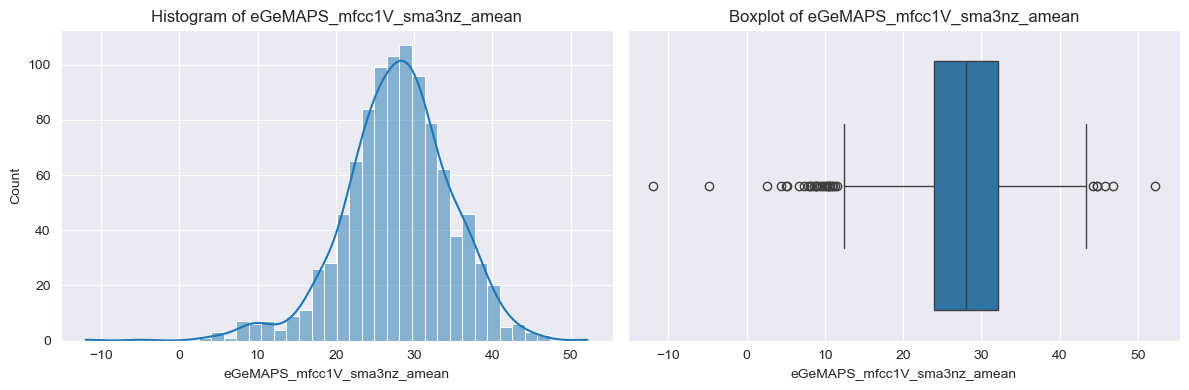

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc1V_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_mfcc1V_sma3nz_amean': 
     Subject_ID  eGeMAPS_mfcc1V_sma3nz_amean
6            54                     8.578579
12           85                     8.986898
27          105                     5.022492
28          107                    10.697722
29          109                    -4.860454
65          158                    44.779964
79          183                    10.982099
80          184                     8.843445
126         243                    10.226357
159         289                    45.855427
198         344                    52.180592
219         369                    10.471107
276         441                     7.277912
292         464                     2.561586
356         543                     6.665861
554         788                     9.396473
634         895      

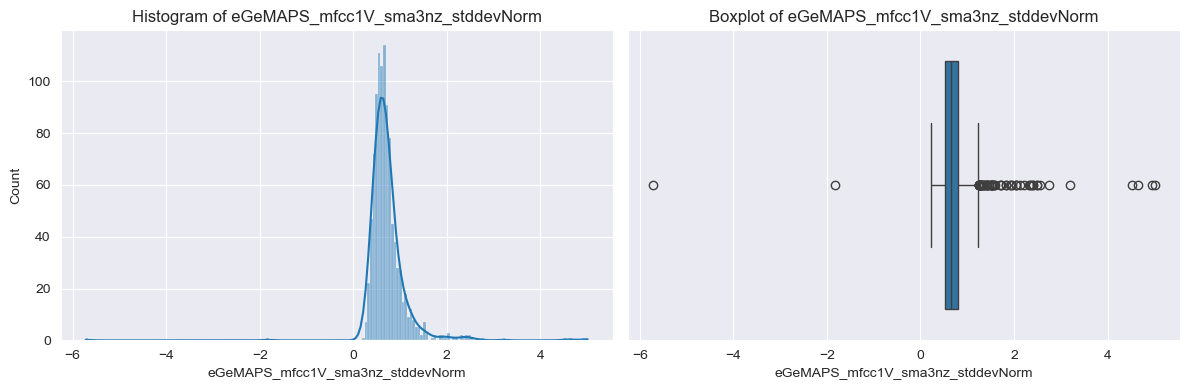

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc1V_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc1V_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc1V_sma3nz_stddevNorm
5            50                          1.400990
6            54                          2.341389
12           85                          2.404912
27          105                          4.657846
28          107                          2.485497
..          ...                               ...
938        1294                          2.324921
949        1311                          1.698475
954        1316                          2.036464
958        1320                          1.526405
967        1332                          2.218398

[66 rows x 2 columns]



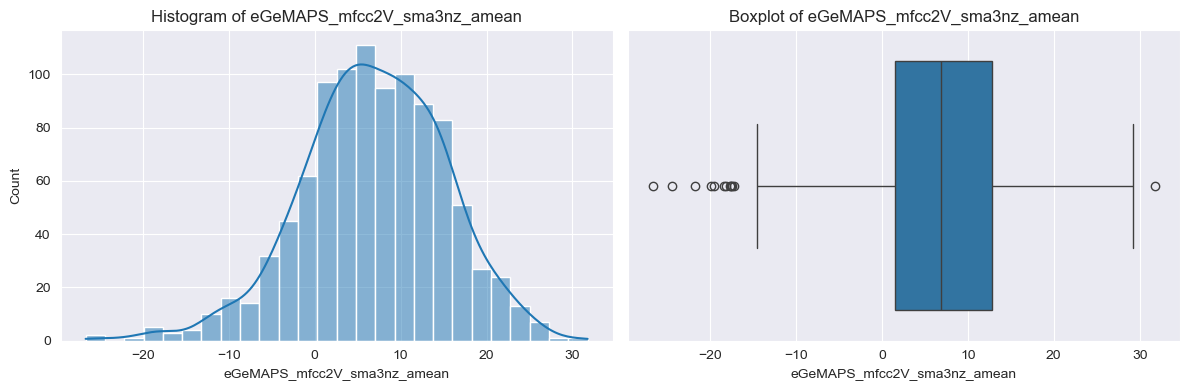

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc2V_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_mfcc2V_sma3nz_amean': 
     Subject_ID  eGeMAPS_mfcc2V_sma3nz_amean
25          103                   -17.174028
292         464                   -17.709272
329         505                   -17.403931
365         557                   -19.840582
464         677                   -21.808342
618         873                   -18.114897
696         975                   -19.533897
764        1058                   -24.474319
795        1100                    31.767868
957        1319                   -26.661877
972        1341                   -17.615595
989        1363                   -18.381964



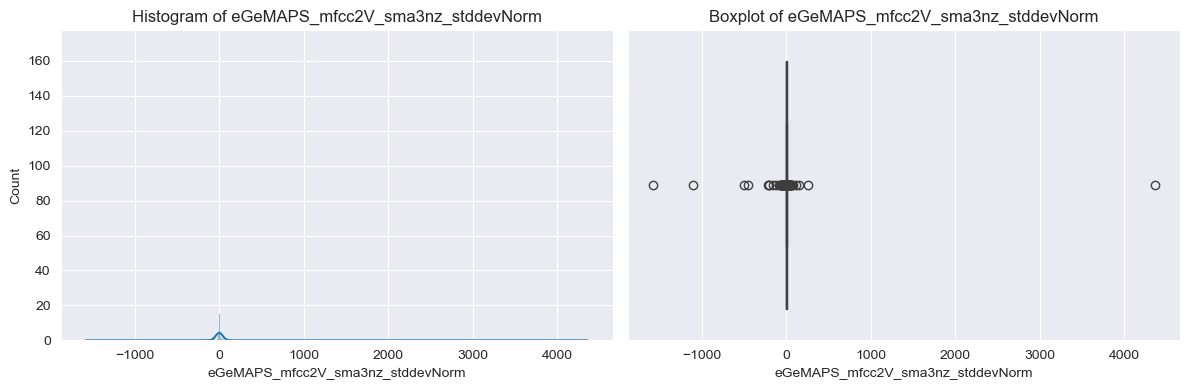

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc2V_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc2V_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc2V_sma3nz_stddevNorm
2            44                         -2.813103
5            50                         38.357983
6            54                       -504.778534
12           85                          7.051239
29          109                         -2.668718
..          ...                               ...
967        1332                        -20.194412
975        1347                         25.255783
978        1350                         -4.240565
979        1351                        -22.576586
988        1362                        -29.539997

[256 rows x 2 columns]



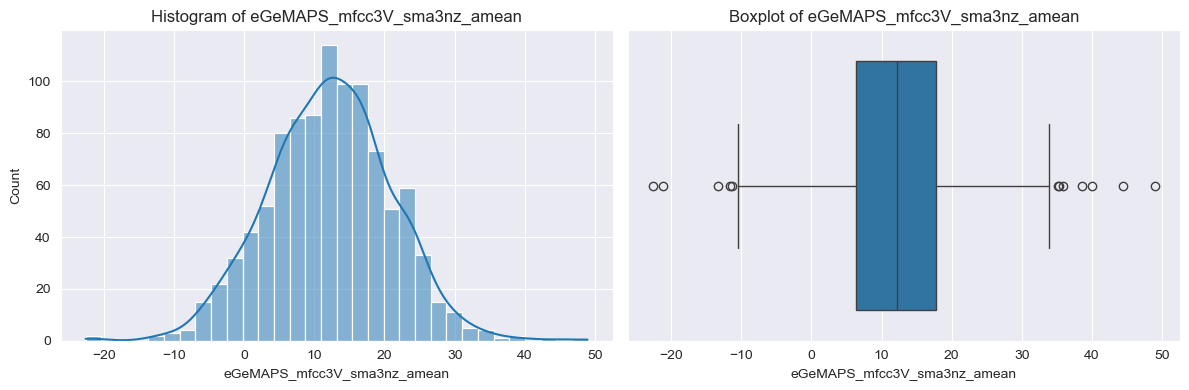

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc3V_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_mfcc3V_sma3nz_amean': 
     Subject_ID  eGeMAPS_mfcc3V_sma3nz_amean
112         222                    35.140114
135         257                    38.591331
211         361                   -21.228416
420         625                    35.917324
439         649                   -22.602415
451         663                    48.960217
493         714                   -11.675920
619         874                    44.447800
642         906                    39.974201
920        1271                   -11.351374
959        1322                    35.246269
989        1363                   -13.303821



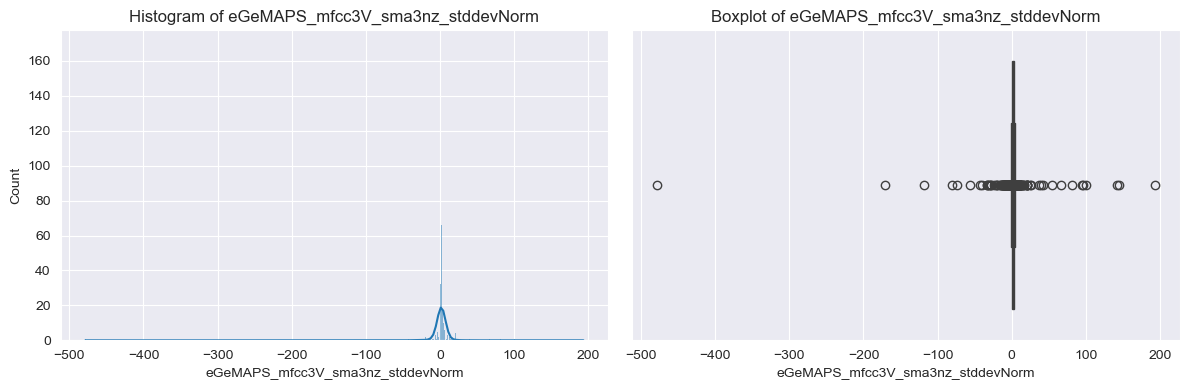

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc3V_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc3V_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc3V_sma3nz_stddevNorm
6            54                         20.598713
9            61                          6.342893
16           90                          6.353277
19           93                          7.269330
26          104                        -11.857005
..          ...                               ...
976        1348                         10.946853
978        1350                         16.230724
988        1362                          5.464329
989        1363                         -1.686074
990        1365                          5.155956

[182 rows x 2 columns]



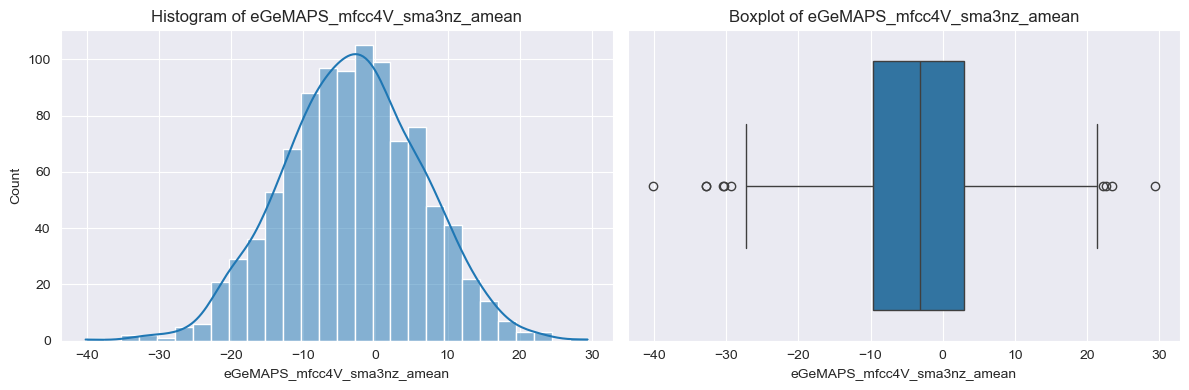

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc4V_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_mfcc4V_sma3nz_amean': 
     Subject_ID  eGeMAPS_mfcc4V_sma3nz_amean
239         393                    29.423967
345         530                    23.535934
451         663                   -32.823578
520         750                    22.243568
590         838                   -32.853428
652         918                   -30.266466
814        1128                    22.596365
818        1133                   -40.181801
918        1267                   -29.333231
924        1277                   -30.403540



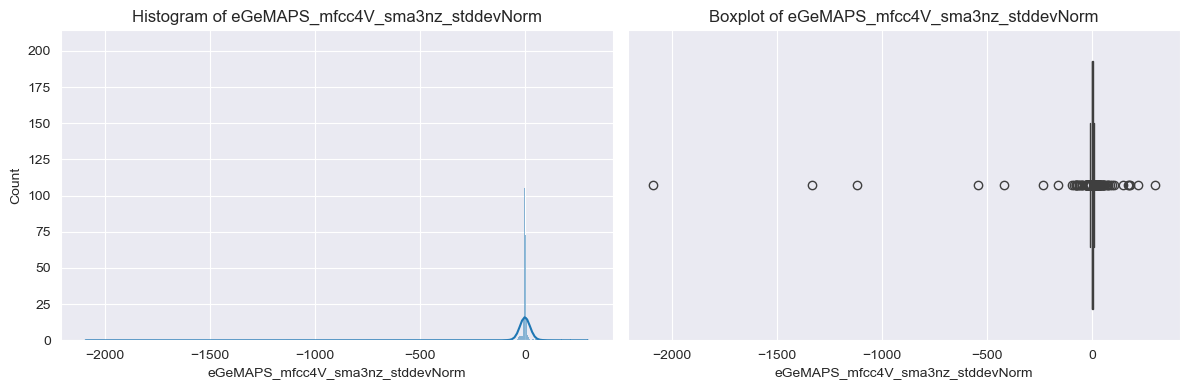

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_mfcc4V_sma3nz_stddevNorm_distribution.png
outliers in 'eGeMAPS_mfcc4V_sma3nz_stddevNorm': 
     Subject_ID  eGeMAPS_mfcc4V_sma3nz_stddevNorm
0            41                         18.627068
1            43                        -47.710709
4            49                         82.697609
5            50                        -28.034208
7            56                        169.512848
..          ...                               ...
933        1288                        -11.856095
944        1304                        -21.076456
947        1309                        146.875137
974        1346                        -20.934547
993        1369                        -47.964767

[133 rows x 2 columns]



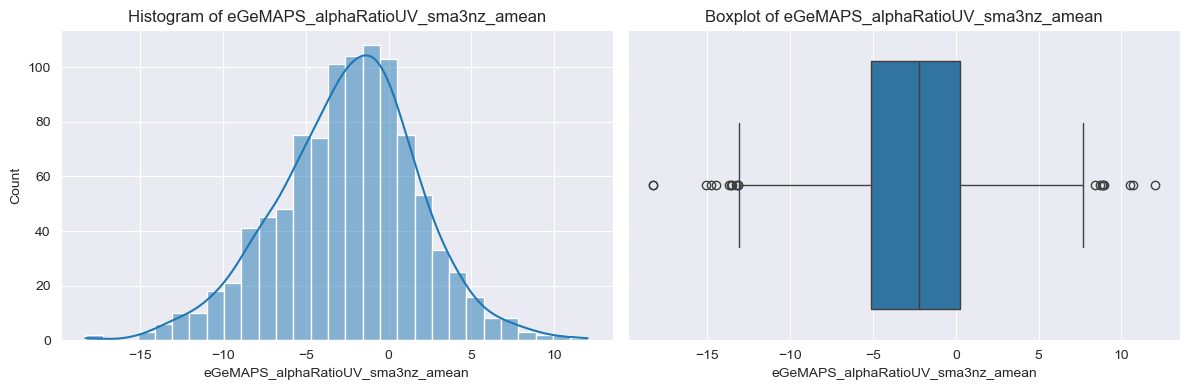

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_alphaRatioUV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_alphaRatioUV_sma3nz_amean': 
     Subject_ID  eGeMAPS_alphaRatioUV_sma3nz_amean
229         381                         -13.562582
273         437                         -13.305237
326         502                         -14.794860
345         530                         -18.298403
351         537                         -15.110242
356         543                          10.716155
464         677                           8.816552
479         696                         -18.265774
529         762                          12.028224
629         890                         -14.458965
632         893                         -13.140257
697         979                           8.948387
712        1000                           8.724710
716        1004                         -13.488336
728      

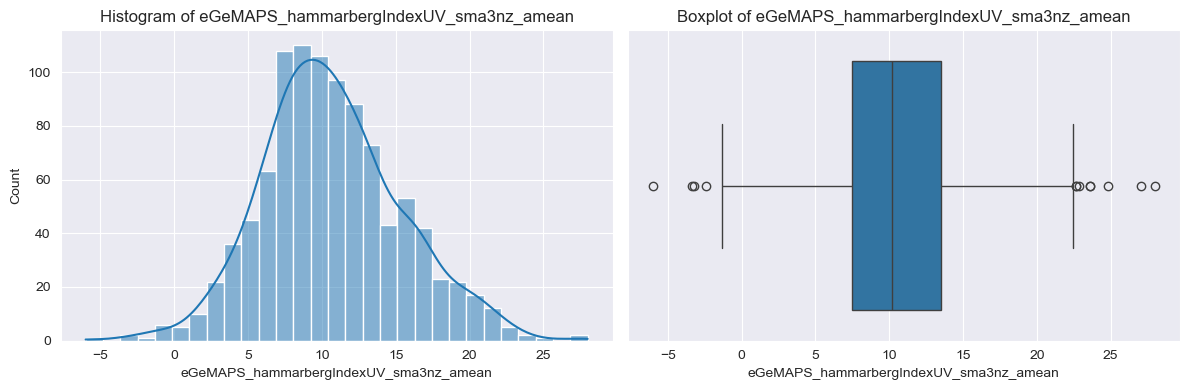

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_hammarbergIndexUV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_hammarbergIndexUV_sma3nz_amean': 
     Subject_ID  eGeMAPS_hammarbergIndexUV_sma3nz_amean
17           91                               22.636766
159         289                               22.838472
326         502                               27.027767
345         530                               24.784286
351         537                               23.582455
356         543                               -3.358369
479         696                               27.992071
697         979                               -3.199991
728        1016                               23.603914
813        1125                               22.669004
862        1195                               -6.003725
938        1294                               -2.383674



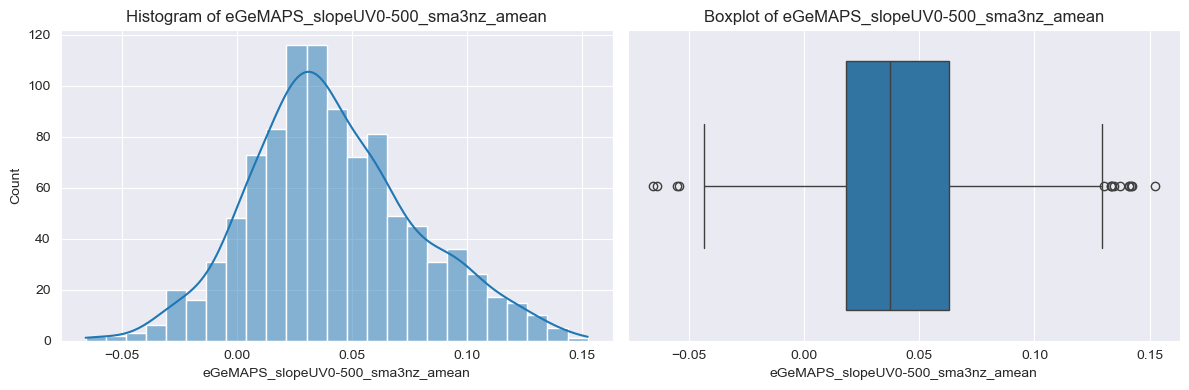

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_slopeUV0-500_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_slopeUV0-500_sma3nz_amean': 
     Subject_ID  eGeMAPS_slopeUV0-500_sma3nz_amean
276         441                          -0.055257
351         537                          -0.064174
395         594                           0.137356
421         626                           0.133156
493         714                           0.130419
618         873                           0.141760
734        1022                           0.141212
736        1024                          -0.054250
810        1120                           0.134759
830        1148                           0.133735
892        1232                           0.142506
936        1292                           0.133122
953        1315                           0.141055
964        1328                          -0.065782
977      

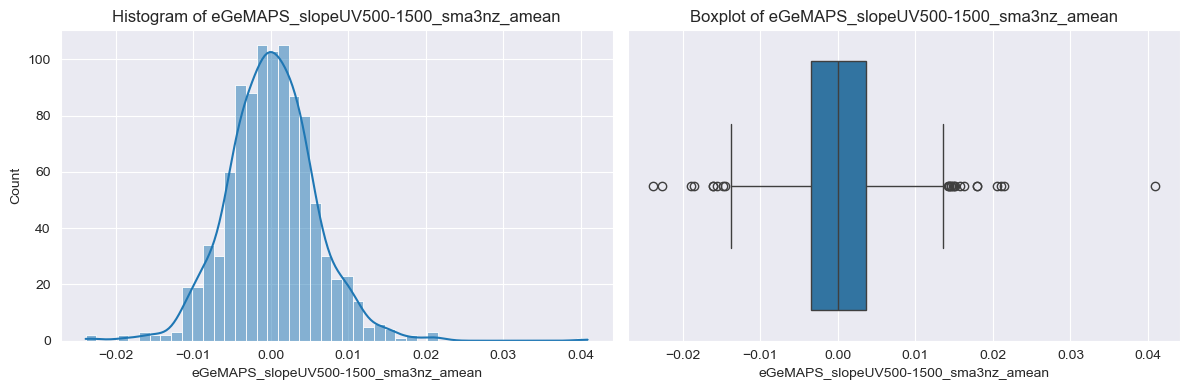

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_slopeUV500-1500_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_slopeUV500-1500_sma3nz_amean': 
     Subject_ID  eGeMAPS_slopeUV500-1500_sma3nz_amean
18           92                              0.014798
123         239                              0.014267
191         336                              0.015699
229         381                             -0.022658
455         667                              0.014635
457         669                              0.014546
464         677                              0.017882
470         683                              0.014155
488         707                             -0.016153
529         762                              0.040888
618         873                              0.015031
619         874                              0.021448
629         890                             -0.014876
654         

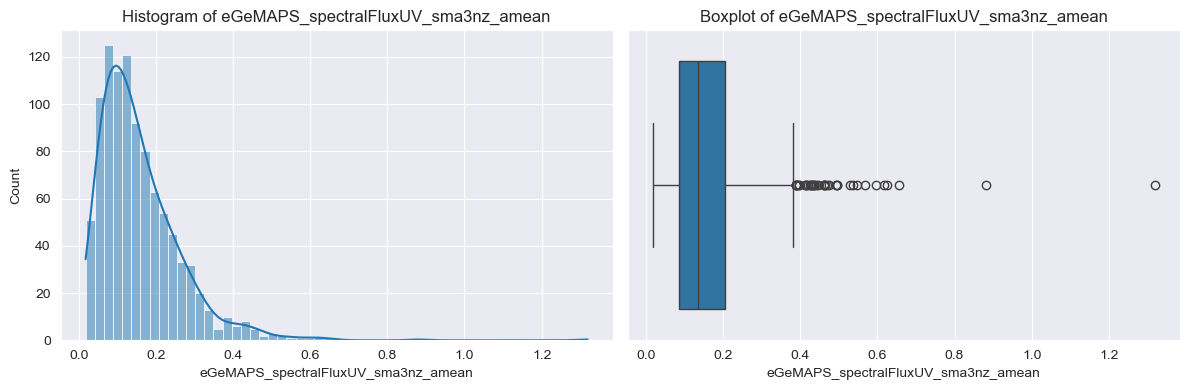

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_spectralFluxUV_sma3nz_amean_distribution.png
outliers in 'eGeMAPS_spectralFluxUV_sma3nz_amean': 
     Subject_ID  eGeMAPS_spectralFluxUV_sma3nz_amean
32          112                             0.390424
39          127                             0.568471
184         326                             0.432846
195         341                             0.439835
219         369                             0.496061
250         406                             0.398169
276         441                             0.389821
318         494                             0.429033
320         496                             0.428907
369         562                             0.464368
373         569                             0.397562
397         597                             0.389766
409         612                             0.530370
428         636             

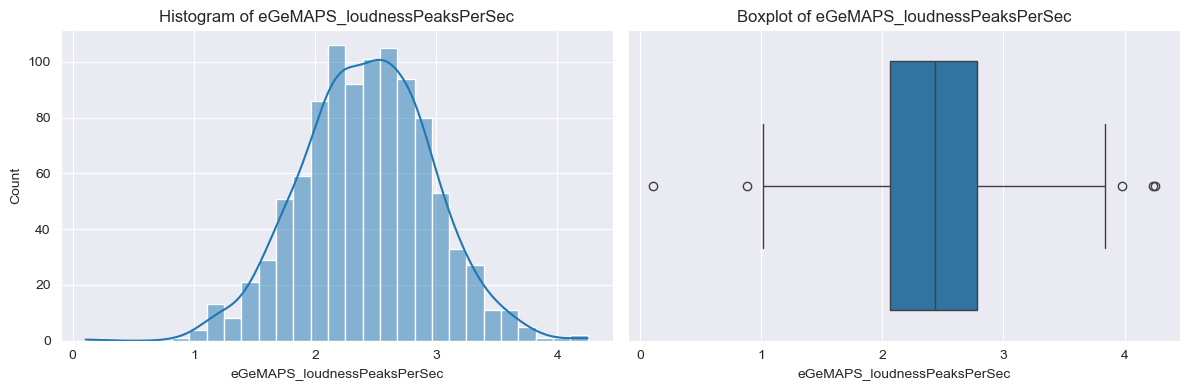

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_loudnessPeaksPerSec_distribution.png
outliers in 'eGeMAPS_loudnessPeaksPerSec': 
     Subject_ID  eGeMAPS_loudnessPeaksPerSec
105         214                     3.979543
264         427                     4.249887
536         769                     4.238264
640         903                     0.886511
779        1079                     0.106938



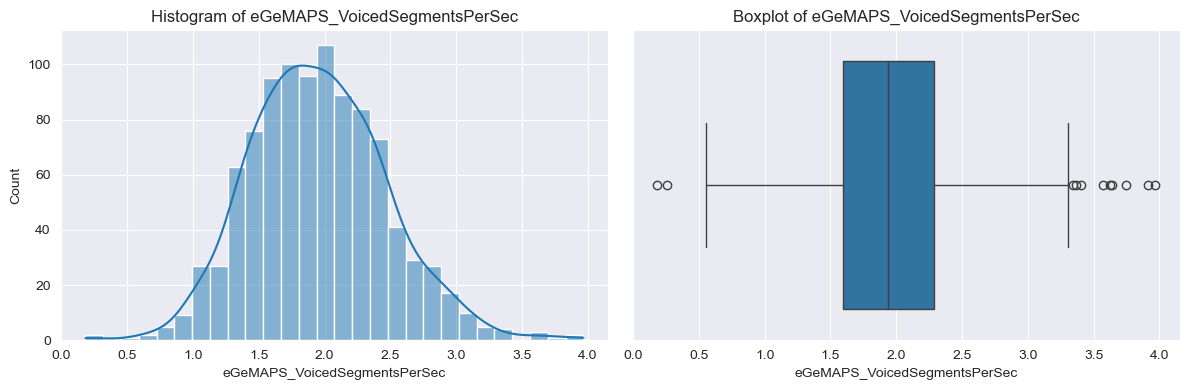

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_VoicedSegmentsPerSec_distribution.png
outliers in 'eGeMAPS_VoicedSegmentsPerSec': 
     Subject_ID  eGeMAPS_VoicedSegmentsPerSec
29          109                      3.404255
73          173                      3.640570
89          197                      3.967461
190         335                      3.915344
302         474                      0.256410
351         537                      3.572936
697         979                      3.626414
768        1062                      0.182611
841        1167                      3.746513
862        1195                      3.366849
916        1264                      3.339818



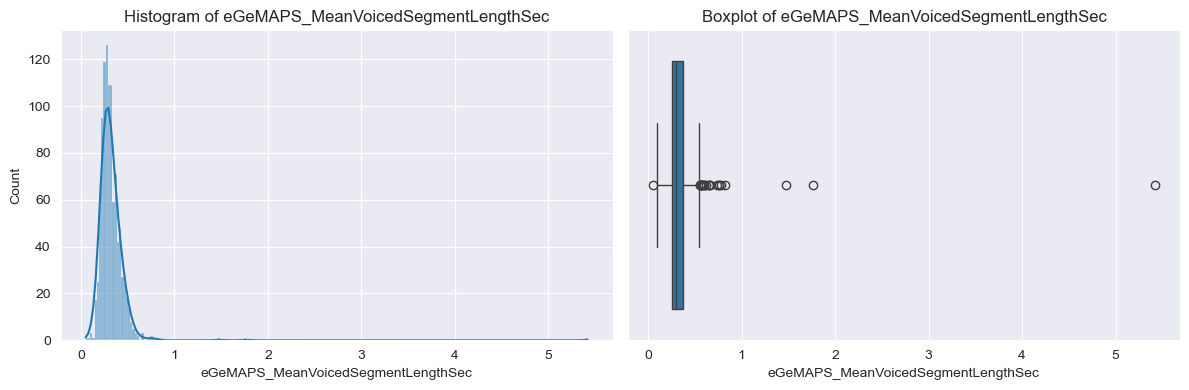

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_MeanVoicedSegmentLengthSec_distribution.png
outliers in 'eGeMAPS_MeanVoicedSegmentLengthSec': 
     Subject_ID  eGeMAPS_MeanVoicedSegmentLengthSec
14           88                            0.563250
85          190                            0.551628
103         211                            1.469524
162         292                            0.555405
173         306                            0.823036
196         342                            0.655373
208         358                            0.596176
217         367                            0.760351
302         474                            0.050000
330         506                            0.774684
353         539                            0.647113
439         649                            0.656410
459         671                            0.754370
567         805                            0

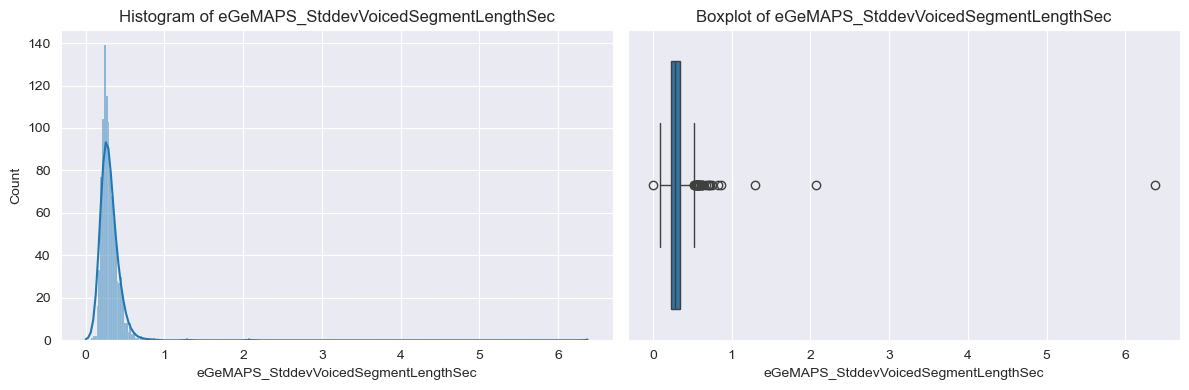

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_StddevVoicedSegmentLengthSec_distribution.png
outliers in 'eGeMAPS_StddevVoicedSegmentLengthSec': 
     Subject_ID  eGeMAPS_StddevVoicedSegmentLengthSec
14           88                              0.580112
103         211                              1.293071
164         294                              0.590094
173         306                              0.826280
186         328                              0.620815
196         342                              0.549283
217         367                              0.570494
229         381                              0.622344
278         444                              0.637132
289         461                              0.556887
302         474                              0.000000
308         483                              0.524078
330         506                              0.699747
353         

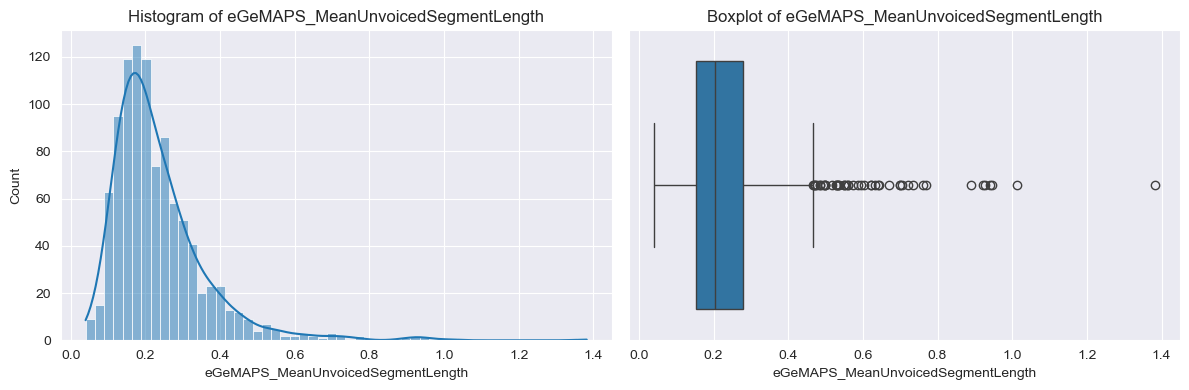

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_MeanUnvoicedSegmentLength_distribution.png
outliers in 'eGeMAPS_MeanUnvoicedSegmentLength': 
     Subject_ID  eGeMAPS_MeanUnvoicedSegmentLength
16           90                           0.472340
18           92                           0.517778
112         222                           0.531228
121         234                           0.594149
145         269                           0.484483
155         282                           0.526970
164         294                           0.537115
165         295                           0.484375
173         306                           0.533019
211         361                           0.734815
215         365                           0.549740
217         367                           0.497627
302         474                           0.940000
383         582                           0.550725
384      

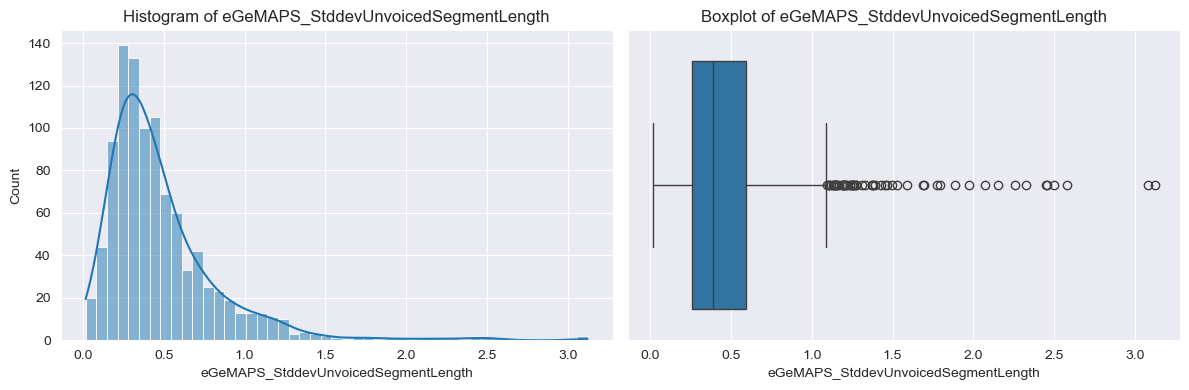

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_StddevUnvoicedSegmentLength_distribution.png
outliers in 'eGeMAPS_StddevUnvoicedSegmentLength': 
     Subject_ID  eGeMAPS_StddevUnvoicedSegmentLength
9            61                             1.133315
18           92                             1.498460
20           97                             1.373946
38          124                             1.150452
59          150                             1.109634
93          201                             1.217231
95          203                             1.248361
112         222                             1.331277
164         294                             1.377942
211         361                             1.590191
217         367                             1.139172
220         371                             1.152603
275         439                             1.205672
298         470             

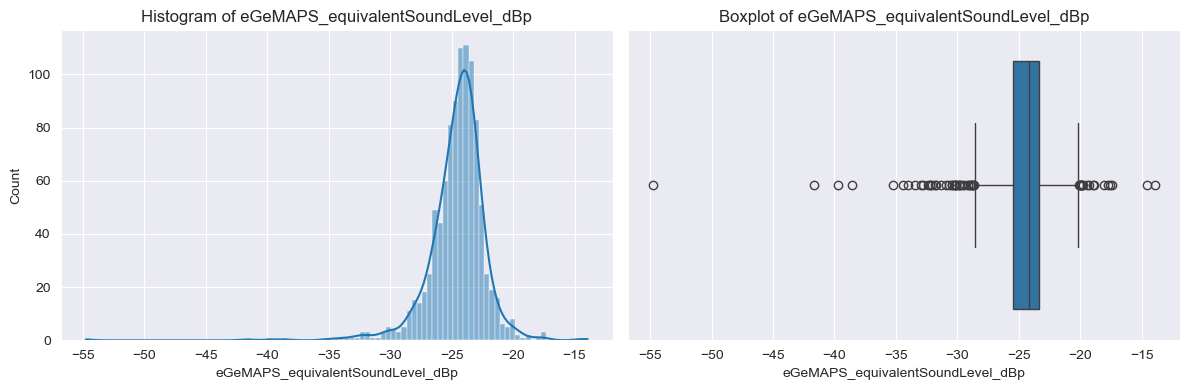

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/eGeMAPS_equivalentSoundLevel_dBp_distribution.png
outliers in 'eGeMAPS_equivalentSoundLevel_dBp': 
     Subject_ID  eGeMAPS_equivalentSoundLevel_dBp
33          115                        -19.987673
73          173                        -30.143267
103         211                        -35.262596
113         224                        -14.531240
141         264                        -18.919413
216         366                        -30.281607
219         369                        -19.926092
239         393                        -18.059477
259         420                        -20.070709
269         432                        -28.746122
274         438                        -39.696739
302         474                        -54.778858
309         484                        -34.439003
409         612                        -17.395187
421         626           

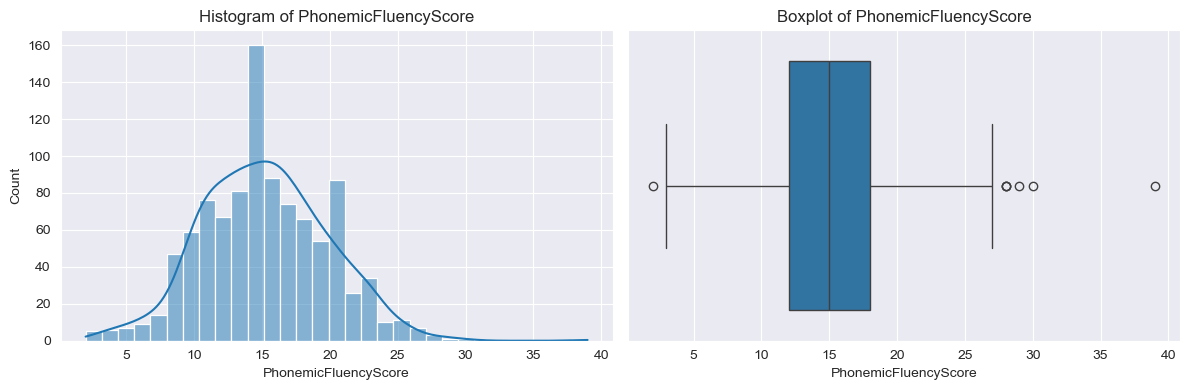

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/PhonemicFluencyScore_distribution.png
outliers in 'PhonemicFluencyScore': 
     Subject_ID  PhonemicFluencyScore
30          110                  30.0
295         467                  29.0
369         562                  28.0
571         811                  39.0
577         821                   2.0
735        1023                  28.0
950        1312                  28.0



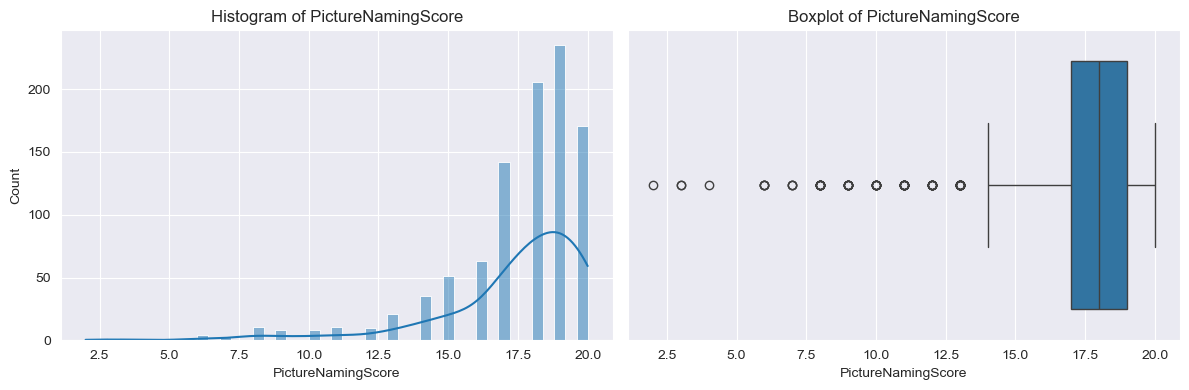

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/PictureNamingScore_distribution.png
outliers in 'PictureNamingScore': 
     Subject_ID  PictureNamingScore
52          141                11.0
53          142                10.0
55          145                11.0
63          154                13.0
65          158                 8.0
..          ...                 ...
954        1316                12.0
956        1318                 6.0
976        1348                 3.0
977        1349                13.0
993        1369                12.0

[80 rows x 2 columns]



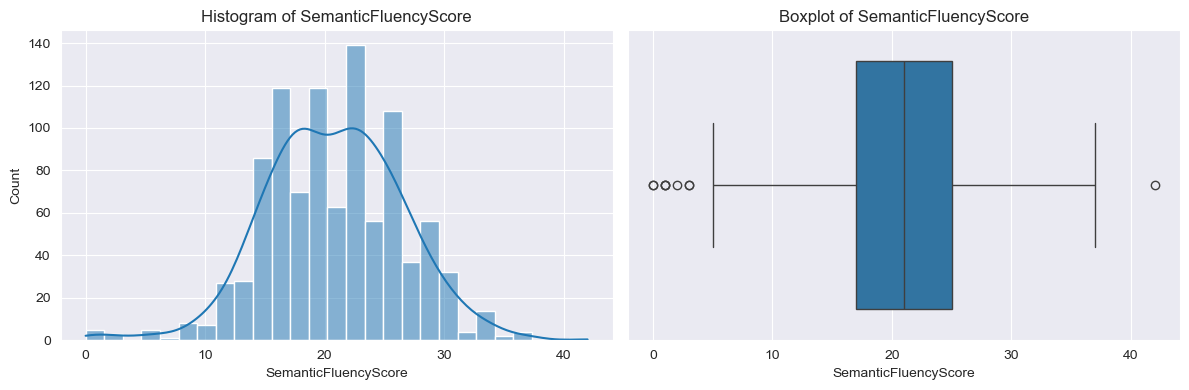

saved to /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/feature_score_distributions/journaling/SemanticFluencyScore_distribution.png
outliers in 'SemanticFluencyScore': 
     Subject_ID  SemanticFluencyScore
41          129                   1.0
236         389                   0.0
369         562                  42.0
561         797                   1.0
676         950                   3.0
767        1061                   2.0
792        1097                   0.0
862        1195                   3.0
914        1257                   1.0



In [8]:
features_and_targets = [col for col in df.columns if col not in ["Subject_ID"]]
plot_distributions(df, features_and_targets)

In [9]:
def identify_outliers_iqr(df, feature_cols, id_column ="Subject_ID", iqr_multiplier = 1.5, save_path=None):
    subject_outlier_map = {}
    all_outlier_ids = set()
    total_subjects = len(df)

    iqr_outliers = []

    for col in feature_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_ids = outliers[id_column].tolist()
        subject_outlier_map[col] = outlier_ids
        all_outlier_ids.update(outlier_ids)

        n_outliers = len(outlier_ids)
        percent_outliers = (n_outliers / total_subjects) * 100
        iqr_outliers.append({
            "feature": col,
            "n_outliers": n_outliers,
            "percent_outliers": round(percent_outliers, 2)
        })

        print(f"{col}: {n_outliers} subjects ({percent_outliers:.2f}%)")

    print(f"\ntotal unique subjects flagged as outliers in at least one feature: {len(all_outlier_ids)}")

    outlier_df = pd.DataFrame(iqr_outliers).sort_values(by="percent_outliers", ascending=False)
    if save_path:
        outlier_df.to_csv(save_path, index=False)
        print(f"\nsaved iqr-outlier summary to: {save_path}")

    return list(all_outlier_ids), subject_outlier_map, outlier_df

In [10]:
id_column = "Subject_ID"
target_cols = ["SemanticFluencyScore", "PhonemicFluencyScore", "PictureNamingScore"]
feature_cols = [col for col in df.columns if col not in [id_column] + target_cols]

outlier_save_path = os.path.join(GIT_DIRECTORY, f"results/data_preparation/outliers/{task_name}_iqr_outliers.csv")

outlier_ids, per_feature_outliers, outlier_df = identify_outliers_iqr(
    df,
    feature_cols,
    id_column=id_column,
    iqr_multiplier=1.5,
    save_path=outlier_save_path
)


n_words: 67 subjects (6.73%)
ttr: 22 subjects (2.21%)
mattr_10: 16 subjects (1.61%)
mattr_20: 14 subjects (1.41%)
mattr_30: 11 subjects (1.11%)
mattr_40: 12 subjects (1.21%)
mattr_50: 16 subjects (1.61%)
filler_word_ratio: 10 subjects (1.01%)
average_word_length: 24 subjects (2.41%)
brunets_index: 37 subjects (3.72%)
honores_statistic: 28 subjects (2.81%)
guirauds_statistic: 21 subjects (2.11%)
light_verb_ratio: 11 subjects (1.11%)
empty_word_ratio: 156 subjects (15.68%)
nid_ratio: 32 subjects (3.22%)
adjacent_repetitions: 57 subjects (5.73%)
aoa_content: 25 subjects (2.51%)
aoa_nouns: 24 subjects (2.41%)
aoa_verbs: 26 subjects (2.61%)
fam_content: 22 subjects (2.21%)
fam_nouns: 21 subjects (2.11%)
fam_verbs: 12 subjects (1.21%)
img_content: 13 subjects (1.31%)
img_nouns: 7 subjects (0.70%)
img_verbs: 12 subjects (1.21%)
freq_content: 11 subjects (1.11%)
freq_nouns: 20 subjects (2.01%)
freq_verbs: 8 subjects (0.80%)
concr_content: 11 subjects (1.11%)
concr_nouns: 14 subjects (1.41%)
co